## Processing with aboveground biomass data based on my fieldworks and other authors

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
input_data = './FULL_DB_BIOMASS_OTHER_ALL_AUTHORS.csv'
df = pd.read_csv(input_data)
df.head()

,Groups,Species,Species_ID,Origin,Origin_ID,SI,A_years,H_m,DBH_cm,N_trees,...,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,1,Pine,0,n,0.0,4,50,9.7,14.6,486.0,...,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,1,Pine,0,n,0.0,2,65,20.6,20.6,785.0,...,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,1,Pine,0,n,0.0,2,50,13.6,15.4,1745.0,...,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,1,Pine,0,n,0.0,1,60,23.3,22.2,665.0,...,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,1,Pine,0,n,0.0,3,65,15.6,16.4,955.0,...,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:

'Groups','Species_ID','Origin_ID','SI','A_years','H_m','DBH_cm','RS(P)',          'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha'
'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species_ID','Origin_ID','H_m','DBH_cm', 'BA_sq_m_ha','GS_cub_m','ALL_STEM_t_ha','Stem_wood_t_ha','Stem_bark_t_ha',
'Crown_t_ha','Foliage_t_ha', 'LN_GS_cub_m', 'LN_ALL_STEM_t_ha', 'LN_Stem_wood_t_ha', 'LN_Stem_bark_t_ha', 'LN_Crown_t_ha', 'LN_Foliage_t_ha'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
0,0,0.0,9.7,14.6,9.7,43.9,18.9,NaN,NaN,8.4,1.6,3.78,2.94,NaN,NaN,2.13,0.47
1,0,0.0,20.6,20.6,32.2,254.0,113.1,NaN,NaN,11.5,4.1,5.54,4.73,NaN,NaN,2.44,1.41
2,0,0.0,13.6,15.4,35.2,190.0,87.8,NaN,NaN,13.7,4.1,5.25,4.48,NaN,NaN,2.62,1.41
3,0,0.0,23.3,22.2,29.6,277.7,106.5,NaN,NaN,14.4,5.4,5.63,4.67,NaN,NaN,2.67,1.69
4,0,0.0,15.6,16.4,20.4,142.5,67.0,NaN,NaN,14.2,3.4,4.96,4.20,NaN,NaN,2.65,1.22


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species_ID         857 non-null    int64  
 1   Origin_ID          856 non-null    float64
 2   H_m                857 non-null    float64
 3   DBH_cm             856 non-null    float64
 4   BA_sq_m_ha         857 non-null    float64
 5   GS_cub_m           857 non-null    float64
 6   ALL_STEM_t_ha      855 non-null    float64
 7   Stem_wood_t_ha     747 non-null    float64
 8   Stem_bark_t_ha     747 non-null    float64
 9   Crown_t_ha         843 non-null    float64
 10  Foliage_t_ha       854 non-null    float64
 11  LN_GS_cub_m        857 non-null    float64
 12  LN_ALL_STEM_t_ha   855 non-null    float64
 13  LN_Stem_wood_t_ha  747 non-null    float64
 14  LN_Stem_bark_t_ha  747 non-null    float64
 15  LN_Crown_t_ha      843 non-null    float64
 16  LN_Foliage_t_ha    854 non

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species_ID"])["LN_GS_cub_m", "ALL_STEM_t_ha"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


LN_GS_cub_m                                                         \
                 count      mean       std   min     25%    50%     75%   max   
Species_ID                                                                      
0                458.0  5.192052  0.897136  0.88  4.8350  5.415  5.8075  6.60   
1                  7.0  5.490000  0.589463  4.65  5.0350  5.700  5.9650  6.08   
2                120.0  4.741667  0.702628  2.31  4.2150  4.855  5.3025  5.92   
3                115.0  5.345478  0.624346  3.32  4.9250  5.500  5.8000  6.31   
4                 66.0  5.057273  0.732497  3.05  4.6175  5.010  5.6675  6.26   
5                 91.0  5.430220  0.830515  2.20  5.0700  5.610  6.0300  6.40   

           ALL_STEM_t_ha                                                       \
                   count        mean        std   min     25%    50%      75%   
Species_ID                                                                      
0                  457.0   97.049891  61.854506   1.8  47.500   92.7  135.900   
1                    7.0  123.814286  61.879895  46.3  70.650  133.9  174.550   
2                  120.0   74.495000  44.523333   5.1  37.275   68.1  103.075   
3                  115.0  107.607826  55.589186  11.0  62.700  106.8  145.450   
4                   66.0   84.946970  58.875162   8.2  40.750   61.2  125.000   
5                   90.0  173.065556  99.100647   5.0  93.075  161.3  253.375   

                   
              max  
Species_ID         
0           310.7  
1           196.1  
2           193.5  
3           251.6  
4           245.4  
5           363.9

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha,GS_cub_m,ALL_STEM_t_ha,Stem_wood_t_ha,Stem_bark_t_ha,Crown_t_ha,Foliage_t_ha,LN_GS_cub_m,LN_ALL_STEM_t_ha,LN_Stem_wood_t_ha,LN_Stem_bark_t_ha,LN_Crown_t_ha,LN_Foliage_t_ha
count,857.000000,856.000000,857.000000,856.000000,857.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000,857.000000,855.000000,747.000000,747.000000,843.000000,854.000000
mean,1.529755,0.279206,16.452275,17.132243,26.329988,229.013069,102.590877,92.779518,12.060107,13.821969,4.749356,5.166919,4.343766,4.246975,2.201232,2.318149,1.364906
std,1.823872,0.448871,7.039954,10.439115,10.629993,144.362106,68.758819,61.992238,9.595428,11.567546,2.826586,0.839680,0.869479,0.854856,0.806766,0.829446,0.672551
min,0.000000,0.000000,1.500000,1.100000,1.000000,2.400000,1.800000,2.000000,0.300000,0.500000,0.200000,0.880000,0.590000,0.690000,-1.200000,-0.690000,-1.610000
25%,0.000000,0.000000,11.200000,9.900000,19.000000,116.000000,47.500000,42.900000,5.950000,6.610000,2.600000,4.750000,3.860000,3.760000,1.780000,1.890000,0.960000
50%,0.000000,0.000000,16.100000,15.500000,26.800000,206.000000,93.500000,84.600000,9.300000,10.820000,4.300000,5.330000,4.540000,4.440000,2.230000,2.380000,1.460000
75%,3.000000,1.000000,21.200000,22.100000,34.500000,320.000000,140.500000,125.500000,15.300000,16.435000,6.367500,5.770000,4.950000,4.830000,2.730000,2.800000,1.850000
max,5.000000,1.000000,38.300000,94.000000,51.500000,735.000000,363.900000,315.200000,65.700000,69.120000,21.730000,6.600000,5.900000,5.750000,4.190000,4.240000,3.080000


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "LN_ALL_STEM_t_ha"
indep_variables = ['Species_ID','Origin_ID','H_m','DBH_cm','BA_sq_m_ha']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

     Species_ID  Origin_ID   H_m  DBH_cm  BA_sq_m_ha  GS_cub_m  ALL_STEM_t_ha  \
0             0        0.0   9.7    14.6         9.7      43.9           18.9   
1             0        0.0  20.6    20.6        32.2     254.0          113.1   
2             0        0.0  13.6    15.4        35.2     190.0           87.8   
3             0        0.0  23.3    22.2        29.6     277.7          106.5   
4             0        0.0  15.6    16.4        20.4     142.5           67.0   
..          ...        ...   ...     ...         ...       ...            ...   
852           3        0.0   7.8     4.4         9.2      39.8           17.8   
853           3        0.0  12.7     9.0        20.5     123.6           47.1   
854           3        0.0  12.2     8.1        20.3     141.7           51.9   
855           2        0.0  14.3    12.4        25.1     176.5          100.7   
856           2        0.0  21.1    25.6        21.0     191.6           99.9   

     Stem_wood_t_ha  Stem_b

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,Origin_ID,H_m,DBH_cm,BA_sq_m_ha
0,0,0.0,9.7,14.6,9.7
1,0,0.0,20.6,20.6,32.2
2,0,0.0,13.6,15.4,35.2
3,0,0.0,23.3,22.2,29.6
4,0,0.0,15.6,16.4,20.4


In [11]:
# Columns in "y" data collections
y.head()

,LN_ALL_STEM_t_ha
0,2.94
1,4.73
2,4.48
3,4.67
4,4.20


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.951586073049267, 0.9543303140436302, 0.9615477492541602]
    Mean: 0.956
    Std: 0.004

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.19100079 0.20005256 0.19393732]
    Mean: 0.195
    Std: 0.004

 --------------------
Mean absolute error (MAE): 

    Scores: [0.11782276235546979, 0.1260643095886498, 0.10969284479241623]
    Mean: 0.118
    Std: 0.007

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.8944536735419889                 # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.04791876153524799                # gamma
print('Gamma: ' + str(p2))

p3 = 0.10132522643422313                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 108         # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.7379908073261374                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.8944536735419889
Gamma: 0.04791876153524799
Learning_rate: 0.10132522643422313
Max_depth: 3
N_estimators: 108
Subsample: 0.7379908073261374


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:3.54482	validation_1-rmse:3.55064
[1]	validation_0-rmse:3.19074	validation_1-rmse:3.19468
[2]	validation_0-rmse:2.87374	validation_1-rmse:2.88056
[3]	validation_0-rmse:2.58791	validation_1-rmse:2.59579
[4]	validation_0-rmse:2.33173	validation_1-rmse:2.33893
[5]	validation_0-rmse:2.10167	validation_1-rmse:2.10997
[6]	validation_0-rmse:1.89471	validation_1-rmse:1.90536


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.70865	validation_1-rmse:1.72138
[8]	validation_0-rmse:1.54104	validation_1-rmse:1.55520
[9]	validation_0-rmse:1.38917	validation_1-rmse:1.40251
[10]	validation_0-rmse:1.25381	validation_1-rmse:1.26774
[11]	validation_0-rmse:1.13198	validation_1-rmse:1.14634
[12]	validation_0-rmse:1.02201	validation_1-rmse:1.03727
[13]	validation_0-rmse:0.92392	validation_1-rmse:0.94017
[14]	validation_0-rmse:0.83613	validation_1-rmse:0.85311
[15]	validation_0-rmse:0.75707	validation_1-rmse:0.77408
[16]	validation_0-rmse:0.68634	validation_1-rmse:0.70420
[17]	validation_0-rmse:0.62255	validation_1-rmse:0.64115
[18]	validation_0-rmse:0.56520	validation_1-rmse:0.58501
[19]	validation_0-rmse:0.51414	validation_1-rmse:0.53457
[20]	validation_0-rmse:0.46813	validation_1-rmse:0.48963
[21]	validation_0-rmse:0.42791	validation_1-rmse:0.45056
[22]	validation_0-rmse:0.39103	validation_1-rmse:0.41452
[23]	validation_0-rmse:0.35800	validation_1-rmse:0.38272
[24]	validation_0-rmse:0.32856	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54109	validation_1-rmse:3.57433
[1]	validation_0-rmse:3.18891	validation_1-rmse:3.22271
[2]	validation_0-rmse:2.87206	validation_1-rmse:2.90649
[3]	validation_0-rmse:2.58660	validation_1-rmse:2.61644
[4]	validation_0-rmse:2.32932	validation_1-rmse:2.35650
[5]	validation_0-rmse:2.10064	validation_1-rmse:2.12583
[6]	validation_0-rmse:1.89339	validation_1-rmse:1.91556
[7]	validation_0-rmse:1.70740	validation_1-rmse:1.72681
[8]	validation_0-rmse:1.53993	validation_1-rmse:1.55773


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.38907	validation_1-rmse:1.40422
[10]	validation_0-rmse:1.25317	validation_1-rmse:1.26780
[11]	validation_0-rmse:1.13185	validation_1-rmse:1.14496
[12]	validation_0-rmse:1.02183	validation_1-rmse:1.03406
[13]	validation_0-rmse:0.92337	validation_1-rmse:0.93420
[14]	validation_0-rmse:0.83546	validation_1-rmse:0.84637
[15]	validation_0-rmse:0.75651	validation_1-rmse:0.76702
[16]	validation_0-rmse:0.68572	validation_1-rmse:0.69533
[17]	validation_0-rmse:0.62266	validation_1-rmse:0.63179
[18]	validation_0-rmse:0.56556	validation_1-rmse:0.57507
[19]	validation_0-rmse:0.51558	validation_1-rmse:0.52581
[20]	validation_0-rmse:0.47015	validation_1-rmse:0.47956
[21]	validation_0-rmse:0.42981	validation_1-rmse:0.43797
[22]	validation_0-rmse:0.39337	validation_1-rmse:0.40194
[23]	validation_0-rmse:0.36079	validation_1-rmse:0.36893
[24]	validation_0-rmse:0.33286	validation_1-rmse:0.34083
[25]	validation_0-rmse:0.30768	validation_1-rmse:0.31619
[26]	validation_0-rmse:0.28541	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.57158	validation_1-rmse:3.43889
[1]	validation_0-rmse:3.21431	validation_1-rmse:3.09150
[2]	validation_0-rmse:2.89421	validation_1-rmse:2.78090
[3]	validation_0-rmse:2.60702	validation_1-rmse:2.49924
[4]	validation_0-rmse:2.34808	validation_1-rmse:2.24691
[5]	validation_0-rmse:2.11461	validation_1-rmse:2.02060
[6]	validation_0-rmse:1.90593	validation_1-rmse:1.81964
[7]	validation_0-rmse:1.71884	validation_1-rmse:1.63696
[8]	validation_0-rmse:1.54959	validation_1-rmse:1.47371


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.39767	validation_1-rmse:1.32752
[10]	validation_0-rmse:1.26189	validation_1-rmse:1.19807
[11]	validation_0-rmse:1.13906	validation_1-rmse:1.08134
[12]	validation_0-rmse:1.02966	validation_1-rmse:0.97693
[13]	validation_0-rmse:0.92996	validation_1-rmse:0.88259
[14]	validation_0-rmse:0.84160	validation_1-rmse:0.79869
[15]	validation_0-rmse:0.76234	validation_1-rmse:0.72351
[16]	validation_0-rmse:0.69040	validation_1-rmse:0.65404
[17]	validation_0-rmse:0.62629	validation_1-rmse:0.59270
[18]	validation_0-rmse:0.56975	validation_1-rmse:0.54021
[19]	validation_0-rmse:0.51886	validation_1-rmse:0.49357
[20]	validation_0-rmse:0.47318	validation_1-rmse:0.45007
[21]	validation_0-rmse:0.43242	validation_1-rmse:0.41096
[22]	validation_0-rmse:0.39539	validation_1-rmse:0.37594
[23]	validation_0-rmse:0.36287	validation_1-rmse:0.34535
[24]	validation_0-rmse:0.33486	validation_1-rmse:0.32017
[25]	validation_0-rmse:0.31019	validation_1-rmse:0.29874
[26]	validation_0-rmse:0.28828	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.52836	validation_1-rmse:3.62436
[1]	validation_0-rmse:3.17840	validation_1-rmse:3.26624
[2]	validation_0-rmse:2.86415	validation_1-rmse:2.94264
[3]	validation_0-rmse:2.58019	validation_1-rmse:2.65264
[4]	validation_0-rmse:2.32417	validation_1-rmse:2.39271
[5]	validation_0-rmse:2.09338	validation_1-rmse:2.15439
[6]	validation_0-rmse:1.88783	validation_1-rmse:1.94541
[7]	validation_0-rmse:1.70180	validation_1-rmse:1.75346
[8]	validation_0-rmse:1.53508	validation_1-rmse:1.57999
[9]	validation_0-rmse:1.38345	validation_1-rmse:1.42206
[10]	validation_0-rmse:1.24896	validation_1-rmse:1.28277
[11]	validation_0-rmse:1.12738	validation_1-rmse:1.15665
[12]	validation_0-rmse:1.01879	validation_1-rmse:1.04345
[13]	validation_0-rmse:0.92050	validation_1-rmse:0.94044
[14]	validation_0-rmse:0.83372	validation_1-rmse:0.85045
[15]	validation_0-rmse:0.75523	validation_1-rmse:0.76997
[16]	validation_0-rmse:0.68442	validation_1-rmse:0.69818
[17]	validation_0-rmse:0.62186	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54652	validation_1-rmse:3.55697
[1]	validation_0-rmse:3.19406	validation_1-rmse:3.19774
[2]	validation_0-rmse:2.87700	validation_1-rmse:2.87795
[3]	validation_0-rmse:2.59124	validation_1-rmse:2.59082
[4]	validation_0-rmse:2.33375	validation_1-rmse:2.33401
[5]	validation_0-rmse:2.10306	validation_1-rmse:2.10193
[6]	validation_0-rmse:1.89553	validation_1-rmse:1.89635
[7]	validation_0-rmse:1.71084	validation_1-rmse:1.71034
[8]	validation_0-rmse:1.54359	validation_1-rmse:1.54363
[9]	validation_0-rmse:1.39173	validation_1-rmse:1.39288
[10]	validation_0-rmse:1.25608	validation_1-rmse:1.25706
[11]	validation_0-rmse:1.13347	validation_1-rmse:1.13361
[12]	validation_0-rmse:1.02420	validation_1-rmse:1.02420
[13]	validation_0-rmse:0.92550	validation_1-rmse:0.92464
[14]	validation_0-rmse:0.83724	validation_1-rmse:0.83489
[15]	validation_0-rmse:0.75802	validation_1-rmse:0.75603
[16]	validation_0-rmse:0.68712	validation_1-rmse:0.68682
[17]	validation_0-rmse:0.62409	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55306	validation_1-rmse:3.53204
[1]	validation_0-rmse:3.19945	validation_1-rmse:3.18619
[2]	validation_0-rmse:2.88109	validation_1-rmse:2.87835
[3]	validation_0-rmse:2.59402	validation_1-rmse:2.59173
[4]	validation_0-rmse:2.33668	validation_1-rmse:2.33468
[5]	validation_0-rmse:2.10510	validation_1-rmse:2.10876
[6]	validation_0-rmse:1.89801	validation_1-rmse:1.90096
[7]	validation_0-rmse:1.71118	validation_1-rmse:1.71649
[8]	validation_0-rmse:1.54288	validation_1-rmse:1.54821
[9]	validation_0-rmse:1.39099	validation_1-rmse:1.40105
[10]	validation_0-rmse:1.25458	validation_1-rmse:1.26831
[11]	validation_0-rmse:1.13184	validation_1-rmse:1.14920
[12]	validation_0-rmse:1.02278	validation_1-rmse:1.04264
[13]	validation_0-rmse:0.92458	validation_1-rmse:0.94807
[14]	validation_0-rmse:0.83611	validation_1-rmse:0.86096
[15]	validation_0-rmse:0.75721	validation_1-rmse:0.78374
[16]	validation_0-rmse:0.68623	validation_1-rmse:0.71217
[17]	validation_0-rmse:0.62271	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54016	validation_1-rmse:3.57291
[1]	validation_0-rmse:3.18933	validation_1-rmse:3.22019
[2]	validation_0-rmse:2.87201	validation_1-rmse:2.90114
[3]	validation_0-rmse:2.58686	validation_1-rmse:2.60856
[4]	validation_0-rmse:2.33119	validation_1-rmse:2.35345
[5]	validation_0-rmse:2.10104	validation_1-rmse:2.11867
[6]	validation_0-rmse:1.89379	validation_1-rmse:1.90782
[7]	validation_0-rmse:1.70711	validation_1-rmse:1.71938
[8]	validation_0-rmse:1.53858	validation_1-rmse:1.54856
[9]	validation_0-rmse:1.38664	validation_1-rmse:1.39517
[10]	validation_0-rmse:1.25053	validation_1-rmse:1.25914
[11]	validation_0-rmse:1.12866	validation_1-rmse:1.13768
[12]	validation_0-rmse:1.01912	validation_1-rmse:1.02752
[13]	validation_0-rmse:0.92080	validation_1-rmse:0.92994
[14]	validation_0-rmse:0.83232	validation_1-rmse:0.84243
[15]	validation_0-rmse:0.75298	validation_1-rmse:0.76300
[16]	validation_0-rmse:0.68252	validation_1-rmse:0.69064
[17]	validation_0-rmse:0.61948	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.54092	validation_1-rmse:3.57576


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19000	validation_1-rmse:3.22470
[2]	validation_0-rmse:2.87265	validation_1-rmse:2.90755
[3]	validation_0-rmse:2.58752	validation_1-rmse:2.62142
[4]	validation_0-rmse:2.33031	validation_1-rmse:2.36462
[5]	validation_0-rmse:2.10018	validation_1-rmse:2.13364
[6]	validation_0-rmse:1.89305	validation_1-rmse:1.92760
[7]	validation_0-rmse:1.70608	validation_1-rmse:1.74056
[8]	validation_0-rmse:1.53838	validation_1-rmse:1.57322
[9]	validation_0-rmse:1.38744	validation_1-rmse:1.42075
[10]	validation_0-rmse:1.25237	validation_1-rmse:1.28441
[11]	validation_0-rmse:1.13001	validation_1-rmse:1.16319
[12]	validation_0-rmse:1.02037	validation_1-rmse:1.05200
[13]	validation_0-rmse:0.92205	validation_1-rmse:0.95486
[14]	validation_0-rmse:0.83501	validation_1-rmse:0.86751
[15]	validation_0-rmse:0.75599	validation_1-rmse:0.78794
[16]	validation_0-rmse:0.68467	validation_1-rmse:0.71591
[17]	validation_0-rmse:0.62123	validation_1-rmse:0.65352
[18]	validation_0-rmse:0.56469	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55873	validation_1-rmse:3.50358
[1]	validation_0-rmse:3.20395	validation_1-rmse:3.15469
[2]	validation_0-rmse:2.88552	validation_1-rmse:2.84551
[3]	validation_0-rmse:2.59812	validation_1-rmse:2.55757
[4]	validation_0-rmse:2.33995	validation_1-rmse:2.30251
[5]	validation_0-rmse:2.10716	validation_1-rmse:2.07211
[6]	validation_0-rmse:1.89780	validation_1-rmse:1.86206
[7]	validation_0-rmse:1.71165	validation_1-rmse:1.67951
[8]	validation_0-rmse:1.54339	validation_1-rmse:1.51472
[9]	validation_0-rmse:1.39201	validation_1-rmse:1.36503
[10]	validation_0-rmse:1.25627	validation_1-rmse:1.23031
[11]	validation_0-rmse:1.13480	validation_1-rmse:1.10970
[12]	validation_0-rmse:1.02506	validation_1-rmse:1.00280
[13]	validation_0-rmse:0.92708	validation_1-rmse:0.90559
[14]	validation_0-rmse:0.83906	validation_1-rmse:0.82167
[15]	validation_0-rmse:0.75951	validation_1-rmse:0.74370
[16]	validation_0-rmse:0.68742	validation_1-rmse:0.67168
[17]	validation_0-rmse:0.62449	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54886	validation_1-rmse:3.54768


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19640	validation_1-rmse:3.19105
[2]	validation_0-rmse:2.87858	validation_1-rmse:2.87064
[3]	validation_0-rmse:2.59242	validation_1-rmse:2.58649
[4]	validation_0-rmse:2.33527	validation_1-rmse:2.33266
[5]	validation_0-rmse:2.10346	validation_1-rmse:2.10166
[6]	validation_0-rmse:1.89650	validation_1-rmse:1.89460
[7]	validation_0-rmse:1.71176	validation_1-rmse:1.71258
[8]	validation_0-rmse:1.54357	validation_1-rmse:1.54525
[9]	validation_0-rmse:1.39117	validation_1-rmse:1.39422
[10]	validation_0-rmse:1.25579	validation_1-rmse:1.25974
[11]	validation_0-rmse:1.13281	validation_1-rmse:1.13893
[12]	validation_0-rmse:1.02303	validation_1-rmse:1.03072
[13]	validation_0-rmse:0.92376	validation_1-rmse:0.93273
[14]	validation_0-rmse:0.83593	validation_1-rmse:0.84620
[15]	validation_0-rmse:0.75673	validation_1-rmse:0.76730
[16]	validation_0-rmse:0.68572	validation_1-rmse:0.69841
[17]	validation_0-rmse:0.62201	validation_1-rmse:0.63467
[18]	validation_0-rmse:0.56469	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53537	validation_1-rmse:3.59758
[1]	validation_0-rmse:3.18356	validation_1-rmse:3.24033


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86755	validation_1-rmse:2.91880
[3]	validation_0-rmse:2.58333	validation_1-rmse:2.63176
[4]	validation_0-rmse:2.32641	validation_1-rmse:2.37435
[5]	validation_0-rmse:2.09596	validation_1-rmse:2.13916
[6]	validation_0-rmse:1.88981	validation_1-rmse:1.93081
[7]	validation_0-rmse:1.70354	validation_1-rmse:1.74018
[8]	validation_0-rmse:1.53620	validation_1-rmse:1.57064
[9]	validation_0-rmse:1.38521	validation_1-rmse:1.41650
[10]	validation_0-rmse:1.24946	validation_1-rmse:1.27807
[11]	validation_0-rmse:1.12770	validation_1-rmse:1.15504
[12]	validation_0-rmse:1.01834	validation_1-rmse:1.04533
[13]	validation_0-rmse:0.92048	validation_1-rmse:0.94651
[14]	validation_0-rmse:0.83262	validation_1-rmse:0.85750
[15]	validation_0-rmse:0.75395	validation_1-rmse:0.77768
[16]	validation_0-rmse:0.68287	validation_1-rmse:0.70712
[17]	validation_0-rmse:0.61964	validation_1-rmse:0.64399
[18]	validation_0-rmse:0.56263	validation_1-rmse:0.58745
[19]	validation_0-rmse:0.51214	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.57021	validation_1-rmse:3.44752
[1]	validation_0-rmse:3.21597	validation_1-rmse:3.09995
[2]	validation_0-rmse:2.89766	validation_1-rmse:2.78794
[3]	validation_0-rmse:2.60935	validation_1-rmse:2.51057
[4]	validation_0-rmse:2.35042	validation_1-rmse:2.25913
[5]	validation_0-rmse:2.11755	validation_1-rmse:2.03495
[6]	validation_0-rmse:1.90852	validation_1-rmse:1.83353
[7]	validation_0-rmse:1.72148	validation_1-rmse:1.65045
[8]	validation_0-rmse:1.55304	validation_1-rmse:1.48685
[9]	validation_0-rmse:1.40093	validation_1-rmse:1.34021
[10]	validation_0-rmse:1.26330	validation_1-rmse:1.20657
[11]	validation_0-rmse:1.13999	validation_1-rmse:1.08884
[12]	validation_0-rmse:1.02946	validation_1-rmse:0.98386
[13]	validation_0-rmse:0.93033	validation_1-rmse:0.88854
[14]	validation_0-rmse:0.83986	validation_1-rmse:0.80217
[15]	validation_0-rmse:0.76018	validation_1-rmse:0.72636
[16]	validation_0-rmse:0.68869	validation_1-rmse:0.65851
[17]	validation_0-rmse:0.62529	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.54076	validation_1-rmse:3.57122
[1]	validation_0-rmse:3.18734	validation_1-rmse:3.21449
[2]	validation_0-rmse:2.87346	validation_1-rmse:2.89917


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.58767	validation_1-rmse:2.61011
[4]	validation_0-rmse:2.33122	validation_1-rmse:2.35302
[5]	validation_0-rmse:2.09976	validation_1-rmse:2.12131
[6]	validation_0-rmse:1.89250	validation_1-rmse:1.91170
[7]	validation_0-rmse:1.70683	validation_1-rmse:1.72450
[8]	validation_0-rmse:1.54014	validation_1-rmse:1.55726
[9]	validation_0-rmse:1.38981	validation_1-rmse:1.40627
[10]	validation_0-rmse:1.25399	validation_1-rmse:1.27012
[11]	validation_0-rmse:1.13187	validation_1-rmse:1.14650
[12]	validation_0-rmse:1.02245	validation_1-rmse:1.03593
[13]	validation_0-rmse:0.92393	validation_1-rmse:0.93602
[14]	validation_0-rmse:0.83517	validation_1-rmse:0.84672
[15]	validation_0-rmse:0.75512	validation_1-rmse:0.76568
[16]	validation_0-rmse:0.68327	validation_1-rmse:0.69349
[17]	validation_0-rmse:0.62009	validation_1-rmse:0.63034
[18]	validation_0-rmse:0.56301	validation_1-rmse:0.57427
[19]	validation_0-rmse:0.51247	validation_1-rmse:0.52457
[20]	validation_0-rmse:0.46733	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55105	validation_1-rmse:3.53514
[1]	validation_0-rmse:3.19663	validation_1-rmse:3.18356
[2]	validation_0-rmse:2.87883	validation_1-rmse:2.86893
[3]	validation_0-rmse:2.59414	validation_1-rmse:2.58475


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.33648	validation_1-rmse:2.32755
[5]	validation_0-rmse:2.10528	validation_1-rmse:2.09818
[6]	validation_0-rmse:1.89724	validation_1-rmse:1.88900
[7]	validation_0-rmse:1.70929	validation_1-rmse:1.69758
[8]	validation_0-rmse:1.54193	validation_1-rmse:1.53134
[9]	validation_0-rmse:1.39136	validation_1-rmse:1.38289
[10]	validation_0-rmse:1.25516	validation_1-rmse:1.24907
[11]	validation_0-rmse:1.13396	validation_1-rmse:1.12887
[12]	validation_0-rmse:1.02397	validation_1-rmse:1.01801
[13]	validation_0-rmse:0.92531	validation_1-rmse:0.92027
[14]	validation_0-rmse:0.83655	validation_1-rmse:0.83157
[15]	validation_0-rmse:0.75769	validation_1-rmse:0.75399
[16]	validation_0-rmse:0.68707	validation_1-rmse:0.68338
[17]	validation_0-rmse:0.62343	validation_1-rmse:0.62231
[18]	validation_0-rmse:0.56695	validation_1-rmse:0.56693
[19]	validation_0-rmse:0.51625	validation_1-rmse:0.51889
[20]	validation_0-rmse:0.47094	validation_1-rmse:0.47557
[21]	validation_0-rmse:0.43019	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55329	validation_1-rmse:3.51977
[1]	validation_0-rmse:3.20006	validation_1-rmse:3.16371
[2]	validation_0-rmse:2.88057	validation_1-rmse:2.84103
[3]	validation_0-rmse:2.59511	validation_1-rmse:2.55733
[4]	validation_0-rmse:2.33729	validation_1-rmse:2.30255
[5]	validation_0-rmse:2.10591	validation_1-rmse:2.07104
[6]	validation_0-rmse:1.89687	validation_1-rmse:1.86323
[7]	validation_0-rmse:1.70874	validation_1-rmse:1.67569
[8]	validation_0-rmse:1.54106	validation_1-rmse:1.50798
[9]	validation_0-rmse:1.38965	validation_1-rmse:1.35737
[10]	validation_0-rmse:1.25416	validation_1-rmse:1.22243
[11]	validation_0-rmse:1.13228	validation_1-rmse:1.10162
[12]	validation_0-rmse:1.02276	validation_1-rmse:0.99372
[13]	validation_0-rmse:0.92414	validation_1-rmse:0.89588
[14]	validation_0-rmse:0.83550	validation_1-rmse:0.80785
[15]	validation_0-rmse:0.75629	validation_1-rmse:0.72978
[16]	validation_0-rmse:0.68483	validation_1-rmse:0.66052
[17]	validation_0-rmse:0.62080	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.55319	validation_1-rmse:3.52328
[1]	validation_0-rmse:3.20062	validation_1-rmse:3.17570
[2]	validation_0-rmse:2.88105	validation_1-rmse:2.85876
[3]	validation_0-rmse:2.59620	validation_1-rmse:2.57316
[4]	validation_0-rmse:2.33863	validation_1-rmse:2.31530
[5]	validation_0-rmse:2.10703	validation_1-rmse:2.08400
[6]	validation_0-rmse:1.89950	validation_1-rmse:1.87739


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.71198	validation_1-rmse:1.69144
[8]	validation_0-rmse:1.54484	validation_1-rmse:1.52565
[9]	validation_0-rmse:1.39258	validation_1-rmse:1.37596
[10]	validation_0-rmse:1.25629	validation_1-rmse:1.24172
[11]	validation_0-rmse:1.13434	validation_1-rmse:1.12246
[12]	validation_0-rmse:1.02453	validation_1-rmse:1.01394
[13]	validation_0-rmse:0.92591	validation_1-rmse:0.91663
[14]	validation_0-rmse:0.83707	validation_1-rmse:0.82994
[15]	validation_0-rmse:0.75796	validation_1-rmse:0.75209
[16]	validation_0-rmse:0.68626	validation_1-rmse:0.68178
[17]	validation_0-rmse:0.62292	validation_1-rmse:0.62006
[18]	validation_0-rmse:0.56514	validation_1-rmse:0.56407
[19]	validation_0-rmse:0.51487	validation_1-rmse:0.51532
[20]	validation_0-rmse:0.46965	validation_1-rmse:0.47172
[21]	validation_0-rmse:0.42804	validation_1-rmse:0.43104
[22]	validation_0-rmse:0.39188	validation_1-rmse:0.39646
[23]	validation_0-rmse:0.35990	validation_1-rmse:0.36604
[24]	validation_0-rmse:0.33182	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54652	validation_1-rmse:3.54842
[1]	validation_0-rmse:3.19522	validation_1-rmse:3.20006
[2]	validation_0-rmse:2.87762	validation_1-rmse:2.88369
[3]	validation_0-rmse:2.59151	validation_1-rmse:2.59526
[4]	validation_0-rmse:2.33475	validation_1-rmse:2.33461
[5]	validation_0-rmse:2.10459	validation_1-rmse:2.10261
[6]	validation_0-rmse:1.89744	validation_1-rmse:1.89120
[7]	validation_0-rmse:1.71037	validation_1-rmse:1.70623
[8]	validation_0-rmse:1.54178	validation_1-rmse:1.53802
[9]	validation_0-rmse:1.38971	validation_1-rmse:1.38590
[10]	validation_0-rmse:1.25454	validation_1-rmse:1.25301
[11]	validation_0-rmse:1.13297	validation_1-rmse:1.13208
[12]	validation_0-rmse:1.02353	validation_1-rmse:1.02308
[13]	validation_0-rmse:0.92435	validation_1-rmse:0.92561
[14]	validation_0-rmse:0.83584	validation_1-rmse:0.83752
[15]	validation_0-rmse:0.75695	validation_1-rmse:0.75944
[16]	validation_0-rmse:0.68507	validation_1-rmse:0.68968
[17]	validation_0-rmse:0.62226	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54488	validation_1-rmse:3.56383
[1]	validation_0-rmse:3.19107	validation_1-rmse:3.21394
[2]	validation_0-rmse:2.87346	validation_1-rmse:2.89854


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.58788	validation_1-rmse:2.61169
[4]	validation_0-rmse:2.33099	validation_1-rmse:2.35587
[5]	validation_0-rmse:2.10022	validation_1-rmse:2.12393
[6]	validation_0-rmse:1.89293	validation_1-rmse:1.91737
[7]	validation_0-rmse:1.70707	validation_1-rmse:1.73177
[8]	validation_0-rmse:1.53880	validation_1-rmse:1.56225
[9]	validation_0-rmse:1.38684	validation_1-rmse:1.41356
[10]	validation_0-rmse:1.25163	validation_1-rmse:1.27944
[11]	validation_0-rmse:1.12990	validation_1-rmse:1.15969
[12]	validation_0-rmse:1.02089	validation_1-rmse:1.04978
[13]	validation_0-rmse:0.92259	validation_1-rmse:0.95259
[14]	validation_0-rmse:0.83578	validation_1-rmse:0.86656
[15]	validation_0-rmse:0.75731	validation_1-rmse:0.78955
[16]	validation_0-rmse:0.68634	validation_1-rmse:0.71931
[17]	validation_0-rmse:0.62325	validation_1-rmse:0.65725
[18]	validation_0-rmse:0.56637	validation_1-rmse:0.60080
[19]	validation_0-rmse:0.51503	validation_1-rmse:0.55102
[20]	validation_0-rmse:0.46985	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.53222	validation_1-rmse:3.61333
[1]	validation_0-rmse:3.18166	validation_1-rmse:3.25901
[2]	validation_0-rmse:2.86693	validation_1-rmse:2.94058
[3]	validation_0-rmse:2.58288	validation_1-rmse:2.65392
[4]	validation_0-rmse:2.32611	validation_1-rmse:2.39301
[5]	validation_0-rmse:2.09576	validation_1-rmse:2.15685
[6]	validation_0-rmse:1.88953	validation_1-rmse:1.94426
[7]	validation_0-rmse:1.70343	validation_1-rmse:1.75798
[8]	validation_0-rmse:1.53607	validation_1-rmse:1.58645
[9]	validation_0-rmse:1.38530	validation_1-rmse:1.43299
[10]	validation_0-rmse:1.25021	validation_1-rmse:1.29565
[11]	validation_0-rmse:1.12881	validation_1-rmse:1.17156
[12]	validation_0-rmse:1.01995	validation_1-rmse:1.05927
[13]	validation_0-rmse:0.92106	validation_1-rmse:0.95902
[14]	validation_0-rmse:0.83284	validation_1-rmse:0.86848
[15]	validation_0-rmse:0.75409	validation_1-rmse:0.78869
[16]	validation_0-rmse:0.68358	validation_1-rmse:0.71731
[17]	validation_0-rmse:0.62034	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53622	validation_1-rmse:3.58130


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18394	validation_1-rmse:3.22740
[2]	validation_0-rmse:2.86927	validation_1-rmse:2.90981
[3]	validation_0-rmse:2.58304	validation_1-rmse:2.61949
[4]	validation_0-rmse:2.32625	validation_1-rmse:2.36160
[5]	validation_0-rmse:2.09638	validation_1-rmse:2.12938
[6]	validation_0-rmse:1.89022	validation_1-rmse:1.92134
[7]	validation_0-rmse:1.70377	validation_1-rmse:1.73390
[8]	validation_0-rmse:1.53682	validation_1-rmse:1.56814
[9]	validation_0-rmse:1.38606	validation_1-rmse:1.41527
[10]	validation_0-rmse:1.25082	validation_1-rmse:1.27892
[11]	validation_0-rmse:1.12885	validation_1-rmse:1.15661
[12]	validation_0-rmse:1.01934	validation_1-rmse:1.04528
[13]	validation_0-rmse:0.92172	validation_1-rmse:0.94657
[14]	validation_0-rmse:0.83422	validation_1-rmse:0.85756
[15]	validation_0-rmse:0.75550	validation_1-rmse:0.77804
[16]	validation_0-rmse:0.68382	validation_1-rmse:0.70555
[17]	validation_0-rmse:0.62039	validation_1-rmse:0.64206
[18]	validation_0-rmse:0.56444	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.54178	validation_1-rmse:3.56978
[1]	validation_0-rmse:3.18901	validation_1-rmse:3.21315
[2]	validation_0-rmse:2.87323	validation_1-rmse:2.89512
[3]	validation_0-rmse:2.58701	validation_1-rmse:2.60543
[4]	validation_0-rmse:2.33033	validation_1-rmse:2.34621


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.10050	validation_1-rmse:2.11669
[6]	validation_0-rmse:1.89456	validation_1-rmse:1.91104
[7]	validation_0-rmse:1.70978	validation_1-rmse:1.72402
[8]	validation_0-rmse:1.54130	validation_1-rmse:1.55389
[9]	validation_0-rmse:1.39002	validation_1-rmse:1.40217
[10]	validation_0-rmse:1.25445	validation_1-rmse:1.26635
[11]	validation_0-rmse:1.13198	validation_1-rmse:1.14342
[12]	validation_0-rmse:1.02238	validation_1-rmse:1.03447
[13]	validation_0-rmse:0.92309	validation_1-rmse:0.93560
[14]	validation_0-rmse:0.83455	validation_1-rmse:0.84737
[15]	validation_0-rmse:0.75545	validation_1-rmse:0.76957
[16]	validation_0-rmse:0.68437	validation_1-rmse:0.69769
[17]	validation_0-rmse:0.62233	validation_1-rmse:0.63671
[18]	validation_0-rmse:0.56492	validation_1-rmse:0.58064
[19]	validation_0-rmse:0.51438	validation_1-rmse:0.53091
[20]	validation_0-rmse:0.46888	validation_1-rmse:0.48707
[21]	validation_0-rmse:0.42815	validation_1-rmse:0.44588
[22]	validation_0-rmse:0.39219	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54593	validation_1-rmse:3.56008


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19346	validation_1-rmse:3.20736
[2]	validation_0-rmse:2.87714	validation_1-rmse:2.89305
[3]	validation_0-rmse:2.59178	validation_1-rmse:2.60926
[4]	validation_0-rmse:2.33516	validation_1-rmse:2.35125
[5]	validation_0-rmse:2.10392	validation_1-rmse:2.11974
[6]	validation_0-rmse:1.89628	validation_1-rmse:1.91068
[7]	validation_0-rmse:1.70808	validation_1-rmse:1.72413
[8]	validation_0-rmse:1.54126	validation_1-rmse:1.55865
[9]	validation_0-rmse:1.39043	validation_1-rmse:1.40780
[10]	validation_0-rmse:1.25394	validation_1-rmse:1.27070
[11]	validation_0-rmse:1.13170	validation_1-rmse:1.14923
[12]	validation_0-rmse:1.02208	validation_1-rmse:1.03898
[13]	validation_0-rmse:0.92429	validation_1-rmse:0.94247
[14]	validation_0-rmse:0.83606	validation_1-rmse:0.85453
[15]	validation_0-rmse:0.75688	validation_1-rmse:0.77489
[16]	validation_0-rmse:0.68602	validation_1-rmse:0.70363
[17]	validation_0-rmse:0.62248	validation_1-rmse:0.64046
[18]	validation_0-rmse:0.56546	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55737	validation_1-rmse:3.50356
[1]	validation_0-rmse:3.20406	validation_1-rmse:3.15189
[2]	validation_0-rmse:2.88462	validation_1-rmse:2.83253
[3]	validation_0-rmse:2.59914	validation_1-rmse:2.54972
[4]	validation_0-rmse:2.34229	validation_1-rmse:2.29386
[5]	validation_0-rmse:2.11017	validation_1-rmse:2.06470
[6]	validation_0-rmse:1.90138	validation_1-rmse:1.85788
[7]	validation_0-rmse:1.71395	validation_1-rmse:1.67333
[8]	validation_0-rmse:1.54588	validation_1-rmse:1.50954
[9]	validation_0-rmse:1.39422	validation_1-rmse:1.36045
[10]	validation_0-rmse:1.25792	validation_1-rmse:1.22490
[11]	validation_0-rmse:1.13573	validation_1-rmse:1.10403
[12]	validation_0-rmse:1.02545	validation_1-rmse:0.99657
[13]	validation_0-rmse:0.92641	validation_1-rmse:0.89990
[14]	validation_0-rmse:0.83870	validation_1-rmse:0.81324
[15]	validation_0-rmse:0.76028	validation_1-rmse:0.73692
[16]	validation_0-rmse:0.68921	validation_1-rmse:0.66804
[17]	validation_0-rmse:0.62554	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54433	validation_1-rmse:3.57191
[1]	validation_0-rmse:3.18941	validation_1-rmse:3.21843
[2]	validation_0-rmse:2.87472	validation_1-rmse:2.90383
[3]	validation_0-rmse:2.58851	validation_1-rmse:2.62079
[4]	validation_0-rmse:2.33297	validation_1-rmse:2.36434
[5]	validation_0-rmse:2.10094	validation_1-rmse:2.13383
[6]	validation_0-rmse:1.89368	validation_1-rmse:1.92720
[7]	validation_0-rmse:1.70632	validation_1-rmse:1.74232
[8]	validation_0-rmse:1.53819	validation_1-rmse:1.57493
[9]	validation_0-rmse:1.38734	validation_1-rmse:1.42368
[10]	validation_0-rmse:1.25083	validation_1-rmse:1.28794
[11]	validation_0-rmse:1.12913	validation_1-rmse:1.16653
[12]	validation_0-rmse:1.02025	validation_1-rmse:1.05840
[13]	validation_0-rmse:0.92114	validation_1-rmse:0.96045
[14]	validation_0-rmse:0.83272	validation_1-rmse:0.87456
[15]	validation_0-rmse:0.75445	validation_1-rmse:0.79722
[16]	validation_0-rmse:0.68382	validation_1-rmse:0.72726
[17]	validation_0-rmse:0.62106	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.55185	validation_1-rmse:3.53167
[1]	validation_0-rmse:3.19747	validation_1-rmse:3.18366
[2]	validation_0-rmse:2.87949	validation_1-rmse:2.87131
[3]	validation_0-rmse:2.59536	validation_1-rmse:2.59313
[4]	validation_0-rmse:2.33755	validation_1-rmse:2.34071


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.10716	validation_1-rmse:2.11155
[6]	validation_0-rmse:1.89908	validation_1-rmse:1.90701
[7]	validation_0-rmse:1.71200	validation_1-rmse:1.72212
[8]	validation_0-rmse:1.54365	validation_1-rmse:1.55999
[9]	validation_0-rmse:1.39211	validation_1-rmse:1.41061
[10]	validation_0-rmse:1.25668	validation_1-rmse:1.27970
[11]	validation_0-rmse:1.13526	validation_1-rmse:1.16088
[12]	validation_0-rmse:1.02533	validation_1-rmse:1.05354
[13]	validation_0-rmse:0.92650	validation_1-rmse:0.95609
[14]	validation_0-rmse:0.83885	validation_1-rmse:0.86951
[15]	validation_0-rmse:0.75908	validation_1-rmse:0.79226
[16]	validation_0-rmse:0.68788	validation_1-rmse:0.72116
[17]	validation_0-rmse:0.62495	validation_1-rmse:0.66108
[18]	validation_0-rmse:0.56871	validation_1-rmse:0.60396
[19]	validation_0-rmse:0.51843	validation_1-rmse:0.55178
[20]	validation_0-rmse:0.47310	validation_1-rmse:0.50592
[21]	validation_0-rmse:0.43158	validation_1-rmse:0.46421
[22]	validation_0-rmse:0.39488	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.55197	validation_1-rmse:3.52530
[1]	validation_0-rmse:3.19884	validation_1-rmse:3.17452
[2]	validation_0-rmse:2.88158	validation_1-rmse:2.86087
[3]	validation_0-rmse:2.59593	validation_1-rmse:2.57790
[4]	validation_0-rmse:2.33852	validation_1-rmse:2.32310


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.10684	validation_1-rmse:2.09126
[6]	validation_0-rmse:1.89827	validation_1-rmse:1.88590
[7]	validation_0-rmse:1.71034	validation_1-rmse:1.69675
[8]	validation_0-rmse:1.54239	validation_1-rmse:1.52801
[9]	validation_0-rmse:1.39107	validation_1-rmse:1.37806
[10]	validation_0-rmse:1.25529	validation_1-rmse:1.24362
[11]	validation_0-rmse:1.13292	validation_1-rmse:1.12281
[12]	validation_0-rmse:1.02314	validation_1-rmse:1.01329
[13]	validation_0-rmse:0.92535	validation_1-rmse:0.91587
[14]	validation_0-rmse:0.83705	validation_1-rmse:0.82818
[15]	validation_0-rmse:0.75863	validation_1-rmse:0.75119
[16]	validation_0-rmse:0.68771	validation_1-rmse:0.68106
[17]	validation_0-rmse:0.62448	validation_1-rmse:0.61797
[18]	validation_0-rmse:0.56731	validation_1-rmse:0.56125
[19]	validation_0-rmse:0.51766	validation_1-rmse:0.51292
[20]	validation_0-rmse:0.47318	validation_1-rmse:0.46936
[21]	validation_0-rmse:0.43226	validation_1-rmse:0.42863
[22]	validation_0-rmse:0.39599	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55512	validation_1-rmse:3.52118
[1]	validation_0-rmse:3.20155	validation_1-rmse:3.17085
[2]	validation_0-rmse:2.88384	validation_1-rmse:2.85559
[3]	validation_0-rmse:2.59627	validation_1-rmse:2.57005
[4]	validation_0-rmse:2.33855	validation_1-rmse:2.31901
[5]	validation_0-rmse:2.10614	validation_1-rmse:2.09266
[6]	validation_0-rmse:1.89793	validation_1-rmse:1.88646
[7]	validation_0-rmse:1.71164	validation_1-rmse:1.70237
[8]	validation_0-rmse:1.54439	validation_1-rmse:1.53811
[9]	validation_0-rmse:1.39338	validation_1-rmse:1.38742
[10]	validation_0-rmse:1.25660	validation_1-rmse:1.25061
[11]	validation_0-rmse:1.13480	validation_1-rmse:1.12802
[12]	validation_0-rmse:1.02496	validation_1-rmse:1.01826
[13]	validation_0-rmse:0.92605	validation_1-rmse:0.92027
[14]	validation_0-rmse:0.83756	validation_1-rmse:0.83233
[15]	validation_0-rmse:0.75865	validation_1-rmse:0.75493
[16]	validation_0-rmse:0.68744	validation_1-rmse:0.68586
[17]	validation_0-rmse:0.62338	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55252	validation_1-rmse:3.53568
[1]	validation_0-rmse:3.19869	validation_1-rmse:3.18605
[2]	validation_0-rmse:2.88041	validation_1-rmse:2.87473


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.59489	validation_1-rmse:2.59279
[4]	validation_0-rmse:2.33637	validation_1-rmse:2.33819
[5]	validation_0-rmse:2.10576	validation_1-rmse:2.11187
[6]	validation_0-rmse:1.89835	validation_1-rmse:1.91161
[7]	validation_0-rmse:1.71143	validation_1-rmse:1.72463
[8]	validation_0-rmse:1.54309	validation_1-rmse:1.55899
[9]	validation_0-rmse:1.39135	validation_1-rmse:1.41095
[10]	validation_0-rmse:1.25615	validation_1-rmse:1.27729
[11]	validation_0-rmse:1.13405	validation_1-rmse:1.15748
[12]	validation_0-rmse:1.02387	validation_1-rmse:1.05013
[13]	validation_0-rmse:0.92533	validation_1-rmse:0.95508
[14]	validation_0-rmse:0.83677	validation_1-rmse:0.86892
[15]	validation_0-rmse:0.75772	validation_1-rmse:0.79119
[16]	validation_0-rmse:0.68641	validation_1-rmse:0.72108
[17]	validation_0-rmse:0.62342	validation_1-rmse:0.66109
[18]	validation_0-rmse:0.56621	validation_1-rmse:0.60634
[19]	validation_0-rmse:0.51502	validation_1-rmse:0.55797
[20]	validation_0-rmse:0.46975	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54782	validation_1-rmse:3.55335
[1]	validation_0-rmse:3.19342	validation_1-rmse:3.20188
[2]	validation_0-rmse:2.87629	validation_1-rmse:2.88606
[3]	validation_0-rmse:2.59164	validation_1-rmse:2.60096
[4]	validation_0-rmse:2.33495	validation_1-rmse:2.34508
[5]	validation_0-rmse:2.10509	validation_1-rmse:2.11395
[6]	validation_0-rmse:1.89795	validation_1-rmse:1.90575
[7]	validation_0-rmse:1.71104	validation_1-rmse:1.71897
[8]	validation_0-rmse:1.54337	validation_1-rmse:1.55100
[9]	validation_0-rmse:1.39190	validation_1-rmse:1.39919
[10]	validation_0-rmse:1.25577	validation_1-rmse:1.26208
[11]	validation_0-rmse:1.13343	validation_1-rmse:1.13851
[12]	validation_0-rmse:1.02409	validation_1-rmse:1.02799
[13]	validation_0-rmse:0.92538	validation_1-rmse:0.92870
[14]	validation_0-rmse:0.83724	validation_1-rmse:0.84026
[15]	validation_0-rmse:0.75891	validation_1-rmse:0.76157
[16]	validation_0-rmse:0.68820	validation_1-rmse:0.68986
[17]	validation_0-rmse:0.62483	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54026	validation_1-rmse:3.57643


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18838	validation_1-rmse:3.22116
[2]	validation_0-rmse:2.87057	validation_1-rmse:2.89812
[3]	validation_0-rmse:2.58605	validation_1-rmse:2.61206
[4]	validation_0-rmse:2.32945	validation_1-rmse:2.35338
[5]	validation_0-rmse:2.09853	validation_1-rmse:2.12055
[6]	validation_0-rmse:1.89181	validation_1-rmse:1.91445
[7]	validation_0-rmse:1.70581	validation_1-rmse:1.72626
[8]	validation_0-rmse:1.53780	validation_1-rmse:1.55943
[9]	validation_0-rmse:1.38704	validation_1-rmse:1.40891
[10]	validation_0-rmse:1.25130	validation_1-rmse:1.27275
[11]	validation_0-rmse:1.13081	validation_1-rmse:1.15176
[12]	validation_0-rmse:1.02125	validation_1-rmse:1.04214
[13]	validation_0-rmse:0.92336	validation_1-rmse:0.94496
[14]	validation_0-rmse:0.83541	validation_1-rmse:0.85749
[15]	validation_0-rmse:0.75706	validation_1-rmse:0.78103
[16]	validation_0-rmse:0.68637	validation_1-rmse:0.71050
[17]	validation_0-rmse:0.62311	validation_1-rmse:0.64730
[18]	validation_0-rmse:0.56554	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.56021	validation_1-rmse:3.50125
[1]	validation_0-rmse:3.20617	validation_1-rmse:3.15426
[2]	validation_0-rmse:2.88948	validation_1-rmse:2.84266


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.60388	validation_1-rmse:2.56136
[4]	validation_0-rmse:2.34527	validation_1-rmse:2.30713
[5]	validation_0-rmse:2.11402	validation_1-rmse:2.07678
[6]	validation_0-rmse:1.90514	validation_1-rmse:1.87119
[7]	validation_0-rmse:1.71805	validation_1-rmse:1.68695
[8]	validation_0-rmse:1.54865	validation_1-rmse:1.51925
[9]	validation_0-rmse:1.39666	validation_1-rmse:1.37059
[10]	validation_0-rmse:1.25949	validation_1-rmse:1.23718
[11]	validation_0-rmse:1.13712	validation_1-rmse:1.11813
[12]	validation_0-rmse:1.02650	validation_1-rmse:1.01109
[13]	validation_0-rmse:0.92810	validation_1-rmse:0.91529
[14]	validation_0-rmse:0.83906	validation_1-rmse:0.82842
[15]	validation_0-rmse:0.75957	validation_1-rmse:0.75137
[16]	validation_0-rmse:0.68786	validation_1-rmse:0.68214
[17]	validation_0-rmse:0.62464	validation_1-rmse:0.62237
[18]	validation_0-rmse:0.56739	validation_1-rmse:0.56740
[19]	validation_0-rmse:0.51686	validation_1-rmse:0.51977
[20]	validation_0-rmse:0.47170	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.57641	validation_1-rmse:3.42931


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.22118	validation_1-rmse:3.09007
[2]	validation_0-rmse:2.90212	validation_1-rmse:2.78512
[3]	validation_0-rmse:2.61458	validation_1-rmse:2.51188
[4]	validation_0-rmse:2.35470	validation_1-rmse:2.26426
[5]	validation_0-rmse:2.12111	validation_1-rmse:2.04206
[6]	validation_0-rmse:1.91127	validation_1-rmse:1.83989
[7]	validation_0-rmse:1.72322	validation_1-rmse:1.66312
[8]	validation_0-rmse:1.55414	validation_1-rmse:1.50168
[9]	validation_0-rmse:1.40110	validation_1-rmse:1.35574
[10]	validation_0-rmse:1.26361	validation_1-rmse:1.22469
[11]	validation_0-rmse:1.14015	validation_1-rmse:1.10813
[12]	validation_0-rmse:1.02992	validation_1-rmse:1.00371
[13]	validation_0-rmse:0.93081	validation_1-rmse:0.91083
[14]	validation_0-rmse:0.84209	validation_1-rmse:0.82887
[15]	validation_0-rmse:0.76247	validation_1-rmse:0.75514
[16]	validation_0-rmse:0.69128	validation_1-rmse:0.68894
[17]	validation_0-rmse:0.62726	validation_1-rmse:0.62854
[18]	validation_0-rmse:0.56954	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.57295	validation_1-rmse:3.43811
[1]	validation_0-rmse:3.21788	validation_1-rmse:3.09334
[2]	validation_0-rmse:2.89869	validation_1-rmse:2.78374


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.61108	validation_1-rmse:2.50987
[4]	validation_0-rmse:2.35249	validation_1-rmse:2.25834
[5]	validation_0-rmse:2.11844	validation_1-rmse:2.03236
[6]	validation_0-rmse:1.90942	validation_1-rmse:1.83198
[7]	validation_0-rmse:1.72175	validation_1-rmse:1.65083
[8]	validation_0-rmse:1.55173	validation_1-rmse:1.48789
[9]	validation_0-rmse:1.39942	validation_1-rmse:1.34218
[10]	validation_0-rmse:1.26185	validation_1-rmse:1.21214
[11]	validation_0-rmse:1.13887	validation_1-rmse:1.09589
[12]	validation_0-rmse:1.02759	validation_1-rmse:0.99169
[13]	validation_0-rmse:0.92777	validation_1-rmse:0.89794
[14]	validation_0-rmse:0.83900	validation_1-rmse:0.81457
[15]	validation_0-rmse:0.75959	validation_1-rmse:0.74213
[16]	validation_0-rmse:0.68780	validation_1-rmse:0.67506
[17]	validation_0-rmse:0.62366	validation_1-rmse:0.61542
[18]	validation_0-rmse:0.56648	validation_1-rmse:0.56268
[19]	validation_0-rmse:0.51588	validation_1-rmse:0.51511
[20]	validation_0-rmse:0.47055	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.53964	validation_1-rmse:3.57739
[1]	validation_0-rmse:3.18653	validation_1-rmse:3.21829
[2]	validation_0-rmse:2.86928	validation_1-rmse:2.89560
[3]	validation_0-rmse:2.58532	validation_1-rmse:2.60887
[4]	validation_0-rmse:2.32923	validation_1-rmse:2.35160
[5]	validation_0-rmse:2.09919	validation_1-rmse:2.11786
[6]	validation_0-rmse:1.89206	validation_1-rmse:1.90608
[7]	validation_0-rmse:1.70668	validation_1-rmse:1.71730
[8]	validation_0-rmse:1.53925	validation_1-rmse:1.54655
[9]	validation_0-rmse:1.38859	validation_1-rmse:1.39504
[10]	validation_0-rmse:1.25375	validation_1-rmse:1.26011
[11]	validation_0-rmse:1.13137	validation_1-rmse:1.13774
[12]	validation_0-rmse:1.02257	validation_1-rmse:1.02916
[13]	validation_0-rmse:0.92414	validation_1-rmse:0.93120
[14]	validation_0-rmse:0.83635	validation_1-rmse:0.84293
[15]	validation_0-rmse:0.75709	validation_1-rmse:0.76291
[16]	validation_0-rmse:0.68660	validation_1-rmse:0.69300
[17]	validation_0-rmse:0.62310	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54079	validation_1-rmse:3.57898
[1]	validation_0-rmse:3.18934	validation_1-rmse:3.22593
[2]	validation_0-rmse:2.87298	validation_1-rmse:2.90871
[3]	validation_0-rmse:2.58795	validation_1-rmse:2.62568
[4]	validation_0-rmse:2.33051	validation_1-rmse:2.36768
[5]	validation_0-rmse:2.10037	validation_1-rmse:2.13755
[6]	validation_0-rmse:1.89386	validation_1-rmse:1.93084
[7]	validation_0-rmse:1.70764	validation_1-rmse:1.74417
[8]	validation_0-rmse:1.54061	validation_1-rmse:1.57497
[9]	validation_0-rmse:1.38953	validation_1-rmse:1.42327
[10]	validation_0-rmse:1.25368	validation_1-rmse:1.28702
[11]	validation_0-rmse:1.13165	validation_1-rmse:1.16357
[12]	validation_0-rmse:1.02221	validation_1-rmse:1.05363
[13]	validation_0-rmse:0.92400	validation_1-rmse:0.95476
[14]	validation_0-rmse:0.83655	validation_1-rmse:0.86735
[15]	validation_0-rmse:0.75694	validation_1-rmse:0.78833
[16]	validation_0-rmse:0.68628	validation_1-rmse:0.71594
[17]	validation_0-rmse:0.62298	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54330	validation_1-rmse:3.56627
[1]	validation_0-rmse:3.19129	validation_1-rmse:3.21291
[2]	validation_0-rmse:2.87446	validation_1-rmse:2.89710
[3]	validation_0-rmse:2.58922	validation_1-rmse:2.60853
[4]	validation_0-rmse:2.33242	validation_1-rmse:2.34974
[5]	validation_0-rmse:2.10119	validation_1-rmse:2.11471
[6]	validation_0-rmse:1.89386	validation_1-rmse:1.90494
[7]	validation_0-rmse:1.70804	validation_1-rmse:1.71670
[8]	validation_0-rmse:1.54077	validation_1-rmse:1.54731
[9]	validation_0-rmse:1.38872	validation_1-rmse:1.39317
[10]	validation_0-rmse:1.25277	validation_1-rmse:1.25653
[11]	validation_0-rmse:1.13107	validation_1-rmse:1.13479
[12]	validation_0-rmse:1.02094	validation_1-rmse:1.02447
[13]	validation_0-rmse:0.92234	validation_1-rmse:0.92419
[14]	validation_0-rmse:0.83365	validation_1-rmse:0.83524
[15]	validation_0-rmse:0.75565	validation_1-rmse:0.75624
[16]	validation_0-rmse:0.68544	validation_1-rmse:0.68564
[17]	validation_0-rmse:0.62194	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55209	validation_1-rmse:3.53610


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19821	validation_1-rmse:3.18710
[2]	validation_0-rmse:2.88001	validation_1-rmse:2.87252
[3]	validation_0-rmse:2.59469	validation_1-rmse:2.58773
[4]	validation_0-rmse:2.33805	validation_1-rmse:2.33168
[5]	validation_0-rmse:2.10695	validation_1-rmse:2.10110
[6]	validation_0-rmse:1.89890	validation_1-rmse:1.88825
[7]	validation_0-rmse:1.71213	validation_1-rmse:1.70225
[8]	validation_0-rmse:1.54315	validation_1-rmse:1.53399
[9]	validation_0-rmse:1.39191	validation_1-rmse:1.38351
[10]	validation_0-rmse:1.25556	validation_1-rmse:1.24824
[11]	validation_0-rmse:1.13352	validation_1-rmse:1.12789
[12]	validation_0-rmse:1.02335	validation_1-rmse:1.01784
[13]	validation_0-rmse:0.92484	validation_1-rmse:0.91898
[14]	validation_0-rmse:0.83717	validation_1-rmse:0.83184
[15]	validation_0-rmse:0.75832	validation_1-rmse:0.75419
[16]	validation_0-rmse:0.68694	validation_1-rmse:0.68334
[17]	validation_0-rmse:0.62415	validation_1-rmse:0.62298
[18]	validation_0-rmse:0.56772	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.56410	validation_1-rmse:3.47904
[1]	validation_0-rmse:3.20801	validation_1-rmse:3.13022
[2]	validation_0-rmse:2.88935	validation_1-rmse:2.81486
[3]	validation_0-rmse:2.60126	validation_1-rmse:2.53266
[4]	validation_0-rmse:2.34302	validation_1-rmse:2.27982
[5]	validation_0-rmse:2.11047	validation_1-rmse:2.05258
[6]	validation_0-rmse:1.90203	validation_1-rmse:1.84949
[7]	validation_0-rmse:1.71459	validation_1-rmse:1.66850
[8]	validation_0-rmse:1.54715	validation_1-rmse:1.50527
[9]	validation_0-rmse:1.39510	validation_1-rmse:1.35768
[10]	validation_0-rmse:1.25740	validation_1-rmse:1.22302
[11]	validation_0-rmse:1.13459	validation_1-rmse:1.10454
[12]	validation_0-rmse:1.02451	validation_1-rmse:0.99887
[13]	validation_0-rmse:0.92533	validation_1-rmse:0.90337
[14]	validation_0-rmse:0.83707	validation_1-rmse:0.81838
[15]	validation_0-rmse:0.75830	validation_1-rmse:0.74307
[16]	validation_0-rmse:0.68761	validation_1-rmse:0.67531
[17]	validation_0-rmse:0.62383	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53774	validation_1-rmse:3.58156
[1]	validation_0-rmse:3.18544	validation_1-rmse:3.22678


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87043	validation_1-rmse:2.91012
[3]	validation_0-rmse:2.58498	validation_1-rmse:2.61982
[4]	validation_0-rmse:2.32688	validation_1-rmse:2.35847
[5]	validation_0-rmse:2.09720	validation_1-rmse:2.12691
[6]	validation_0-rmse:1.89101	validation_1-rmse:1.91893
[7]	validation_0-rmse:1.70465	validation_1-rmse:1.73039
[8]	validation_0-rmse:1.53695	validation_1-rmse:1.56030
[9]	validation_0-rmse:1.38615	validation_1-rmse:1.40734
[10]	validation_0-rmse:1.24970	validation_1-rmse:1.26865
[11]	validation_0-rmse:1.12863	validation_1-rmse:1.14555
[12]	validation_0-rmse:1.01949	validation_1-rmse:1.03496
[13]	validation_0-rmse:0.92162	validation_1-rmse:0.93580
[14]	validation_0-rmse:0.83396	validation_1-rmse:0.84547
[15]	validation_0-rmse:0.75493	validation_1-rmse:0.76621
[16]	validation_0-rmse:0.68412	validation_1-rmse:0.69493
[17]	validation_0-rmse:0.62153	validation_1-rmse:0.63346
[18]	validation_0-rmse:0.56460	validation_1-rmse:0.57712
[19]	validation_0-rmse:0.51469	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55659	validation_1-rmse:3.51542
[1]	validation_0-rmse:3.20179	validation_1-rmse:3.16374
[2]	validation_0-rmse:2.88429	validation_1-rmse:2.85059


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.59824	validation_1-rmse:2.57287
[4]	validation_0-rmse:2.33985	validation_1-rmse:2.31919
[5]	validation_0-rmse:2.10815	validation_1-rmse:2.09103
[6]	validation_0-rmse:1.90008	validation_1-rmse:1.88800
[7]	validation_0-rmse:1.71372	validation_1-rmse:1.70658
[8]	validation_0-rmse:1.54510	validation_1-rmse:1.54141
[9]	validation_0-rmse:1.39301	validation_1-rmse:1.39202
[10]	validation_0-rmse:1.25661	validation_1-rmse:1.25705
[11]	validation_0-rmse:1.13480	validation_1-rmse:1.13736
[12]	validation_0-rmse:1.02447	validation_1-rmse:1.02829
[13]	validation_0-rmse:0.92535	validation_1-rmse:0.93171
[14]	validation_0-rmse:0.83646	validation_1-rmse:0.84600
[15]	validation_0-rmse:0.75663	validation_1-rmse:0.76739
[16]	validation_0-rmse:0.68489	validation_1-rmse:0.69759
[17]	validation_0-rmse:0.62197	validation_1-rmse:0.63539
[18]	validation_0-rmse:0.56570	validation_1-rmse:0.58127
[19]	validation_0-rmse:0.51515	validation_1-rmse:0.53248
[20]	validation_0-rmse:0.46932	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54184	validation_1-rmse:3.56625
[1]	validation_0-rmse:3.18814	validation_1-rmse:3.20630
[2]	validation_0-rmse:2.87138	validation_1-rmse:2.88372
[3]	validation_0-rmse:2.58628	validation_1-rmse:2.59458
[4]	validation_0-rmse:2.32953	validation_1-rmse:2.33832
[5]	validation_0-rmse:2.09857	validation_1-rmse:2.10797
[6]	validation_0-rmse:1.89205	validation_1-rmse:1.90181
[7]	validation_0-rmse:1.70516	validation_1-rmse:1.71520
[8]	validation_0-rmse:1.53887	validation_1-rmse:1.54902
[9]	validation_0-rmse:1.38737	validation_1-rmse:1.39551
[10]	validation_0-rmse:1.25132	validation_1-rmse:1.25784
[11]	validation_0-rmse:1.12961	validation_1-rmse:1.13600
[12]	validation_0-rmse:1.01989	validation_1-rmse:1.02772
[13]	validation_0-rmse:0.92136	validation_1-rmse:0.92782
[14]	validation_0-rmse:0.83375	validation_1-rmse:0.84122
[15]	validation_0-rmse:0.75509	validation_1-rmse:0.76196
[16]	validation_0-rmse:0.68418	validation_1-rmse:0.69151
[17]	validation_0-rmse:0.62092	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56020	validation_1-rmse:3.50179


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20598	validation_1-rmse:3.15520
[2]	validation_0-rmse:2.88846	validation_1-rmse:2.84363
[3]	validation_0-rmse:2.60181	validation_1-rmse:2.56209
[4]	validation_0-rmse:2.34368	validation_1-rmse:2.30947
[5]	validation_0-rmse:2.11141	validation_1-rmse:2.08316
[6]	validation_0-rmse:1.90384	validation_1-rmse:1.88143
[7]	validation_0-rmse:1.71721	validation_1-rmse:1.70009
[8]	validation_0-rmse:1.55017	validation_1-rmse:1.53816
[9]	validation_0-rmse:1.39883	validation_1-rmse:1.39007
[10]	validation_0-rmse:1.26206	validation_1-rmse:1.25407
[11]	validation_0-rmse:1.13913	validation_1-rmse:1.13390
[12]	validation_0-rmse:1.02949	validation_1-rmse:1.02558
[13]	validation_0-rmse:0.93163	validation_1-rmse:0.92879
[14]	validation_0-rmse:0.84356	validation_1-rmse:0.84305
[15]	validation_0-rmse:0.76331	validation_1-rmse:0.76652
[16]	validation_0-rmse:0.69161	validation_1-rmse:0.69489
[17]	validation_0-rmse:0.62808	validation_1-rmse:0.63172
[18]	validation_0-rmse:0.57102	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.54113	validation_1-rmse:3.57834
[1]	validation_0-rmse:3.18906	validation_1-rmse:3.22172
[2]	validation_0-rmse:2.87191	validation_1-rmse:2.90178
[3]	validation_0-rmse:2.58736	validation_1-rmse:2.61058


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.33126	validation_1-rmse:2.35036
[5]	validation_0-rmse:2.10062	validation_1-rmse:2.11610
[6]	validation_0-rmse:1.89379	validation_1-rmse:1.90687
[7]	validation_0-rmse:1.70812	validation_1-rmse:1.71723
[8]	validation_0-rmse:1.54131	validation_1-rmse:1.54952
[9]	validation_0-rmse:1.39072	validation_1-rmse:1.39648
[10]	validation_0-rmse:1.25522	validation_1-rmse:1.25971
[11]	validation_0-rmse:1.13332	validation_1-rmse:1.13622
[12]	validation_0-rmse:1.02306	validation_1-rmse:1.02480
[13]	validation_0-rmse:0.92450	validation_1-rmse:0.92597
[14]	validation_0-rmse:0.83673	validation_1-rmse:0.83777
[15]	validation_0-rmse:0.75751	validation_1-rmse:0.75786
[16]	validation_0-rmse:0.68587	validation_1-rmse:0.68718
[17]	validation_0-rmse:0.62229	validation_1-rmse:0.62461
[18]	validation_0-rmse:0.56557	validation_1-rmse:0.56768
[19]	validation_0-rmse:0.51395	validation_1-rmse:0.51628
[20]	validation_0-rmse:0.46894	validation_1-rmse:0.47205
[21]	validation_0-rmse:0.42798	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54094	validation_1-rmse:3.57352


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18749	validation_1-rmse:3.21283
[2]	validation_0-rmse:2.87178	validation_1-rmse:2.89305
[3]	validation_0-rmse:2.58569	validation_1-rmse:2.60325
[4]	validation_0-rmse:2.32852	validation_1-rmse:2.34223
[5]	validation_0-rmse:2.09834	validation_1-rmse:2.10601
[6]	validation_0-rmse:1.89273	validation_1-rmse:1.89929
[7]	validation_0-rmse:1.70665	validation_1-rmse:1.71302
[8]	validation_0-rmse:1.53849	validation_1-rmse:1.54281
[9]	validation_0-rmse:1.38708	validation_1-rmse:1.39050
[10]	validation_0-rmse:1.25093	validation_1-rmse:1.25249
[11]	validation_0-rmse:1.12928	validation_1-rmse:1.12862
[12]	validation_0-rmse:1.02066	validation_1-rmse:1.01948
[13]	validation_0-rmse:0.92309	validation_1-rmse:0.92141
[14]	validation_0-rmse:0.83554	validation_1-rmse:0.83374
[15]	validation_0-rmse:0.75639	validation_1-rmse:0.75469
[16]	validation_0-rmse:0.68503	validation_1-rmse:0.68248
[17]	validation_0-rmse:0.62261	validation_1-rmse:0.62055
[18]	validation_0-rmse:0.56646	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.56527	validation_1-rmse:3.47588
[1]	validation_0-rmse:3.20993	validation_1-rmse:3.12826
[2]	validation_0-rmse:2.89059	validation_1-rmse:2.81298
[3]	validation_0-rmse:2.60371	validation_1-rmse:2.53344
[4]	validation_0-rmse:2.34405	validation_1-rmse:2.28106
[5]	validation_0-rmse:2.11150	validation_1-rmse:2.05645
[6]	validation_0-rmse:1.90233	validation_1-rmse:1.85061
[7]	validation_0-rmse:1.71432	validation_1-rmse:1.66755
[8]	validation_0-rmse:1.54605	validation_1-rmse:1.50573
[9]	validation_0-rmse:1.39379	validation_1-rmse:1.35639
[10]	validation_0-rmse:1.25760	validation_1-rmse:1.22215
[11]	validation_0-rmse:1.13522	validation_1-rmse:1.10284
[12]	validation_0-rmse:1.02502	validation_1-rmse:0.99656
[13]	validation_0-rmse:0.92591	validation_1-rmse:0.90040
[14]	validation_0-rmse:0.83680	validation_1-rmse:0.81300
[15]	validation_0-rmse:0.75701	validation_1-rmse:0.73462
[16]	validation_0-rmse:0.68513	validation_1-rmse:0.66698
[17]	validation_0-rmse:0.62207	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54312	validation_1-rmse:3.56384
[1]	validation_0-rmse:3.19095	validation_1-rmse:3.21198
[2]	validation_0-rmse:2.87425	validation_1-rmse:2.89240


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.58839	validation_1-rmse:2.60461
[4]	validation_0-rmse:2.33113	validation_1-rmse:2.34750
[5]	validation_0-rmse:2.10039	validation_1-rmse:2.11489
[6]	validation_0-rmse:1.89266	validation_1-rmse:1.90585
[7]	validation_0-rmse:1.70689	validation_1-rmse:1.71994
[8]	validation_0-rmse:1.54029	validation_1-rmse:1.55287
[9]	validation_0-rmse:1.38898	validation_1-rmse:1.40046
[10]	validation_0-rmse:1.25256	validation_1-rmse:1.26174
[11]	validation_0-rmse:1.13014	validation_1-rmse:1.13762
[12]	validation_0-rmse:1.02135	validation_1-rmse:1.02877
[13]	validation_0-rmse:0.92310	validation_1-rmse:0.93006
[14]	validation_0-rmse:0.83464	validation_1-rmse:0.84070
[15]	validation_0-rmse:0.75583	validation_1-rmse:0.76182
[16]	validation_0-rmse:0.68481	validation_1-rmse:0.69040
[17]	validation_0-rmse:0.62147	validation_1-rmse:0.62729
[18]	validation_0-rmse:0.56458	validation_1-rmse:0.57086
[19]	validation_0-rmse:0.51428	validation_1-rmse:0.52078
[20]	validation_0-rmse:0.46873	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.54136	validation_1-rmse:3.57159
[1]	validation_0-rmse:3.18825	validation_1-rmse:3.21036
[2]	validation_0-rmse:2.87322	validation_1-rmse:2.89133
[3]	validation_0-rmse:2.58718	validation_1-rmse:2.59978
[4]	validation_0-rmse:2.33022	validation_1-rmse:2.34279


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.09946	validation_1-rmse:2.10867
[6]	validation_0-rmse:1.89165	validation_1-rmse:1.89694
[7]	validation_0-rmse:1.70723	validation_1-rmse:1.70821
[8]	validation_0-rmse:1.54011	validation_1-rmse:1.54293
[9]	validation_0-rmse:1.38868	validation_1-rmse:1.38988
[10]	validation_0-rmse:1.25304	validation_1-rmse:1.25208
[11]	validation_0-rmse:1.13063	validation_1-rmse:1.12980
[12]	validation_0-rmse:1.02214	validation_1-rmse:1.01973
[13]	validation_0-rmse:0.92404	validation_1-rmse:0.92144
[14]	validation_0-rmse:0.83575	validation_1-rmse:0.83516
[15]	validation_0-rmse:0.75767	validation_1-rmse:0.75815
[16]	validation_0-rmse:0.68573	validation_1-rmse:0.68780
[17]	validation_0-rmse:0.62208	validation_1-rmse:0.62577
[18]	validation_0-rmse:0.56488	validation_1-rmse:0.56902
[19]	validation_0-rmse:0.51478	validation_1-rmse:0.51995
[20]	validation_0-rmse:0.46965	validation_1-rmse:0.47746
[21]	validation_0-rmse:0.42909	validation_1-rmse:0.43856
[22]	validation_0-rmse:0.39270	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.56437	validation_1-rmse:3.47372
[1]	validation_0-rmse:3.20872	validation_1-rmse:3.12817
[2]	validation_0-rmse:2.89048	validation_1-rmse:2.81974
[3]	validation_0-rmse:2.60296	validation_1-rmse:2.53747
[4]	validation_0-rmse:2.34496	validation_1-rmse:2.28606
[5]	validation_0-rmse:2.11230	validation_1-rmse:2.05971
[6]	validation_0-rmse:1.90320	validation_1-rmse:1.85935
[7]	validation_0-rmse:1.71485	validation_1-rmse:1.67672
[8]	validation_0-rmse:1.54675	validation_1-rmse:1.51427
[9]	validation_0-rmse:1.39460	validation_1-rmse:1.36711
[10]	validation_0-rmse:1.25879	validation_1-rmse:1.23507
[11]	validation_0-rmse:1.13675	validation_1-rmse:1.11798
[12]	validation_0-rmse:1.02589	validation_1-rmse:1.00953
[13]	validation_0-rmse:0.92766	validation_1-rmse:0.91671
[14]	validation_0-rmse:0.84008	validation_1-rmse:0.83078
[15]	validation_0-rmse:0.76087	validation_1-rmse:0.75383
[16]	validation_0-rmse:0.68946	validation_1-rmse:0.68504
[17]	validation_0-rmse:0.62605	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55467	validation_1-rmse:3.53055
[1]	validation_0-rmse:3.20039	validation_1-rmse:3.17756
[2]	validation_0-rmse:2.88140	validation_1-rmse:2.86036
[3]	validation_0-rmse:2.59590	validation_1-rmse:2.57811
[4]	validation_0-rmse:2.33810	validation_1-rmse:2.32290
[5]	validation_0-rmse:2.10640	validation_1-rmse:2.09279
[6]	validation_0-rmse:1.89809	validation_1-rmse:1.88899
[7]	validation_0-rmse:1.71163	validation_1-rmse:1.70664
[8]	validation_0-rmse:1.54353	validation_1-rmse:1.54140
[9]	validation_0-rmse:1.39220	validation_1-rmse:1.39256
[10]	validation_0-rmse:1.25582	validation_1-rmse:1.25733
[11]	validation_0-rmse:1.13333	validation_1-rmse:1.13647
[12]	validation_0-rmse:1.02313	validation_1-rmse:1.02920
[13]	validation_0-rmse:0.92471	validation_1-rmse:0.93281
[14]	validation_0-rmse:0.83612	validation_1-rmse:0.84604
[15]	validation_0-rmse:0.75672	validation_1-rmse:0.76822
[16]	validation_0-rmse:0.68599	validation_1-rmse:0.69961
[17]	validation_0-rmse:0.62241	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.53511	validation_1-rmse:3.60295
[1]	validation_0-rmse:3.18298	validation_1-rmse:3.24890
[2]	validation_0-rmse:2.86611	validation_1-rmse:2.92910
[3]	validation_0-rmse:2.58241	validation_1-rmse:2.64472
[4]	validation_0-rmse:2.32657	validation_1-rmse:2.38977
[5]	validation_0-rmse:2.09624	validation_1-rmse:2.15608
[6]	validation_0-rmse:1.88964	validation_1-rmse:1.94862
[7]	validation_0-rmse:1.70370	validation_1-rmse:1.76063
[8]	validation_0-rmse:1.53627	validation_1-rmse:1.58976
[9]	validation_0-rmse:1.38547	validation_1-rmse:1.43749
[10]	validation_0-rmse:1.25083	validation_1-rmse:1.30086
[11]	validation_0-rmse:1.12832	validation_1-rmse:1.17734
[12]	validation_0-rmse:1.01838	validation_1-rmse:1.06722
[13]	validation_0-rmse:0.92067	validation_1-rmse:0.96914
[14]	validation_0-rmse:0.83323	validation_1-rmse:0.88177
[15]	validation_0-rmse:0.75469	validation_1-rmse:0.80425
[16]	validation_0-rmse:0.68318	validation_1-rmse:0.73135
[17]	validation_0-rmse:0.62037	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54029	validation_1-rmse:3.56631
[1]	validation_0-rmse:3.18638	validation_1-rmse:3.21043


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87185	validation_1-rmse:2.89315
[3]	validation_0-rmse:2.58854	validation_1-rmse:2.60025
[4]	validation_0-rmse:2.33175	validation_1-rmse:2.34068
[5]	validation_0-rmse:2.10190	validation_1-rmse:2.10750
[6]	validation_0-rmse:1.89486	validation_1-rmse:1.89576
[7]	validation_0-rmse:1.70923	validation_1-rmse:1.70914
[8]	validation_0-rmse:1.54210	validation_1-rmse:1.53800
[9]	validation_0-rmse:1.39054	validation_1-rmse:1.38536
[10]	validation_0-rmse:1.25426	validation_1-rmse:1.24849
[11]	validation_0-rmse:1.13302	validation_1-rmse:1.12548
[12]	validation_0-rmse:1.02403	validation_1-rmse:1.01749
[13]	validation_0-rmse:0.92511	validation_1-rmse:0.91646
[14]	validation_0-rmse:0.83746	validation_1-rmse:0.82710
[15]	validation_0-rmse:0.75902	validation_1-rmse:0.74691
[16]	validation_0-rmse:0.68754	validation_1-rmse:0.67530
[17]	validation_0-rmse:0.62340	validation_1-rmse:0.61227
[18]	validation_0-rmse:0.56652	validation_1-rmse:0.55479
[19]	validation_0-rmse:0.51528	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55072	validation_1-rmse:3.53371
[1]	validation_0-rmse:3.19619	validation_1-rmse:3.17910
[2]	validation_0-rmse:2.87909	validation_1-rmse:2.86349
[3]	validation_0-rmse:2.59273	validation_1-rmse:2.57916
[4]	validation_0-rmse:2.33537	validation_1-rmse:2.32081
[5]	validation_0-rmse:2.10459	validation_1-rmse:2.08959
[6]	validation_0-rmse:1.89707	validation_1-rmse:1.88315
[7]	validation_0-rmse:1.70998	validation_1-rmse:1.69817
[8]	validation_0-rmse:1.54201	validation_1-rmse:1.53119
[9]	validation_0-rmse:1.39163	validation_1-rmse:1.38156
[10]	validation_0-rmse:1.25458	validation_1-rmse:1.24519
[11]	validation_0-rmse:1.13212	validation_1-rmse:1.12383
[12]	validation_0-rmse:1.02226	validation_1-rmse:1.01586
[13]	validation_0-rmse:0.92319	validation_1-rmse:0.91751
[14]	validation_0-rmse:0.83449	validation_1-rmse:0.83125
[15]	validation_0-rmse:0.75441	validation_1-rmse:0.75240
[16]	validation_0-rmse:0.68339	validation_1-rmse:0.68425
[17]	validation_0-rmse:0.62008	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55341	validation_1-rmse:3.52100
[1]	validation_0-rmse:3.19931	validation_1-rmse:3.16922
[2]	validation_0-rmse:2.88138	validation_1-rmse:2.85435
[3]	validation_0-rmse:2.59629	validation_1-rmse:2.57560
[4]	validation_0-rmse:2.33805	validation_1-rmse:2.32210
[5]	validation_0-rmse:2.10601	validation_1-rmse:2.09675
[6]	validation_0-rmse:1.89732	validation_1-rmse:1.89209
[7]	validation_0-rmse:1.71014	validation_1-rmse:1.71135
[8]	validation_0-rmse:1.54239	validation_1-rmse:1.54761
[9]	validation_0-rmse:1.39081	validation_1-rmse:1.39741
[10]	validation_0-rmse:1.25405	validation_1-rmse:1.26166
[11]	validation_0-rmse:1.13196	validation_1-rmse:1.14140
[12]	validation_0-rmse:1.02190	validation_1-rmse:1.03357
[13]	validation_0-rmse:0.92332	validation_1-rmse:0.93776
[14]	validation_0-rmse:0.83535	validation_1-rmse:0.85085
[15]	validation_0-rmse:0.75533	validation_1-rmse:0.77253
[16]	validation_0-rmse:0.68384	validation_1-rmse:0.70169
[17]	validation_0-rmse:0.62069	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54899	validation_1-rmse:3.54063
[1]	validation_0-rmse:3.19695	validation_1-rmse:3.19219
[2]	validation_0-rmse:2.88018	validation_1-rmse:2.87745
[3]	validation_0-rmse:2.59400	validation_1-rmse:2.59415
[4]	validation_0-rmse:2.33677	validation_1-rmse:2.33920
[5]	validation_0-rmse:2.10594	validation_1-rmse:2.10849
[6]	validation_0-rmse:1.89881	validation_1-rmse:1.90352
[7]	validation_0-rmse:1.71115	validation_1-rmse:1.71651
[8]	validation_0-rmse:1.54352	validation_1-rmse:1.55168
[9]	validation_0-rmse:1.39107	validation_1-rmse:1.39958
[10]	validation_0-rmse:1.25475	validation_1-rmse:1.26365
[11]	validation_0-rmse:1.13263	validation_1-rmse:1.14331
[12]	validation_0-rmse:1.02227	validation_1-rmse:1.03472
[13]	validation_0-rmse:0.92454	validation_1-rmse:0.93778
[14]	validation_0-rmse:0.83649	validation_1-rmse:0.85070
[15]	validation_0-rmse:0.75816	validation_1-rmse:0.77378
[16]	validation_0-rmse:0.68681	validation_1-rmse:0.70407
[17]	validation_0-rmse:0.62381	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54160	validation_1-rmse:3.57312
[1]	validation_0-rmse:3.19021	validation_1-rmse:3.22107


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87441	validation_1-rmse:2.90254
[3]	validation_0-rmse:2.58805	validation_1-rmse:2.62001
[4]	validation_0-rmse:2.33162	validation_1-rmse:2.36435
[5]	validation_0-rmse:2.10165	validation_1-rmse:2.13079
[6]	validation_0-rmse:1.89528	validation_1-rmse:1.92533
[7]	validation_0-rmse:1.70893	validation_1-rmse:1.73968
[8]	validation_0-rmse:1.54195	validation_1-rmse:1.57254
[9]	validation_0-rmse:1.39036	validation_1-rmse:1.41709
[10]	validation_0-rmse:1.25402	validation_1-rmse:1.27895
[11]	validation_0-rmse:1.13207	validation_1-rmse:1.15677
[12]	validation_0-rmse:1.02286	validation_1-rmse:1.04707
[13]	validation_0-rmse:0.92493	validation_1-rmse:0.94666
[14]	validation_0-rmse:0.83706	validation_1-rmse:0.85854
[15]	validation_0-rmse:0.75768	validation_1-rmse:0.77825
[16]	validation_0-rmse:0.68617	validation_1-rmse:0.70682
[17]	validation_0-rmse:0.62298	validation_1-rmse:0.64246
[18]	validation_0-rmse:0.56587	validation_1-rmse:0.58401
[19]	validation_0-rmse:0.51501	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55333	validation_1-rmse:3.52356
[1]	validation_0-rmse:3.19917	validation_1-rmse:3.17209


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88042	validation_1-rmse:2.85835
[3]	validation_0-rmse:2.59370	validation_1-rmse:2.57771
[4]	validation_0-rmse:2.33691	validation_1-rmse:2.32546
[5]	validation_0-rmse:2.10561	validation_1-rmse:2.09716
[6]	validation_0-rmse:1.89766	validation_1-rmse:1.89392
[7]	validation_0-rmse:1.71085	validation_1-rmse:1.71244
[8]	validation_0-rmse:1.54266	validation_1-rmse:1.54645
[9]	validation_0-rmse:1.39117	validation_1-rmse:1.39597
[10]	validation_0-rmse:1.25482	validation_1-rmse:1.26266
[11]	validation_0-rmse:1.13139	validation_1-rmse:1.14132
[12]	validation_0-rmse:1.02216	validation_1-rmse:1.03499
[13]	validation_0-rmse:0.92352	validation_1-rmse:0.93884
[14]	validation_0-rmse:0.83529	validation_1-rmse:0.85348
[15]	validation_0-rmse:0.75638	validation_1-rmse:0.77766
[16]	validation_0-rmse:0.68469	validation_1-rmse:0.70842
[17]	validation_0-rmse:0.62095	validation_1-rmse:0.64673
[18]	validation_0-rmse:0.56374	validation_1-rmse:0.59308
[19]	validation_0-rmse:0.51331	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54396	validation_1-rmse:3.56201
[1]	validation_0-rmse:3.19080	validation_1-rmse:3.20815
[2]	validation_0-rmse:2.87318	validation_1-rmse:2.88943
[3]	validation_0-rmse:2.58798	validation_1-rmse:2.60575
[4]	validation_0-rmse:2.33057	validation_1-rmse:2.35050
[5]	validation_0-rmse:2.09955	validation_1-rmse:2.11930
[6]	validation_0-rmse:1.89172	validation_1-rmse:1.91306
[7]	validation_0-rmse:1.70638	validation_1-rmse:1.72789
[8]	validation_0-rmse:1.53933	validation_1-rmse:1.56201
[9]	validation_0-rmse:1.38670	validation_1-rmse:1.40798
[10]	validation_0-rmse:1.25135	validation_1-rmse:1.27074
[11]	validation_0-rmse:1.13029	validation_1-rmse:1.14912
[12]	validation_0-rmse:1.02037	validation_1-rmse:1.03977
[13]	validation_0-rmse:0.92254	validation_1-rmse:0.94164
[14]	validation_0-rmse:0.83454	validation_1-rmse:0.85502
[15]	validation_0-rmse:0.75585	validation_1-rmse:0.77656
[16]	validation_0-rmse:0.68506	validation_1-rmse:0.70581
[17]	validation_0-rmse:0.62212	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.52846	validation_1-rmse:3.62345
[1]	validation_0-rmse:3.17769	validation_1-rmse:3.26458


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86147	validation_1-rmse:2.94224
[3]	validation_0-rmse:2.57735	validation_1-rmse:2.65294
[4]	validation_0-rmse:2.32233	validation_1-rmse:2.39286
[5]	validation_0-rmse:2.09171	validation_1-rmse:2.15863
[6]	validation_0-rmse:1.88506	validation_1-rmse:1.94859
[7]	validation_0-rmse:1.69906	validation_1-rmse:1.76090
[8]	validation_0-rmse:1.53258	validation_1-rmse:1.59290
[9]	validation_0-rmse:1.38187	validation_1-rmse:1.44012
[10]	validation_0-rmse:1.24608	validation_1-rmse:1.30240
[11]	validation_0-rmse:1.12517	validation_1-rmse:1.17951
[12]	validation_0-rmse:1.01697	validation_1-rmse:1.06778
[13]	validation_0-rmse:0.91888	validation_1-rmse:0.96738
[14]	validation_0-rmse:0.83171	validation_1-rmse:0.87889
[15]	validation_0-rmse:0.75276	validation_1-rmse:0.79849
[16]	validation_0-rmse:0.68144	validation_1-rmse:0.72538
[17]	validation_0-rmse:0.61792	validation_1-rmse:0.66160
[18]	validation_0-rmse:0.56132	validation_1-rmse:0.60483
[19]	validation_0-rmse:0.51128	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.53696	validation_1-rmse:3.59480
[1]	validation_0-rmse:3.18476	validation_1-rmse:3.23473
[2]	validation_0-rmse:2.86871	validation_1-rmse:2.91438
[3]	validation_0-rmse:2.58478	validation_1-rmse:2.62608
[4]	validation_0-rmse:2.32890	validation_1-rmse:2.36574
[5]	validation_0-rmse:2.09838	validation_1-rmse:2.13127
[6]	validation_0-rmse:1.89097	validation_1-rmse:1.91916
[7]	validation_0-rmse:1.70346	validation_1-rmse:1.72874
[8]	validation_0-rmse:1.53713	validation_1-rmse:1.55826
[9]	validation_0-rmse:1.38664	validation_1-rmse:1.40379
[10]	validation_0-rmse:1.25079	validation_1-rmse:1.26726
[11]	validation_0-rmse:1.12853	validation_1-rmse:1.14325
[12]	validation_0-rmse:1.01909	validation_1-rmse:1.03109
[13]	validation_0-rmse:0.92079	validation_1-rmse:0.93008
[14]	validation_0-rmse:0.83367	validation_1-rmse:0.84134
[15]	validation_0-rmse:0.75488	validation_1-rmse:0.76293
[16]	validation_0-rmse:0.68393	validation_1-rmse:0.69022
[17]	validation_0-rmse:0.62131	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.52931	validation_1-rmse:3.62032
[1]	validation_0-rmse:3.17698	validation_1-rmse:3.26409
[2]	validation_0-rmse:2.86249	validation_1-rmse:2.94400
[3]	validation_0-rmse:2.57686	validation_1-rmse:2.65022
[4]	validation_0-rmse:2.32195	validation_1-rmse:2.38860
[5]	validation_0-rmse:2.09217	validation_1-rmse:2.15359
[6]	validation_0-rmse:1.88536	validation_1-rmse:1.94119
[7]	validation_0-rmse:1.70052	validation_1-rmse:1.75508
[8]	validation_0-rmse:1.53454	validation_1-rmse:1.58710
[9]	validation_0-rmse:1.38341	validation_1-rmse:1.43450
[10]	validation_0-rmse:1.24816	validation_1-rmse:1.29573
[11]	validation_0-rmse:1.12615	validation_1-rmse:1.17158
[12]	validation_0-rmse:1.01603	validation_1-rmse:1.05882
[13]	validation_0-rmse:0.91831	validation_1-rmse:0.95921
[14]	validation_0-rmse:0.83020	validation_1-rmse:0.87056
[15]	validation_0-rmse:0.75292	validation_1-rmse:0.79249
[16]	validation_0-rmse:0.68199	validation_1-rmse:0.72052
[17]	validation_0-rmse:0.61914	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55023	validation_1-rmse:3.53976


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19652	validation_1-rmse:3.18823
[2]	validation_0-rmse:2.87729	validation_1-rmse:2.87403
[3]	validation_0-rmse:2.59024	validation_1-rmse:2.59054
[4]	validation_0-rmse:2.33169	validation_1-rmse:2.33676
[5]	validation_0-rmse:2.10091	validation_1-rmse:2.10733
[6]	validation_0-rmse:1.89347	validation_1-rmse:1.90194
[7]	validation_0-rmse:1.70798	validation_1-rmse:1.71929
[8]	validation_0-rmse:1.54102	validation_1-rmse:1.55473
[9]	validation_0-rmse:1.38999	validation_1-rmse:1.40533
[10]	validation_0-rmse:1.25350	validation_1-rmse:1.27149
[11]	validation_0-rmse:1.13174	validation_1-rmse:1.15219
[12]	validation_0-rmse:1.02238	validation_1-rmse:1.04466
[13]	validation_0-rmse:0.92403	validation_1-rmse:0.94643
[14]	validation_0-rmse:0.83540	validation_1-rmse:0.85822
[15]	validation_0-rmse:0.75678	validation_1-rmse:0.78189
[16]	validation_0-rmse:0.68585	validation_1-rmse:0.71162
[17]	validation_0-rmse:0.62252	validation_1-rmse:0.64993
[18]	validation_0-rmse:0.56609	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.54488	validation_1-rmse:3.56039
[1]	validation_0-rmse:3.19175	validation_1-rmse:3.20441


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87415	validation_1-rmse:2.88369
[3]	validation_0-rmse:2.58818	validation_1-rmse:2.59564
[4]	validation_0-rmse:2.33208	validation_1-rmse:2.33474
[5]	validation_0-rmse:2.10136	validation_1-rmse:2.10108
[6]	validation_0-rmse:1.89306	validation_1-rmse:1.89301
[7]	validation_0-rmse:1.70643	validation_1-rmse:1.70277
[8]	validation_0-rmse:1.53897	validation_1-rmse:1.53377
[9]	validation_0-rmse:1.38844	validation_1-rmse:1.38192
[10]	validation_0-rmse:1.25192	validation_1-rmse:1.24485
[11]	validation_0-rmse:1.13043	validation_1-rmse:1.12455
[12]	validation_0-rmse:1.02095	validation_1-rmse:1.01388
[13]	validation_0-rmse:0.92229	validation_1-rmse:0.91383
[14]	validation_0-rmse:0.83469	validation_1-rmse:0.82502
[15]	validation_0-rmse:0.75575	validation_1-rmse:0.74540
[16]	validation_0-rmse:0.68517	validation_1-rmse:0.67484
[17]	validation_0-rmse:0.62168	validation_1-rmse:0.61046
[18]	validation_0-rmse:0.56484	validation_1-rmse:0.55354
[19]	validation_0-rmse:0.51459	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53751	validation_1-rmse:3.59340


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18394	validation_1-rmse:3.23736
[2]	validation_0-rmse:2.86767	validation_1-rmse:2.91650
[3]	validation_0-rmse:2.58351	validation_1-rmse:2.62902
[4]	validation_0-rmse:2.32716	validation_1-rmse:2.37592
[5]	validation_0-rmse:2.09614	validation_1-rmse:2.14124
[6]	validation_0-rmse:1.88776	validation_1-rmse:1.93143
[7]	validation_0-rmse:1.70261	validation_1-rmse:1.74668
[8]	validation_0-rmse:1.53412	validation_1-rmse:1.57442
[9]	validation_0-rmse:1.38409	validation_1-rmse:1.42291
[10]	validation_0-rmse:1.24898	validation_1-rmse:1.28848
[11]	validation_0-rmse:1.12716	validation_1-rmse:1.16496
[12]	validation_0-rmse:1.01834	validation_1-rmse:1.05408
[13]	validation_0-rmse:0.92138	validation_1-rmse:0.95629
[14]	validation_0-rmse:0.83370	validation_1-rmse:0.86776
[15]	validation_0-rmse:0.75478	validation_1-rmse:0.78957
[16]	validation_0-rmse:0.68345	validation_1-rmse:0.71603
[17]	validation_0-rmse:0.62079	validation_1-rmse:0.65110
[18]	validation_0-rmse:0.56438	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55514	validation_1-rmse:3.51911
[1]	validation_0-rmse:3.20086	validation_1-rmse:3.17058
[2]	validation_0-rmse:2.88188	validation_1-rmse:2.85642
[3]	validation_0-rmse:2.59648	validation_1-rmse:2.57300
[4]	validation_0-rmse:2.34006	validation_1-rmse:2.32118
[5]	validation_0-rmse:2.10792	validation_1-rmse:2.09186
[6]	validation_0-rmse:1.90054	validation_1-rmse:1.88563
[7]	validation_0-rmse:1.71415	validation_1-rmse:1.69895
[8]	validation_0-rmse:1.54626	validation_1-rmse:1.53462
[9]	validation_0-rmse:1.39451	validation_1-rmse:1.38418
[10]	validation_0-rmse:1.25830	validation_1-rmse:1.25014
[11]	validation_0-rmse:1.13600	validation_1-rmse:1.13156
[12]	validation_0-rmse:1.02542	validation_1-rmse:1.02394
[13]	validation_0-rmse:0.92669	validation_1-rmse:0.92728
[14]	validation_0-rmse:0.83796	validation_1-rmse:0.84035
[15]	validation_0-rmse:0.75888	validation_1-rmse:0.76232
[16]	validation_0-rmse:0.68770	validation_1-rmse:0.69298
[17]	validation_0-rmse:0.62357	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.53098	validation_1-rmse:3.60746
[1]	validation_0-rmse:3.17879	validation_1-rmse:3.24947
[2]	validation_0-rmse:2.86292	validation_1-rmse:2.93013
[3]	validation_0-rmse:2.57895	validation_1-rmse:2.64151
[4]	validation_0-rmse:2.32166	validation_1-rmse:2.38017
[5]	validation_0-rmse:2.09147	validation_1-rmse:2.14592
[6]	validation_0-rmse:1.88493	validation_1-rmse:1.93697
[7]	validation_0-rmse:1.69972	validation_1-rmse:1.74729
[8]	validation_0-rmse:1.53323	validation_1-rmse:1.57943
[9]	validation_0-rmse:1.38281	validation_1-rmse:1.42629
[10]	validation_0-rmse:1.24887	validation_1-rmse:1.29126
[11]	validation_0-rmse:1.12714	validation_1-rmse:1.16810
[12]	validation_0-rmse:1.01805	validation_1-rmse:1.05654
[13]	validation_0-rmse:0.92108	validation_1-rmse:0.95784
[14]	validation_0-rmse:0.83379	validation_1-rmse:0.86907
[15]	validation_0-rmse:0.75444	validation_1-rmse:0.78868
[16]	validation_0-rmse:0.68350	validation_1-rmse:0.71661
[17]	validation_0-rmse:0.62023	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55308	validation_1-rmse:3.51868


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19902	validation_1-rmse:3.16065
[2]	validation_0-rmse:2.88194	validation_1-rmse:2.84195
[3]	validation_0-rmse:2.59500	validation_1-rmse:2.55503
[4]	validation_0-rmse:2.33714	validation_1-rmse:2.29478
[5]	validation_0-rmse:2.10515	validation_1-rmse:2.06230
[6]	validation_0-rmse:1.89824	validation_1-rmse:1.85261
[7]	validation_0-rmse:1.71327	validation_1-rmse:1.66747
[8]	validation_0-rmse:1.54520	validation_1-rmse:1.49983
[9]	validation_0-rmse:1.39318	validation_1-rmse:1.34738
[10]	validation_0-rmse:1.25713	validation_1-rmse:1.21102
[11]	validation_0-rmse:1.13499	validation_1-rmse:1.08995
[12]	validation_0-rmse:1.02565	validation_1-rmse:0.98063
[13]	validation_0-rmse:0.92697	validation_1-rmse:0.88310
[14]	validation_0-rmse:0.83893	validation_1-rmse:0.79541
[15]	validation_0-rmse:0.75986	validation_1-rmse:0.71764
[16]	validation_0-rmse:0.68909	validation_1-rmse:0.64934
[17]	validation_0-rmse:0.62558	validation_1-rmse:0.58556
[18]	validation_0-rmse:0.56883	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53594	validation_1-rmse:3.59369


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18282	validation_1-rmse:3.23715
[2]	validation_0-rmse:2.86641	validation_1-rmse:2.91895
[3]	validation_0-rmse:2.58178	validation_1-rmse:2.63027
[4]	validation_0-rmse:2.32547	validation_1-rmse:2.37273
[5]	validation_0-rmse:2.09454	validation_1-rmse:2.13976
[6]	validation_0-rmse:1.88758	validation_1-rmse:1.93152
[7]	validation_0-rmse:1.70164	validation_1-rmse:1.74066
[8]	validation_0-rmse:1.53425	validation_1-rmse:1.57009
[9]	validation_0-rmse:1.38298	validation_1-rmse:1.41545
[10]	validation_0-rmse:1.24735	validation_1-rmse:1.27722
[11]	validation_0-rmse:1.12544	validation_1-rmse:1.15307
[12]	validation_0-rmse:1.01655	validation_1-rmse:1.04177
[13]	validation_0-rmse:0.91904	validation_1-rmse:0.94420
[14]	validation_0-rmse:0.83121	validation_1-rmse:0.85520
[15]	validation_0-rmse:0.75221	validation_1-rmse:0.77567
[16]	validation_0-rmse:0.68194	validation_1-rmse:0.70514
[17]	validation_0-rmse:0.61884	validation_1-rmse:0.64234
[18]	validation_0-rmse:0.56256	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.56244	validation_1-rmse:3.48692


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20741	validation_1-rmse:3.13547
[2]	validation_0-rmse:2.88811	validation_1-rmse:2.81711
[3]	validation_0-rmse:2.60106	validation_1-rmse:2.53592
[4]	validation_0-rmse:2.34246	validation_1-rmse:2.28193
[5]	validation_0-rmse:2.11015	validation_1-rmse:2.05615
[6]	validation_0-rmse:1.90191	validation_1-rmse:1.85588
[7]	validation_0-rmse:1.71363	validation_1-rmse:1.67337
[8]	validation_0-rmse:1.54476	validation_1-rmse:1.51062
[9]	validation_0-rmse:1.39298	validation_1-rmse:1.36142
[10]	validation_0-rmse:1.25759	validation_1-rmse:1.22901
[11]	validation_0-rmse:1.13426	validation_1-rmse:1.10874
[12]	validation_0-rmse:1.02543	validation_1-rmse:1.00339
[13]	validation_0-rmse:0.92717	validation_1-rmse:0.90928
[14]	validation_0-rmse:0.83840	validation_1-rmse:0.82290
[15]	validation_0-rmse:0.75901	validation_1-rmse:0.74654
[16]	validation_0-rmse:0.68818	validation_1-rmse:0.67830
[17]	validation_0-rmse:0.62434	validation_1-rmse:0.61582
[18]	validation_0-rmse:0.56726	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54988	validation_1-rmse:3.53556
[1]	validation_0-rmse:3.19681	validation_1-rmse:3.18549


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88086	validation_1-rmse:2.87272
[3]	validation_0-rmse:2.59449	validation_1-rmse:2.58896
[4]	validation_0-rmse:2.33711	validation_1-rmse:2.33477
[5]	validation_0-rmse:2.10417	validation_1-rmse:2.10627
[6]	validation_0-rmse:1.89587	validation_1-rmse:1.90126
[7]	validation_0-rmse:1.70779	validation_1-rmse:1.71541
[8]	validation_0-rmse:1.54012	validation_1-rmse:1.55083
[9]	validation_0-rmse:1.38863	validation_1-rmse:1.40039
[10]	validation_0-rmse:1.25381	validation_1-rmse:1.26680
[11]	validation_0-rmse:1.13255	validation_1-rmse:1.14724
[12]	validation_0-rmse:1.02340	validation_1-rmse:1.03974
[13]	validation_0-rmse:0.92509	validation_1-rmse:0.94232
[14]	validation_0-rmse:0.83783	validation_1-rmse:0.85563
[15]	validation_0-rmse:0.75859	validation_1-rmse:0.77869
[16]	validation_0-rmse:0.68689	validation_1-rmse:0.70708
[17]	validation_0-rmse:0.62333	validation_1-rmse:0.64393
[18]	validation_0-rmse:0.56623	validation_1-rmse:0.58938
[19]	validation_0-rmse:0.51523	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.53358	validation_1-rmse:3.60584
[1]	validation_0-rmse:3.18154	validation_1-rmse:3.24981
[2]	validation_0-rmse:2.86589	validation_1-rmse:2.92715
[3]	validation_0-rmse:2.58098	validation_1-rmse:2.63653


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.32489	validation_1-rmse:2.37459
[5]	validation_0-rmse:2.09419	validation_1-rmse:2.14235
[6]	validation_0-rmse:1.88791	validation_1-rmse:1.93441
[7]	validation_0-rmse:1.70196	validation_1-rmse:1.74603
[8]	validation_0-rmse:1.53460	validation_1-rmse:1.57517
[9]	validation_0-rmse:1.38368	validation_1-rmse:1.42172
[10]	validation_0-rmse:1.24771	validation_1-rmse:1.28382
[11]	validation_0-rmse:1.12645	validation_1-rmse:1.16159
[12]	validation_0-rmse:1.01815	validation_1-rmse:1.05301
[13]	validation_0-rmse:0.92027	validation_1-rmse:0.95342
[14]	validation_0-rmse:0.83239	validation_1-rmse:0.86338
[15]	validation_0-rmse:0.75345	validation_1-rmse:0.78271
[16]	validation_0-rmse:0.68282	validation_1-rmse:0.71110
[17]	validation_0-rmse:0.62091	validation_1-rmse:0.65030
[18]	validation_0-rmse:0.56467	validation_1-rmse:0.59355
[19]	validation_0-rmse:0.51462	validation_1-rmse:0.54444
[20]	validation_0-rmse:0.46995	validation_1-rmse:0.50019
[21]	validation_0-rmse:0.42929	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54189	validation_1-rmse:3.56587
[1]	validation_0-rmse:3.18763	validation_1-rmse:3.20490
[2]	validation_0-rmse:2.87105	validation_1-rmse:2.88251
[3]	validation_0-rmse:2.58602	validation_1-rmse:2.59289
[4]	validation_0-rmse:2.32908	validation_1-rmse:2.32981
[5]	validation_0-rmse:2.09971	validation_1-rmse:2.10070
[6]	validation_0-rmse:1.89261	validation_1-rmse:1.89235
[7]	validation_0-rmse:1.70665	validation_1-rmse:1.70613
[8]	validation_0-rmse:1.53940	validation_1-rmse:1.53817
[9]	validation_0-rmse:1.38815	validation_1-rmse:1.38461
[10]	validation_0-rmse:1.25266	validation_1-rmse:1.24932
[11]	validation_0-rmse:1.13084	validation_1-rmse:1.12580
[12]	validation_0-rmse:1.02071	validation_1-rmse:1.01727
[13]	validation_0-rmse:0.92241	validation_1-rmse:0.91702
[14]	validation_0-rmse:0.83421	validation_1-rmse:0.82910
[15]	validation_0-rmse:0.75498	validation_1-rmse:0.74986
[16]	validation_0-rmse:0.68446	validation_1-rmse:0.68104
[17]	validation_0-rmse:0.62145	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.56361	validation_1-rmse:3.49058
[1]	validation_0-rmse:3.20772	validation_1-rmse:3.14280
[2]	validation_0-rmse:2.89005	validation_1-rmse:2.82987
[3]	validation_0-rmse:2.60180	validation_1-rmse:2.54521
[4]	validation_0-rmse:2.34302	validation_1-rmse:2.29066
[5]	validation_0-rmse:2.11061	validation_1-rmse:2.06533
[6]	validation_0-rmse:1.90298	validation_1-rmse:1.85875
[7]	validation_0-rmse:1.71451	validation_1-rmse:1.67150
[8]	validation_0-rmse:1.54580	validation_1-rmse:1.50775
[9]	validation_0-rmse:1.39375	validation_1-rmse:1.35923
[10]	validation_0-rmse:1.25739	validation_1-rmse:1.22573
[11]	validation_0-rmse:1.13499	validation_1-rmse:1.10574
[12]	validation_0-rmse:1.02470	validation_1-rmse:0.99886
[13]	validation_0-rmse:0.92534	validation_1-rmse:0.90311
[14]	validation_0-rmse:0.83685	validation_1-rmse:0.81814
[15]	validation_0-rmse:0.75683	validation_1-rmse:0.74006
[16]	validation_0-rmse:0.68620	validation_1-rmse:0.67297
[17]	validation_0-rmse:0.62263	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54377	validation_1-rmse:3.55884
[1]	validation_0-rmse:3.18806	validation_1-rmse:3.19834
[2]	validation_0-rmse:2.87290	validation_1-rmse:2.87602
[3]	validation_0-rmse:2.58868	validation_1-rmse:2.58468
[4]	validation_0-rmse:2.33189	validation_1-rmse:2.32467
[5]	validation_0-rmse:2.10093	validation_1-rmse:2.09140
[6]	validation_0-rmse:1.89405	validation_1-rmse:1.88131
[7]	validation_0-rmse:1.70753	validation_1-rmse:1.69068
[8]	validation_0-rmse:1.53977	validation_1-rmse:1.52098
[9]	validation_0-rmse:1.38880	validation_1-rmse:1.36849
[10]	validation_0-rmse:1.25397	validation_1-rmse:1.23190
[11]	validation_0-rmse:1.13219	validation_1-rmse:1.10737
[12]	validation_0-rmse:1.02259	validation_1-rmse:0.99531
[13]	validation_0-rmse:0.92483	validation_1-rmse:0.89655
[14]	validation_0-rmse:0.83635	validation_1-rmse:0.80559
[15]	validation_0-rmse:0.75761	validation_1-rmse:0.72634
[16]	validation_0-rmse:0.68608	validation_1-rmse:0.65713
[17]	validation_0-rmse:0.62179	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55074	validation_1-rmse:3.53055
[1]	validation_0-rmse:3.19730	validation_1-rmse:3.17892


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88015	validation_1-rmse:2.86061
[3]	validation_0-rmse:2.59410	validation_1-rmse:2.57598
[4]	validation_0-rmse:2.33518	validation_1-rmse:2.32086
[5]	validation_0-rmse:2.10411	validation_1-rmse:2.08850
[6]	validation_0-rmse:1.89566	validation_1-rmse:1.88367
[7]	validation_0-rmse:1.70799	validation_1-rmse:1.69781
[8]	validation_0-rmse:1.54070	validation_1-rmse:1.53197
[9]	validation_0-rmse:1.38924	validation_1-rmse:1.38280
[10]	validation_0-rmse:1.25408	validation_1-rmse:1.25082
[11]	validation_0-rmse:1.13346	validation_1-rmse:1.13247
[12]	validation_0-rmse:1.02281	validation_1-rmse:1.02388
[13]	validation_0-rmse:0.92502	validation_1-rmse:0.92702
[14]	validation_0-rmse:0.83695	validation_1-rmse:0.84207
[15]	validation_0-rmse:0.75727	validation_1-rmse:0.76313
[16]	validation_0-rmse:0.68624	validation_1-rmse:0.69211
[17]	validation_0-rmse:0.62306	validation_1-rmse:0.63018
[18]	validation_0-rmse:0.56612	validation_1-rmse:0.57546
[19]	validation_0-rmse:0.51525	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55514	validation_1-rmse:3.51430


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20229	validation_1-rmse:3.16423
[2]	validation_0-rmse:2.88531	validation_1-rmse:2.85209
[3]	validation_0-rmse:2.59805	validation_1-rmse:2.56761
[4]	validation_0-rmse:2.34058	validation_1-rmse:2.31235
[5]	validation_0-rmse:2.10795	validation_1-rmse:2.08308
[6]	validation_0-rmse:1.89952	validation_1-rmse:1.87998
[7]	validation_0-rmse:1.71405	validation_1-rmse:1.69916
[8]	validation_0-rmse:1.54621	validation_1-rmse:1.53462
[9]	validation_0-rmse:1.39386	validation_1-rmse:1.38588
[10]	validation_0-rmse:1.25708	validation_1-rmse:1.25310
[11]	validation_0-rmse:1.13472	validation_1-rmse:1.13232
[12]	validation_0-rmse:1.02434	validation_1-rmse:1.02332
[13]	validation_0-rmse:0.92564	validation_1-rmse:0.92604
[14]	validation_0-rmse:0.83780	validation_1-rmse:0.83942
[15]	validation_0-rmse:0.75831	validation_1-rmse:0.76140
[16]	validation_0-rmse:0.68710	validation_1-rmse:0.69058
[17]	validation_0-rmse:0.62337	validation_1-rmse:0.62930
[18]	validation_0-rmse:0.56641	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55295	validation_1-rmse:3.52791


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19811	validation_1-rmse:3.17277
[2]	validation_0-rmse:2.88132	validation_1-rmse:2.85810
[3]	validation_0-rmse:2.59518	validation_1-rmse:2.57722
[4]	validation_0-rmse:2.33866	validation_1-rmse:2.32313
[5]	validation_0-rmse:2.10647	validation_1-rmse:2.09113
[6]	validation_0-rmse:1.89898	validation_1-rmse:1.88430
[7]	validation_0-rmse:1.71278	validation_1-rmse:1.70010
[8]	validation_0-rmse:1.54503	validation_1-rmse:1.53844
[9]	validation_0-rmse:1.39332	validation_1-rmse:1.38641
[10]	validation_0-rmse:1.25698	validation_1-rmse:1.25222
[11]	validation_0-rmse:1.13466	validation_1-rmse:1.12982
[12]	validation_0-rmse:1.02400	validation_1-rmse:1.02144
[13]	validation_0-rmse:0.92584	validation_1-rmse:0.92514
[14]	validation_0-rmse:0.83729	validation_1-rmse:0.83880
[15]	validation_0-rmse:0.75781	validation_1-rmse:0.76049
[16]	validation_0-rmse:0.68631	validation_1-rmse:0.69114
[17]	validation_0-rmse:0.62281	validation_1-rmse:0.62703
[18]	validation_0-rmse:0.56656	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.56705	validation_1-rmse:3.47221
[1]	validation_0-rmse:3.21201	validation_1-rmse:3.12605
[2]	validation_0-rmse:2.89377	validation_1-rmse:2.81898


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.60607	validation_1-rmse:2.53573
[4]	validation_0-rmse:2.34742	validation_1-rmse:2.28248
[5]	validation_0-rmse:2.11390	validation_1-rmse:2.05233
[6]	validation_0-rmse:1.90483	validation_1-rmse:1.84812
[7]	validation_0-rmse:1.71831	validation_1-rmse:1.66664
[8]	validation_0-rmse:1.54955	validation_1-rmse:1.50520
[9]	validation_0-rmse:1.39757	validation_1-rmse:1.35914
[10]	validation_0-rmse:1.26227	validation_1-rmse:1.22720
[11]	validation_0-rmse:1.13907	validation_1-rmse:1.10867
[12]	validation_0-rmse:1.02836	validation_1-rmse:1.00313
[13]	validation_0-rmse:0.92933	validation_1-rmse:0.90807
[14]	validation_0-rmse:0.84053	validation_1-rmse:0.82482
[15]	validation_0-rmse:0.76091	validation_1-rmse:0.74904
[16]	validation_0-rmse:0.68913	validation_1-rmse:0.68103
[17]	validation_0-rmse:0.62431	validation_1-rmse:0.62060
[18]	validation_0-rmse:0.56666	validation_1-rmse:0.56765
[19]	validation_0-rmse:0.51518	validation_1-rmse:0.52139
[20]	validation_0-rmse:0.46958	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.56694	validation_1-rmse:3.46767
[1]	validation_0-rmse:3.21082	validation_1-rmse:3.11696
[2]	validation_0-rmse:2.89421	validation_1-rmse:2.80697
[3]	validation_0-rmse:2.60648	validation_1-rmse:2.52346
[4]	validation_0-rmse:2.34711	validation_1-rmse:2.27152
[5]	validation_0-rmse:2.11606	validation_1-rmse:2.04649
[6]	validation_0-rmse:1.90811	validation_1-rmse:1.84587
[7]	validation_0-rmse:1.72080	validation_1-rmse:1.66348
[8]	validation_0-rmse:1.55162	validation_1-rmse:1.49906
[9]	validation_0-rmse:1.39878	validation_1-rmse:1.34872
[10]	validation_0-rmse:1.26317	validation_1-rmse:1.21615
[11]	validation_0-rmse:1.14036	validation_1-rmse:1.09678
[12]	validation_0-rmse:1.03013	validation_1-rmse:0.98954
[13]	validation_0-rmse:0.93105	validation_1-rmse:0.89283
[14]	validation_0-rmse:0.84143	validation_1-rmse:0.80527
[15]	validation_0-rmse:0.76173	validation_1-rmse:0.72992
[16]	validation_0-rmse:0.68984	validation_1-rmse:0.66288
[17]	validation_0-rmse:0.62606	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54927	validation_1-rmse:3.55133
[1]	validation_0-rmse:3.19574	validation_1-rmse:3.19991
[2]	validation_0-rmse:2.87861	validation_1-rmse:2.88587
[3]	validation_0-rmse:2.59322	validation_1-rmse:2.60212
[4]	validation_0-rmse:2.33632	validation_1-rmse:2.34680
[5]	validation_0-rmse:2.10471	validation_1-rmse:2.11477
[6]	validation_0-rmse:1.89673	validation_1-rmse:1.90792
[7]	validation_0-rmse:1.71004	validation_1-rmse:1.72141
[8]	validation_0-rmse:1.54352	validation_1-rmse:1.55702
[9]	validation_0-rmse:1.39222	validation_1-rmse:1.40619
[10]	validation_0-rmse:1.25602	validation_1-rmse:1.27213
[11]	validation_0-rmse:1.13294	validation_1-rmse:1.14915
[12]	validation_0-rmse:1.02415	validation_1-rmse:1.04059
[13]	validation_0-rmse:0.92576	validation_1-rmse:0.94432
[14]	validation_0-rmse:0.83772	validation_1-rmse:0.85722
[15]	validation_0-rmse:0.75797	validation_1-rmse:0.77976
[16]	validation_0-rmse:0.68636	validation_1-rmse:0.70869
[17]	validation_0-rmse:0.62298	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54757	validation_1-rmse:3.54921
[1]	validation_0-rmse:3.19434	validation_1-rmse:3.19090
[2]	validation_0-rmse:2.87729	validation_1-rmse:2.87344
[3]	validation_0-rmse:2.59111	validation_1-rmse:2.59067
[4]	validation_0-rmse:2.33545	validation_1-rmse:2.33783
[5]	validation_0-rmse:2.10306	validation_1-rmse:2.10679
[6]	validation_0-rmse:1.89610	validation_1-rmse:1.90212
[7]	validation_0-rmse:1.70892	validation_1-rmse:1.71566
[8]	validation_0-rmse:1.54082	validation_1-rmse:1.54795
[9]	validation_0-rmse:1.38945	validation_1-rmse:1.39779
[10]	validation_0-rmse:1.25291	validation_1-rmse:1.26128
[11]	validation_0-rmse:1.13081	validation_1-rmse:1.13941
[12]	validation_0-rmse:1.02143	validation_1-rmse:1.03191
[13]	validation_0-rmse:0.92234	validation_1-rmse:0.93145
[14]	validation_0-rmse:0.83459	validation_1-rmse:0.84430
[15]	validation_0-rmse:0.75540	validation_1-rmse:0.76560
[16]	validation_0-rmse:0.68457	validation_1-rmse:0.69656
[17]	validation_0-rmse:0.62101	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54397	validation_1-rmse:3.56647
[1]	validation_0-rmse:3.19166	validation_1-rmse:3.21517
[2]	validation_0-rmse:2.87634	validation_1-rmse:2.90163
[3]	validation_0-rmse:2.58967	validation_1-rmse:2.61465
[4]	validation_0-rmse:2.33239	validation_1-rmse:2.35869
[5]	validation_0-rmse:2.10280	validation_1-rmse:2.12790
[6]	validation_0-rmse:1.89447	validation_1-rmse:1.92206
[7]	validation_0-rmse:1.70778	validation_1-rmse:1.73635
[8]	validation_0-rmse:1.54017	validation_1-rmse:1.56934
[9]	validation_0-rmse:1.38926	validation_1-rmse:1.41854
[10]	validation_0-rmse:1.25391	validation_1-rmse:1.28309
[11]	validation_0-rmse:1.13239	validation_1-rmse:1.16077
[12]	validation_0-rmse:1.02245	validation_1-rmse:1.05006
[13]	validation_0-rmse:0.92370	validation_1-rmse:0.95181
[14]	validation_0-rmse:0.83548	validation_1-rmse:0.86406
[15]	validation_0-rmse:0.75680	validation_1-rmse:0.78577
[16]	validation_0-rmse:0.68606	validation_1-rmse:0.71432
[17]	validation_0-rmse:0.62267	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.56250	validation_1-rmse:3.47923
[1]	validation_0-rmse:3.20817	validation_1-rmse:3.12993
[2]	validation_0-rmse:2.88958	validation_1-rmse:2.81700
[3]	validation_0-rmse:2.60197	validation_1-rmse:2.53032
[4]	validation_0-rmse:2.34404	validation_1-rmse:2.27548
[5]	validation_0-rmse:2.11095	validation_1-rmse:2.04633
[6]	validation_0-rmse:1.90215	validation_1-rmse:1.84196
[7]	validation_0-rmse:1.71473	validation_1-rmse:1.65934
[8]	validation_0-rmse:1.54655	validation_1-rmse:1.49640
[9]	validation_0-rmse:1.39466	validation_1-rmse:1.34919
[10]	validation_0-rmse:1.25774	validation_1-rmse:1.21435
[11]	validation_0-rmse:1.13502	validation_1-rmse:1.09346
[12]	validation_0-rmse:1.02417	validation_1-rmse:0.98610
[13]	validation_0-rmse:0.92474	validation_1-rmse:0.89133
[14]	validation_0-rmse:0.83662	validation_1-rmse:0.80577
[15]	validation_0-rmse:0.75752	validation_1-rmse:0.72992
[16]	validation_0-rmse:0.68571	validation_1-rmse:0.66234
[17]	validation_0-rmse:0.62245	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.56365	validation_1-rmse:3.47767
[1]	validation_0-rmse:3.20913	validation_1-rmse:3.13102
[2]	validation_0-rmse:2.89038	validation_1-rmse:2.81734
[3]	validation_0-rmse:2.60362	validation_1-rmse:2.53426
[4]	validation_0-rmse:2.34620	validation_1-rmse:2.28025
[5]	validation_0-rmse:2.11274	validation_1-rmse:2.05168
[6]	validation_0-rmse:1.90470	validation_1-rmse:1.84763
[7]	validation_0-rmse:1.71751	validation_1-rmse:1.66613
[8]	validation_0-rmse:1.54740	validation_1-rmse:1.49903
[9]	validation_0-rmse:1.39536	validation_1-rmse:1.35052
[10]	validation_0-rmse:1.25867	validation_1-rmse:1.21626
[11]	validation_0-rmse:1.13685	validation_1-rmse:1.09777
[12]	validation_0-rmse:1.02635	validation_1-rmse:0.99015
[13]	validation_0-rmse:0.92737	validation_1-rmse:0.89408
[14]	validation_0-rmse:0.83926	validation_1-rmse:0.80904
[15]	validation_0-rmse:0.76039	validation_1-rmse:0.73328
[16]	validation_0-rmse:0.68836	validation_1-rmse:0.66421
[17]	validation_0-rmse:0.62456	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54051	validation_1-rmse:3.58213
[1]	validation_0-rmse:3.18811	validation_1-rmse:3.23181
[2]	validation_0-rmse:2.87174	validation_1-rmse:2.91527
[3]	validation_0-rmse:2.58702	validation_1-rmse:2.63290
[4]	validation_0-rmse:2.33175	validation_1-rmse:2.37718
[5]	validation_0-rmse:2.10009	validation_1-rmse:2.14767
[6]	validation_0-rmse:1.89312	validation_1-rmse:1.94241
[7]	validation_0-rmse:1.70706	validation_1-rmse:1.75681
[8]	validation_0-rmse:1.53866	validation_1-rmse:1.58942
[9]	validation_0-rmse:1.38756	validation_1-rmse:1.43861
[10]	validation_0-rmse:1.25288	validation_1-rmse:1.30439
[11]	validation_0-rmse:1.13025	validation_1-rmse:1.18348
[12]	validation_0-rmse:1.02175	validation_1-rmse:1.07328
[13]	validation_0-rmse:0.92370	validation_1-rmse:0.97392
[14]	validation_0-rmse:0.83554	validation_1-rmse:0.88509
[15]	validation_0-rmse:0.75701	validation_1-rmse:0.80683
[16]	validation_0-rmse:0.68470	validation_1-rmse:0.73288
[17]	validation_0-rmse:0.62119	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54621	validation_1-rmse:3.55081
[1]	validation_0-rmse:3.19196	validation_1-rmse:3.19335
[2]	validation_0-rmse:2.87356	validation_1-rmse:2.87216
[3]	validation_0-rmse:2.58793	validation_1-rmse:2.58342
[4]	validation_0-rmse:2.33205	validation_1-rmse:2.32573
[5]	validation_0-rmse:2.10160	validation_1-rmse:2.09577
[6]	validation_0-rmse:1.89409	validation_1-rmse:1.88883
[7]	validation_0-rmse:1.70824	validation_1-rmse:1.70320
[8]	validation_0-rmse:1.54050	validation_1-rmse:1.53461
[9]	validation_0-rmse:1.38980	validation_1-rmse:1.38369
[10]	validation_0-rmse:1.25389	validation_1-rmse:1.24911
[11]	validation_0-rmse:1.13173	validation_1-rmse:1.12616
[12]	validation_0-rmse:1.02211	validation_1-rmse:1.01622
[13]	validation_0-rmse:0.92431	validation_1-rmse:0.92001
[14]	validation_0-rmse:0.83598	validation_1-rmse:0.83430
[15]	validation_0-rmse:0.75665	validation_1-rmse:0.75629
[16]	validation_0-rmse:0.68541	validation_1-rmse:0.68541
[17]	validation_0-rmse:0.62217	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.57415	validation_1-rmse:3.43639
[1]	validation_0-rmse:3.21783	validation_1-rmse:3.08854
[2]	validation_0-rmse:2.89647	validation_1-rmse:2.77570
[3]	validation_0-rmse:2.61017	validation_1-rmse:2.49968
[4]	validation_0-rmse:2.35155	validation_1-rmse:2.24719
[5]	validation_0-rmse:2.11781	validation_1-rmse:2.02408


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.90816	validation_1-rmse:1.81907
[7]	validation_0-rmse:1.72015	validation_1-rmse:1.63721
[8]	validation_0-rmse:1.55107	validation_1-rmse:1.47521
[9]	validation_0-rmse:1.39870	validation_1-rmse:1.32766
[10]	validation_0-rmse:1.26259	validation_1-rmse:1.19657
[11]	validation_0-rmse:1.14071	validation_1-rmse:1.08108
[12]	validation_0-rmse:1.03009	validation_1-rmse:0.97394
[13]	validation_0-rmse:0.93049	validation_1-rmse:0.87601
[14]	validation_0-rmse:0.84185	validation_1-rmse:0.79195
[15]	validation_0-rmse:0.76326	validation_1-rmse:0.71726
[16]	validation_0-rmse:0.69247	validation_1-rmse:0.65228
[17]	validation_0-rmse:0.62840	validation_1-rmse:0.59210
[18]	validation_0-rmse:0.57040	validation_1-rmse:0.53641
[19]	validation_0-rmse:0.51830	validation_1-rmse:0.48730
[20]	validation_0-rmse:0.47316	validation_1-rmse:0.44517
[21]	validation_0-rmse:0.43221	validation_1-rmse:0.40814
[22]	validation_0-rmse:0.39553	validation_1-rmse:0.37508
[23]	validation_0-rmse:0.36297	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.52546	validation_1-rmse:3.62756
[1]	validation_0-rmse:3.17458	validation_1-rmse:3.26865
[2]	validation_0-rmse:2.85990	validation_1-rmse:2.94435
[3]	validation_0-rmse:2.57622	validation_1-rmse:2.65324
[4]	validation_0-rmse:2.32128	validation_1-rmse:2.39267
[5]	validation_0-rmse:2.09132	validation_1-rmse:2.15572
[6]	validation_0-rmse:1.88543	validation_1-rmse:1.94590
[7]	validation_0-rmse:1.69860	validation_1-rmse:1.75362
[8]	validation_0-rmse:1.53239	validation_1-rmse:1.58334
[9]	validation_0-rmse:1.38242	validation_1-rmse:1.43077
[10]	validation_0-rmse:1.24678	validation_1-rmse:1.29013


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.12528	validation_1-rmse:1.16662
[12]	validation_0-rmse:1.01638	validation_1-rmse:1.05354
[13]	validation_0-rmse:0.91943	validation_1-rmse:0.95489
[14]	validation_0-rmse:0.83101	validation_1-rmse:0.86514
[15]	validation_0-rmse:0.75251	validation_1-rmse:0.78421
[16]	validation_0-rmse:0.68244	validation_1-rmse:0.71392
[17]	validation_0-rmse:0.61835	validation_1-rmse:0.64891
[18]	validation_0-rmse:0.56222	validation_1-rmse:0.59043
[19]	validation_0-rmse:0.51192	validation_1-rmse:0.53998
[20]	validation_0-rmse:0.46668	validation_1-rmse:0.49392
[21]	validation_0-rmse:0.42624	validation_1-rmse:0.45393
[22]	validation_0-rmse:0.39083	validation_1-rmse:0.41828
[23]	validation_0-rmse:0.35835	validation_1-rmse:0.38483
[24]	validation_0-rmse:0.33045	validation_1-rmse:0.35660
[25]	validation_0-rmse:0.30571	validation_1-rmse:0.33104
[26]	validation_0-rmse:0.28327	validation_1-rmse:0.30832
[27]	validation_0-rmse:0.26353	validation_1-rmse:0.28858
[28]	validation_0-rmse:0.24642	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55308	validation_1-rmse:3.52541
[1]	validation_0-rmse:3.19810	validation_1-rmse:3.17589
[2]	validation_0-rmse:2.88150	validation_1-rmse:2.86266
[3]	validation_0-rmse:2.59691	validation_1-rmse:2.58177
[4]	validation_0-rmse:2.33947	validation_1-rmse:2.32944
[5]	validation_0-rmse:2.10792	validation_1-rmse:2.10023
[6]	validation_0-rmse:1.89921	validation_1-rmse:1.89648
[7]	validation_0-rmse:1.71280	validation_1-rmse:1.71409
[8]	validation_0-rmse:1.54516	validation_1-rmse:1.54986
[9]	validation_0-rmse:1.39273	validation_1-rmse:1.40074
[10]	validation_0-rmse:1.25676	validation_1-rmse:1.26620
[11]	validation_0-rmse:1.13401	validation_1-rmse:1.14650
[12]	validation_0-rmse:1.02445	validation_1-rmse:1.03801
[13]	validation_0-rmse:0.92585	validation_1-rmse:0.93997
[14]	validation_0-rmse:0.83741	validation_1-rmse:0.85309
[15]	validation_0-rmse:0.75853	validation_1-rmse:0.77712
[16]	validation_0-rmse:0.68652	validation_1-rmse:0.70573
[17]	validation_0-rmse:0.62355	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53683	validation_1-rmse:3.59395
[1]	validation_0-rmse:3.18575	validation_1-rmse:3.23755
[2]	validation_0-rmse:2.86995	validation_1-rmse:2.92339
[3]	validation_0-rmse:2.58477	validation_1-rmse:2.63743
[4]	validation_0-rmse:2.32762	validation_1-rmse:2.37946
[5]	validation_0-rmse:2.09832	validation_1-rmse:2.14484
[6]	validation_0-rmse:1.89083	validation_1-rmse:1.93627
[7]	validation_0-rmse:1.70511	validation_1-rmse:1.75238
[8]	validation_0-rmse:1.53850	validation_1-rmse:1.58380


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.38829	validation_1-rmse:1.43333
[10]	validation_0-rmse:1.25324	validation_1-rmse:1.29851
[11]	validation_0-rmse:1.13111	validation_1-rmse:1.17726
[12]	validation_0-rmse:1.02234	validation_1-rmse:1.06816
[13]	validation_0-rmse:0.92371	validation_1-rmse:0.96982
[14]	validation_0-rmse:0.83588	validation_1-rmse:0.88257
[15]	validation_0-rmse:0.75736	validation_1-rmse:0.80525
[16]	validation_0-rmse:0.68641	validation_1-rmse:0.73236
[17]	validation_0-rmse:0.62318	validation_1-rmse:0.66833
[18]	validation_0-rmse:0.56627	validation_1-rmse:0.61186
[19]	validation_0-rmse:0.51545	validation_1-rmse:0.55980
[20]	validation_0-rmse:0.47064	validation_1-rmse:0.51644
[21]	validation_0-rmse:0.42977	validation_1-rmse:0.47444
[22]	validation_0-rmse:0.39319	validation_1-rmse:0.43727
[23]	validation_0-rmse:0.36018	validation_1-rmse:0.40442
[24]	validation_0-rmse:0.33231	validation_1-rmse:0.37662
[25]	validation_0-rmse:0.30725	validation_1-rmse:0.35266
[26]	validation_0-rmse:0.28496	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54092	validation_1-rmse:3.57533
[1]	validation_0-rmse:3.18876	validation_1-rmse:3.21730
[2]	validation_0-rmse:2.87088	validation_1-rmse:2.89553
[3]	validation_0-rmse:2.58708	validation_1-rmse:2.61184
[4]	validation_0-rmse:2.33045	validation_1-rmse:2.35366
[5]	validation_0-rmse:2.10038	validation_1-rmse:2.12386
[6]	validation_0-rmse:1.89308	validation_1-rmse:1.91774
[7]	validation_0-rmse:1.70659	validation_1-rmse:1.73269
[8]	validation_0-rmse:1.53903	validation_1-rmse:1.56555
[9]	validation_0-rmse:1.38714	validation_1-rmse:1.41472


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.25176	validation_1-rmse:1.27774
[11]	validation_0-rmse:1.13118	validation_1-rmse:1.15648
[12]	validation_0-rmse:1.02180	validation_1-rmse:1.04708
[13]	validation_0-rmse:0.92351	validation_1-rmse:0.94928
[14]	validation_0-rmse:0.83472	validation_1-rmse:0.86118
[15]	validation_0-rmse:0.75620	validation_1-rmse:0.78406
[16]	validation_0-rmse:0.68456	validation_1-rmse:0.71305
[17]	validation_0-rmse:0.62187	validation_1-rmse:0.65006
[18]	validation_0-rmse:0.56508	validation_1-rmse:0.59425
[19]	validation_0-rmse:0.51516	validation_1-rmse:0.54506
[20]	validation_0-rmse:0.46980	validation_1-rmse:0.50038
[21]	validation_0-rmse:0.42871	validation_1-rmse:0.46058
[22]	validation_0-rmse:0.39197	validation_1-rmse:0.42491
[23]	validation_0-rmse:0.35920	validation_1-rmse:0.39337
[24]	validation_0-rmse:0.33022	validation_1-rmse:0.36554
[25]	validation_0-rmse:0.30516	validation_1-rmse:0.34175
[26]	validation_0-rmse:0.28318	validation_1-rmse:0.32124
[27]	validation_0-rmse:0.26332	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54424	validation_1-rmse:3.56655
[1]	validation_0-rmse:3.19280	validation_1-rmse:3.21520
[2]	validation_0-rmse:2.87586	validation_1-rmse:2.90031
[3]	validation_0-rmse:2.59052	validation_1-rmse:2.61787
[4]	validation_0-rmse:2.33489	validation_1-rmse:2.36267
[5]	validation_0-rmse:2.10371	validation_1-rmse:2.13313
[6]	validation_0-rmse:1.89589	validation_1-rmse:1.92651
[7]	validation_0-rmse:1.70917	validation_1-rmse:1.73816


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:1.54109	validation_1-rmse:1.56928
[9]	validation_0-rmse:1.39028	validation_1-rmse:1.41967
[10]	validation_0-rmse:1.25455	validation_1-rmse:1.28368
[11]	validation_0-rmse:1.13292	validation_1-rmse:1.16268
[12]	validation_0-rmse:1.02297	validation_1-rmse:1.05191
[13]	validation_0-rmse:0.92432	validation_1-rmse:0.95424
[14]	validation_0-rmse:0.83706	validation_1-rmse:0.86756
[15]	validation_0-rmse:0.75780	validation_1-rmse:0.78881
[16]	validation_0-rmse:0.68626	validation_1-rmse:0.71745
[17]	validation_0-rmse:0.62421	validation_1-rmse:0.65636
[18]	validation_0-rmse:0.56756	validation_1-rmse:0.60055
[19]	validation_0-rmse:0.51719	validation_1-rmse:0.55112
[20]	validation_0-rmse:0.47192	validation_1-rmse:0.50703
[21]	validation_0-rmse:0.43101	validation_1-rmse:0.46622
[22]	validation_0-rmse:0.39491	validation_1-rmse:0.43080
[23]	validation_0-rmse:0.36273	validation_1-rmse:0.40054
[24]	validation_0-rmse:0.33487	validation_1-rmse:0.37322
[25]	validation_0-rmse:0.30992	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54456	validation_1-rmse:3.55929
[1]	validation_0-rmse:3.19175	validation_1-rmse:3.20564
[2]	validation_0-rmse:2.87327	validation_1-rmse:2.88979
[3]	validation_0-rmse:2.58656	validation_1-rmse:2.60187
[4]	validation_0-rmse:2.33119	validation_1-rmse:2.34431
[5]	validation_0-rmse:2.09956	validation_1-rmse:2.11232
[6]	validation_0-rmse:1.89135	validation_1-rmse:1.90246
[7]	validation_0-rmse:1.70592	validation_1-rmse:1.71475
[8]	validation_0-rmse:1.53838	validation_1-rmse:1.54632
[9]	validation_0-rmse:1.38768	validation_1-rmse:1.39526
[10]	validation_0-rmse:1.25175	validation_1-rmse:1.25863


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:1.12942	validation_1-rmse:1.13516
[12]	validation_0-rmse:1.02011	validation_1-rmse:1.02542
[13]	validation_0-rmse:0.92295	validation_1-rmse:0.92846
[14]	validation_0-rmse:0.83465	validation_1-rmse:0.84061
[15]	validation_0-rmse:0.75582	validation_1-rmse:0.76282
[16]	validation_0-rmse:0.68470	validation_1-rmse:0.69187
[17]	validation_0-rmse:0.62179	validation_1-rmse:0.63014
[18]	validation_0-rmse:0.56517	validation_1-rmse:0.57443
[19]	validation_0-rmse:0.51445	validation_1-rmse:0.52488
[20]	validation_0-rmse:0.46955	validation_1-rmse:0.48171
[21]	validation_0-rmse:0.42905	validation_1-rmse:0.44163
[22]	validation_0-rmse:0.39228	validation_1-rmse:0.40568
[23]	validation_0-rmse:0.36043	validation_1-rmse:0.37440
[24]	validation_0-rmse:0.33232	validation_1-rmse:0.34731
[25]	validation_0-rmse:0.30708	validation_1-rmse:0.32334
[26]	validation_0-rmse:0.28510	validation_1-rmse:0.30257
[27]	validation_0-rmse:0.26501	validation_1-rmse:0.28272
[28]	validation_0-rmse:0.24794	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53128	validation_1-rmse:3.61765
[1]	validation_0-rmse:3.17991	validation_1-rmse:3.25884
[2]	validation_0-rmse:2.86570	validation_1-rmse:2.93970
[3]	validation_0-rmse:2.58123	validation_1-rmse:2.64817
[4]	validation_0-rmse:2.32528	validation_1-rmse:2.38649
[5]	validation_0-rmse:2.09468	validation_1-rmse:2.15256
[6]	validation_0-rmse:1.88796	validation_1-rmse:1.94156
[7]	validation_0-rmse:1.70134	validation_1-rmse:1.75225
[8]	validation_0-rmse:1.53399	validation_1-rmse:1.58242
[9]	validation_0-rmse:1.38322	validation_1-rmse:1.42752


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.24726	validation_1-rmse:1.28784
[11]	validation_0-rmse:1.12692	validation_1-rmse:1.16452
[12]	validation_0-rmse:1.01735	validation_1-rmse:1.05322
[13]	validation_0-rmse:0.91959	validation_1-rmse:0.95333
[14]	validation_0-rmse:0.83090	validation_1-rmse:0.86415
[15]	validation_0-rmse:0.75180	validation_1-rmse:0.78553
[16]	validation_0-rmse:0.68126	validation_1-rmse:0.71391
[17]	validation_0-rmse:0.61764	validation_1-rmse:0.64945
[18]	validation_0-rmse:0.56089	validation_1-rmse:0.59455
[19]	validation_0-rmse:0.51020	validation_1-rmse:0.54334
[20]	validation_0-rmse:0.46524	validation_1-rmse:0.49853
[21]	validation_0-rmse:0.42441	validation_1-rmse:0.45759
[22]	validation_0-rmse:0.38753	validation_1-rmse:0.41999
[23]	validation_0-rmse:0.35518	validation_1-rmse:0.38816
[24]	validation_0-rmse:0.32724	validation_1-rmse:0.36221
[25]	validation_0-rmse:0.30272	validation_1-rmse:0.33801
[26]	validation_0-rmse:0.28010	validation_1-rmse:0.31687
[27]	validation_0-rmse:0.26076	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55233	validation_1-rmse:3.53411
[1]	validation_0-rmse:3.20018	validation_1-rmse:3.18083
[2]	validation_0-rmse:2.88324	validation_1-rmse:2.86172
[3]	validation_0-rmse:2.59728	validation_1-rmse:2.57536
[4]	validation_0-rmse:2.33847	validation_1-rmse:2.31688
[5]	validation_0-rmse:2.10651	validation_1-rmse:2.08540
[6]	validation_0-rmse:1.89913	validation_1-rmse:1.88077
[7]	validation_0-rmse:1.71218	validation_1-rmse:1.69455
[8]	validation_0-rmse:1.54428	validation_1-rmse:1.52562


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.39279	validation_1-rmse:1.37528
[10]	validation_0-rmse:1.25659	validation_1-rmse:1.24116
[11]	validation_0-rmse:1.13469	validation_1-rmse:1.12051
[12]	validation_0-rmse:1.02418	validation_1-rmse:1.00998
[13]	validation_0-rmse:0.92648	validation_1-rmse:0.91299
[14]	validation_0-rmse:0.83758	validation_1-rmse:0.82492
[15]	validation_0-rmse:0.75845	validation_1-rmse:0.74711
[16]	validation_0-rmse:0.68765	validation_1-rmse:0.67580
[17]	validation_0-rmse:0.62406	validation_1-rmse:0.61317
[18]	validation_0-rmse:0.56713	validation_1-rmse:0.55731
[19]	validation_0-rmse:0.51600	validation_1-rmse:0.50620
[20]	validation_0-rmse:0.47043	validation_1-rmse:0.46134
[21]	validation_0-rmse:0.43036	validation_1-rmse:0.42258
[22]	validation_0-rmse:0.39405	validation_1-rmse:0.38662
[23]	validation_0-rmse:0.36202	validation_1-rmse:0.35683
[24]	validation_0-rmse:0.33418	validation_1-rmse:0.32956
[25]	validation_0-rmse:0.30960	validation_1-rmse:0.30693
[26]	validation_0-rmse:0.28741	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54241	validation_1-rmse:3.57503
[1]	validation_0-rmse:3.18931	validation_1-rmse:3.22238
[2]	validation_0-rmse:2.87358	validation_1-rmse:2.91019
[3]	validation_0-rmse:2.58770	validation_1-rmse:2.62141
[4]	validation_0-rmse:2.33140	validation_1-rmse:2.36610
[5]	validation_0-rmse:2.10115	validation_1-rmse:2.13551
[6]	validation_0-rmse:1.89400	validation_1-rmse:1.92823
[7]	validation_0-rmse:1.70813	validation_1-rmse:1.74169
[8]	validation_0-rmse:1.54015	validation_1-rmse:1.57550


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:1.38808	validation_1-rmse:1.42412
[10]	validation_0-rmse:1.25290	validation_1-rmse:1.28817
[11]	validation_0-rmse:1.13095	validation_1-rmse:1.16673
[12]	validation_0-rmse:1.02088	validation_1-rmse:1.05720
[13]	validation_0-rmse:0.92235	validation_1-rmse:0.95757
[14]	validation_0-rmse:0.83452	validation_1-rmse:0.86975
[15]	validation_0-rmse:0.75496	validation_1-rmse:0.78958
[16]	validation_0-rmse:0.68406	validation_1-rmse:0.71711
[17]	validation_0-rmse:0.62109	validation_1-rmse:0.65314
[18]	validation_0-rmse:0.56429	validation_1-rmse:0.59644
[19]	validation_0-rmse:0.51320	validation_1-rmse:0.54610
[20]	validation_0-rmse:0.46844	validation_1-rmse:0.50110
[21]	validation_0-rmse:0.42745	validation_1-rmse:0.46070
[22]	validation_0-rmse:0.39125	validation_1-rmse:0.42430
[23]	validation_0-rmse:0.35862	validation_1-rmse:0.39234
[24]	validation_0-rmse:0.33017	validation_1-rmse:0.36398
[25]	validation_0-rmse:0.30487	validation_1-rmse:0.33879
[26]	validation_0-rmse:0.28229	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54461	validation_1-rmse:3.55998
[1]	validation_0-rmse:3.19134	validation_1-rmse:3.20831
[2]	validation_0-rmse:2.87473	validation_1-rmse:2.88962
[3]	validation_0-rmse:2.58977	validation_1-rmse:2.60807
[4]	validation_0-rmse:2.33264	validation_1-rmse:2.35196
[5]	validation_0-rmse:2.10215	validation_1-rmse:2.12208
[6]	validation_0-rmse:1.89510	validation_1-rmse:1.91796
[7]	validation_0-rmse:1.70859	validation_1-rmse:1.73241
[8]	validation_0-rmse:1.54042	validation_1-rmse:1.56666
[9]	validation_0-rmse:1.38921	validation_1-rmse:1.41384


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:1.25349	validation_1-rmse:1.28086
[11]	validation_0-rmse:1.13198	validation_1-rmse:1.16087
[12]	validation_0-rmse:1.02331	validation_1-rmse:1.05279
[13]	validation_0-rmse:0.92524	validation_1-rmse:0.95485
[14]	validation_0-rmse:0.83542	validation_1-rmse:0.86638
[15]	validation_0-rmse:0.75571	validation_1-rmse:0.78641
[16]	validation_0-rmse:0.68420	validation_1-rmse:0.71487
[17]	validation_0-rmse:0.62190	validation_1-rmse:0.65323
[18]	validation_0-rmse:0.56506	validation_1-rmse:0.59683
[19]	validation_0-rmse:0.51376	validation_1-rmse:0.54645
[20]	validation_0-rmse:0.46832	validation_1-rmse:0.50105
[21]	validation_0-rmse:0.42769	validation_1-rmse:0.46098
[22]	validation_0-rmse:0.39164	validation_1-rmse:0.42591
[23]	validation_0-rmse:0.35903	validation_1-rmse:0.39367
[24]	validation_0-rmse:0.33121	validation_1-rmse:0.36596
[25]	validation_0-rmse:0.30626	validation_1-rmse:0.34251
[26]	validation_0-rmse:0.28336	validation_1-rmse:0.32006
[27]	validation_0-rmse:0.26371	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56734	validation_1-rmse:3.46317
[1]	validation_0-rmse:3.21229	validation_1-rmse:3.12006


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.89397	validation_1-rmse:2.81061
[3]	validation_0-rmse:2.60729	validation_1-rmse:2.53205
[4]	validation_0-rmse:2.34887	validation_1-rmse:2.28197
[5]	validation_0-rmse:2.11619	validation_1-rmse:2.05380
[6]	validation_0-rmse:1.90834	validation_1-rmse:1.85211
[7]	validation_0-rmse:1.72001	validation_1-rmse:1.66832
[8]	validation_0-rmse:1.55070	validation_1-rmse:1.50353
[9]	validation_0-rmse:1.39819	validation_1-rmse:1.35682
[10]	validation_0-rmse:1.26222	validation_1-rmse:1.22443
[11]	validation_0-rmse:1.13857	validation_1-rmse:1.10513
[12]	validation_0-rmse:1.02867	validation_1-rmse:0.99874
[13]	validation_0-rmse:0.92959	validation_1-rmse:0.90285
[14]	validation_0-rmse:0.84010	validation_1-rmse:0.81574
[15]	validation_0-rmse:0.76065	validation_1-rmse:0.74016
[16]	validation_0-rmse:0.68942	validation_1-rmse:0.67300
[17]	validation_0-rmse:0.62619	validation_1-rmse:0.61232
[18]	validation_0-rmse:0.56874	validation_1-rmse:0.55759
[19]	validation_0-rmse:0.51691	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56551	validation_1-rmse:3.47385
[1]	validation_0-rmse:3.21134	validation_1-rmse:3.12516
[2]	validation_0-rmse:2.89334	validation_1-rmse:2.81128


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.60517	validation_1-rmse:2.52646
[4]	validation_0-rmse:2.34608	validation_1-rmse:2.27316
[5]	validation_0-rmse:2.11390	validation_1-rmse:2.04709
[6]	validation_0-rmse:1.90561	validation_1-rmse:1.84314
[7]	validation_0-rmse:1.71897	validation_1-rmse:1.66022
[8]	validation_0-rmse:1.55016	validation_1-rmse:1.49587
[9]	validation_0-rmse:1.39810	validation_1-rmse:1.34844
[10]	validation_0-rmse:1.26139	validation_1-rmse:1.21694
[11]	validation_0-rmse:1.13898	validation_1-rmse:1.09813
[12]	validation_0-rmse:1.02905	validation_1-rmse:0.99219
[13]	validation_0-rmse:0.93068	validation_1-rmse:0.89704
[14]	validation_0-rmse:0.84237	validation_1-rmse:0.81153
[15]	validation_0-rmse:0.76205	validation_1-rmse:0.73433
[16]	validation_0-rmse:0.68976	validation_1-rmse:0.66520
[17]	validation_0-rmse:0.62574	validation_1-rmse:0.60317
[18]	validation_0-rmse:0.56934	validation_1-rmse:0.54967
[19]	validation_0-rmse:0.51824	validation_1-rmse:0.50051
[20]	validation_0-rmse:0.47292	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.52885	validation_1-rmse:3.62172
[1]	validation_0-rmse:3.17708	validation_1-rmse:3.26594
[2]	validation_0-rmse:2.86159	validation_1-rmse:2.94590


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.57801	validation_1-rmse:2.65885
[4]	validation_0-rmse:2.32162	validation_1-rmse:2.39844
[5]	validation_0-rmse:2.09244	validation_1-rmse:2.16594
[6]	validation_0-rmse:1.88589	validation_1-rmse:1.95642
[7]	validation_0-rmse:1.69869	validation_1-rmse:1.76720
[8]	validation_0-rmse:1.53278	validation_1-rmse:1.59722
[9]	validation_0-rmse:1.38227	validation_1-rmse:1.44290
[10]	validation_0-rmse:1.24762	validation_1-rmse:1.30676
[11]	validation_0-rmse:1.12596	validation_1-rmse:1.18112
[12]	validation_0-rmse:1.01719	validation_1-rmse:1.06937
[13]	validation_0-rmse:0.91937	validation_1-rmse:0.96983
[14]	validation_0-rmse:0.83215	validation_1-rmse:0.87933
[15]	validation_0-rmse:0.75313	validation_1-rmse:0.79801
[16]	validation_0-rmse:0.68224	validation_1-rmse:0.72582
[17]	validation_0-rmse:0.61986	validation_1-rmse:0.66337
[18]	validation_0-rmse:0.56353	validation_1-rmse:0.60632
[19]	validation_0-rmse:0.51343	validation_1-rmse:0.55656
[20]	validation_0-rmse:0.46901	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55422	validation_1-rmse:3.52834
[1]	validation_0-rmse:3.20028	validation_1-rmse:3.17623
[2]	validation_0-rmse:2.88272	validation_1-rmse:2.86265
[3]	validation_0-rmse:2.59695	validation_1-rmse:2.57849


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.33874	validation_1-rmse:2.32259
[5]	validation_0-rmse:2.10605	validation_1-rmse:2.09071
[6]	validation_0-rmse:1.89782	validation_1-rmse:1.88411
[7]	validation_0-rmse:1.71090	validation_1-rmse:1.69972
[8]	validation_0-rmse:1.54261	validation_1-rmse:1.53531
[9]	validation_0-rmse:1.39105	validation_1-rmse:1.38623
[10]	validation_0-rmse:1.25468	validation_1-rmse:1.25095
[11]	validation_0-rmse:1.13264	validation_1-rmse:1.13113
[12]	validation_0-rmse:1.02250	validation_1-rmse:1.02226
[13]	validation_0-rmse:0.92401	validation_1-rmse:0.92425
[14]	validation_0-rmse:0.83601	validation_1-rmse:0.83799
[15]	validation_0-rmse:0.75740	validation_1-rmse:0.76099
[16]	validation_0-rmse:0.68576	validation_1-rmse:0.69156
[17]	validation_0-rmse:0.62218	validation_1-rmse:0.62880
[18]	validation_0-rmse:0.56591	validation_1-rmse:0.57406
[19]	validation_0-rmse:0.51479	validation_1-rmse:0.52382
[20]	validation_0-rmse:0.46881	validation_1-rmse:0.47907
[21]	validation_0-rmse:0.42866	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54614	validation_1-rmse:3.55807
[1]	validation_0-rmse:3.19416	validation_1-rmse:3.20501
[2]	validation_0-rmse:2.87531	validation_1-rmse:2.88471
[3]	validation_0-rmse:2.59034	validation_1-rmse:2.60075
[4]	validation_0-rmse:2.33347	validation_1-rmse:2.34597
[5]	validation_0-rmse:2.10291	validation_1-rmse:2.11707
[6]	validation_0-rmse:1.89447	validation_1-rmse:1.90835


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:1.70786	validation_1-rmse:1.72285
[8]	validation_0-rmse:1.53966	validation_1-rmse:1.55682
[9]	validation_0-rmse:1.38787	validation_1-rmse:1.40673
[10]	validation_0-rmse:1.25194	validation_1-rmse:1.27070
[11]	validation_0-rmse:1.13067	validation_1-rmse:1.15010
[12]	validation_0-rmse:1.02119	validation_1-rmse:1.04222
[13]	validation_0-rmse:0.92335	validation_1-rmse:0.94541
[14]	validation_0-rmse:0.83544	validation_1-rmse:0.85685
[15]	validation_0-rmse:0.75587	validation_1-rmse:0.77616
[16]	validation_0-rmse:0.68439	validation_1-rmse:0.70762
[17]	validation_0-rmse:0.62171	validation_1-rmse:0.64608
[18]	validation_0-rmse:0.56511	validation_1-rmse:0.59043
[19]	validation_0-rmse:0.51428	validation_1-rmse:0.54104
[20]	validation_0-rmse:0.46906	validation_1-rmse:0.49713
[21]	validation_0-rmse:0.42857	validation_1-rmse:0.45856
[22]	validation_0-rmse:0.39162	validation_1-rmse:0.42277
[23]	validation_0-rmse:0.35900	validation_1-rmse:0.39156
[24]	validation_0-rmse:0.33038	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53927	validation_1-rmse:3.58192
[1]	validation_0-rmse:3.18640	validation_1-rmse:3.22761


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86953	validation_1-rmse:2.91156
[3]	validation_0-rmse:2.58450	validation_1-rmse:2.62578
[4]	validation_0-rmse:2.32756	validation_1-rmse:2.36634
[5]	validation_0-rmse:2.09735	validation_1-rmse:2.13349
[6]	validation_0-rmse:1.89106	validation_1-rmse:1.92553
[7]	validation_0-rmse:1.70509	validation_1-rmse:1.73858
[8]	validation_0-rmse:1.53761	validation_1-rmse:1.56801
[9]	validation_0-rmse:1.38641	validation_1-rmse:1.41406
[10]	validation_0-rmse:1.25042	validation_1-rmse:1.27655
[11]	validation_0-rmse:1.12822	validation_1-rmse:1.15423
[12]	validation_0-rmse:1.01802	validation_1-rmse:1.04229
[13]	validation_0-rmse:0.92004	validation_1-rmse:0.94312
[14]	validation_0-rmse:0.83188	validation_1-rmse:0.85343
[15]	validation_0-rmse:0.75298	validation_1-rmse:0.77421
[16]	validation_0-rmse:0.68244	validation_1-rmse:0.70475
[17]	validation_0-rmse:0.61941	validation_1-rmse:0.64202
[18]	validation_0-rmse:0.56288	validation_1-rmse:0.58493
[19]	validation_0-rmse:0.51293	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54658	validation_1-rmse:3.55203
[1]	validation_0-rmse:3.19335	validation_1-rmse:3.20078


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87588	validation_1-rmse:2.88748
[3]	validation_0-rmse:2.59057	validation_1-rmse:2.60551
[4]	validation_0-rmse:2.33424	validation_1-rmse:2.35019
[5]	validation_0-rmse:2.10424	validation_1-rmse:2.12215
[6]	validation_0-rmse:1.89613	validation_1-rmse:1.91569
[7]	validation_0-rmse:1.71040	validation_1-rmse:1.72933
[8]	validation_0-rmse:1.54220	validation_1-rmse:1.56428
[9]	validation_0-rmse:1.39116	validation_1-rmse:1.41224
[10]	validation_0-rmse:1.25536	validation_1-rmse:1.27638
[11]	validation_0-rmse:1.13343	validation_1-rmse:1.15628
[12]	validation_0-rmse:1.02381	validation_1-rmse:1.04766
[13]	validation_0-rmse:0.92562	validation_1-rmse:0.94869
[14]	validation_0-rmse:0.83790	validation_1-rmse:0.86209
[15]	validation_0-rmse:0.75855	validation_1-rmse:0.78271
[16]	validation_0-rmse:0.68678	validation_1-rmse:0.71007
[17]	validation_0-rmse:0.62339	validation_1-rmse:0.64792
[18]	validation_0-rmse:0.56664	validation_1-rmse:0.59128
[19]	validation_0-rmse:0.51525	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55654	validation_1-rmse:3.51174


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20254	validation_1-rmse:3.16241
[2]	validation_0-rmse:2.88413	validation_1-rmse:2.84840
[3]	validation_0-rmse:2.59799	validation_1-rmse:2.56793
[4]	validation_0-rmse:2.34109	validation_1-rmse:2.31486
[5]	validation_0-rmse:2.10900	validation_1-rmse:2.08438
[6]	validation_0-rmse:1.90113	validation_1-rmse:1.87788
[7]	validation_0-rmse:1.71520	validation_1-rmse:1.69299
[8]	validation_0-rmse:1.54706	validation_1-rmse:1.52937
[9]	validation_0-rmse:1.39506	validation_1-rmse:1.38013
[10]	validation_0-rmse:1.25915	validation_1-rmse:1.24479
[11]	validation_0-rmse:1.13753	validation_1-rmse:1.12655
[12]	validation_0-rmse:1.02806	validation_1-rmse:1.01930
[13]	validation_0-rmse:0.92963	validation_1-rmse:0.92326
[14]	validation_0-rmse:0.84101	validation_1-rmse:0.83604
[15]	validation_0-rmse:0.76112	validation_1-rmse:0.75751
[16]	validation_0-rmse:0.68933	validation_1-rmse:0.68728
[17]	validation_0-rmse:0.62582	validation_1-rmse:0.62542
[18]	validation_0-rmse:0.56845	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53547	validation_1-rmse:3.60319
[1]	validation_0-rmse:3.18408	validation_1-rmse:3.25199


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86978	validation_1-rmse:2.93903
[3]	validation_0-rmse:2.58428	validation_1-rmse:2.64723
[4]	validation_0-rmse:2.32774	validation_1-rmse:2.38677
[5]	validation_0-rmse:2.09651	validation_1-rmse:2.15310
[6]	validation_0-rmse:1.88966	validation_1-rmse:1.94163
[7]	validation_0-rmse:1.70422	validation_1-rmse:1.75276
[8]	validation_0-rmse:1.53767	validation_1-rmse:1.58481
[9]	validation_0-rmse:1.38690	validation_1-rmse:1.43217
[10]	validation_0-rmse:1.25092	validation_1-rmse:1.29573
[11]	validation_0-rmse:1.12901	validation_1-rmse:1.17430
[12]	validation_0-rmse:1.01916	validation_1-rmse:1.06449
[13]	validation_0-rmse:0.92148	validation_1-rmse:0.96472
[14]	validation_0-rmse:0.83295	validation_1-rmse:0.87556
[15]	validation_0-rmse:0.75396	validation_1-rmse:0.79550
[16]	validation_0-rmse:0.68362	validation_1-rmse:0.72388
[17]	validation_0-rmse:0.61974	validation_1-rmse:0.65985
[18]	validation_0-rmse:0.56246	validation_1-rmse:0.60191
[19]	validation_0-rmse:0.51176	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53771	validation_1-rmse:3.59278
[1]	validation_0-rmse:3.18524	validation_1-rmse:3.23640


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86770	validation_1-rmse:2.91618
[3]	validation_0-rmse:2.58316	validation_1-rmse:2.62986
[4]	validation_0-rmse:2.32780	validation_1-rmse:2.37440
[5]	validation_0-rmse:2.09699	validation_1-rmse:2.14324
[6]	validation_0-rmse:1.89011	validation_1-rmse:1.93084
[7]	validation_0-rmse:1.70512	validation_1-rmse:1.74642
[8]	validation_0-rmse:1.53883	validation_1-rmse:1.57838
[9]	validation_0-rmse:1.38842	validation_1-rmse:1.42435
[10]	validation_0-rmse:1.25300	validation_1-rmse:1.28794
[11]	validation_0-rmse:1.13088	validation_1-rmse:1.16390
[12]	validation_0-rmse:1.02143	validation_1-rmse:1.05289
[13]	validation_0-rmse:0.92297	validation_1-rmse:0.95158
[14]	validation_0-rmse:0.83459	validation_1-rmse:0.86141
[15]	validation_0-rmse:0.75472	validation_1-rmse:0.77983
[16]	validation_0-rmse:0.68417	validation_1-rmse:0.70743
[17]	validation_0-rmse:0.62158	validation_1-rmse:0.64330
[18]	validation_0-rmse:0.56499	validation_1-rmse:0.58516
[19]	validation_0-rmse:0.51460	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54386	validation_1-rmse:3.56259


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19146	validation_1-rmse:3.20277
[2]	validation_0-rmse:2.87300	validation_1-rmse:2.87968
[3]	validation_0-rmse:2.58771	validation_1-rmse:2.59036
[4]	validation_0-rmse:2.32981	validation_1-rmse:2.32475
[5]	validation_0-rmse:2.10154	validation_1-rmse:2.09511
[6]	validation_0-rmse:1.89370	validation_1-rmse:1.88478
[7]	validation_0-rmse:1.70879	validation_1-rmse:1.69615
[8]	validation_0-rmse:1.54126	validation_1-rmse:1.52623
[9]	validation_0-rmse:1.39046	validation_1-rmse:1.37210
[10]	validation_0-rmse:1.25528	validation_1-rmse:1.23644
[11]	validation_0-rmse:1.13270	validation_1-rmse:1.11186
[12]	validation_0-rmse:1.02286	validation_1-rmse:1.00068
[13]	validation_0-rmse:0.92465	validation_1-rmse:0.90139
[14]	validation_0-rmse:0.83672	validation_1-rmse:0.81288
[15]	validation_0-rmse:0.75742	validation_1-rmse:0.73325
[16]	validation_0-rmse:0.68600	validation_1-rmse:0.66239
[17]	validation_0-rmse:0.62262	validation_1-rmse:0.59954
[18]	validation_0-rmse:0.56553	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55892	validation_1-rmse:3.49964
[1]	validation_0-rmse:3.20490	validation_1-rmse:3.14503


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88723	validation_1-rmse:2.82671
[3]	validation_0-rmse:2.60093	validation_1-rmse:2.54517
[4]	validation_0-rmse:2.34249	validation_1-rmse:2.28740
[5]	validation_0-rmse:2.11061	validation_1-rmse:2.05739
[6]	validation_0-rmse:1.90212	validation_1-rmse:1.85021
[7]	validation_0-rmse:1.71473	validation_1-rmse:1.66829
[8]	validation_0-rmse:1.54593	validation_1-rmse:1.50119
[9]	validation_0-rmse:1.39373	validation_1-rmse:1.35165
[10]	validation_0-rmse:1.25751	validation_1-rmse:1.21732
[11]	validation_0-rmse:1.13537	validation_1-rmse:1.09470
[12]	validation_0-rmse:1.02543	validation_1-rmse:0.98435
[13]	validation_0-rmse:0.92603	validation_1-rmse:0.88631
[14]	validation_0-rmse:0.83801	validation_1-rmse:0.79915
[15]	validation_0-rmse:0.75929	validation_1-rmse:0.72361
[16]	validation_0-rmse:0.68842	validation_1-rmse:0.65543
[17]	validation_0-rmse:0.62507	validation_1-rmse:0.59294
[18]	validation_0-rmse:0.56878	validation_1-rmse:0.53757
[19]	validation_0-rmse:0.51842	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54765	validation_1-rmse:3.55400


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19462	validation_1-rmse:3.20196
[2]	validation_0-rmse:2.87649	validation_1-rmse:2.88380
[3]	validation_0-rmse:2.59156	validation_1-rmse:2.59737
[4]	validation_0-rmse:2.33445	validation_1-rmse:2.33948
[5]	validation_0-rmse:2.10386	validation_1-rmse:2.10576
[6]	validation_0-rmse:1.89645	validation_1-rmse:1.89591
[7]	validation_0-rmse:1.70950	validation_1-rmse:1.70881
[8]	validation_0-rmse:1.54198	validation_1-rmse:1.54099
[9]	validation_0-rmse:1.39061	validation_1-rmse:1.39032
[10]	validation_0-rmse:1.25439	validation_1-rmse:1.25329
[11]	validation_0-rmse:1.13256	validation_1-rmse:1.13297
[12]	validation_0-rmse:1.02292	validation_1-rmse:1.02320
[13]	validation_0-rmse:0.92441	validation_1-rmse:0.92490
[14]	validation_0-rmse:0.83620	validation_1-rmse:0.83665
[15]	validation_0-rmse:0.75759	validation_1-rmse:0.75810
[16]	validation_0-rmse:0.68652	validation_1-rmse:0.68736
[17]	validation_0-rmse:0.62191	validation_1-rmse:0.62321
[18]	validation_0-rmse:0.56537	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55510	validation_1-rmse:3.52415


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20122	validation_1-rmse:3.17132
[2]	validation_0-rmse:2.88293	validation_1-rmse:2.85608
[3]	validation_0-rmse:2.59670	validation_1-rmse:2.57394
[4]	validation_0-rmse:2.33890	validation_1-rmse:2.31906
[5]	validation_0-rmse:2.10800	validation_1-rmse:2.08910
[6]	validation_0-rmse:1.90030	validation_1-rmse:1.88329
[7]	validation_0-rmse:1.71437	validation_1-rmse:1.69967
[8]	validation_0-rmse:1.54704	validation_1-rmse:1.53380
[9]	validation_0-rmse:1.39469	validation_1-rmse:1.38122
[10]	validation_0-rmse:1.25862	validation_1-rmse:1.24640
[11]	validation_0-rmse:1.13610	validation_1-rmse:1.12645
[12]	validation_0-rmse:1.02601	validation_1-rmse:1.01646
[13]	validation_0-rmse:0.92759	validation_1-rmse:0.91966
[14]	validation_0-rmse:0.83923	validation_1-rmse:0.83242
[15]	validation_0-rmse:0.75975	validation_1-rmse:0.75321
[16]	validation_0-rmse:0.68850	validation_1-rmse:0.68121
[17]	validation_0-rmse:0.62575	validation_1-rmse:0.61965
[18]	validation_0-rmse:0.56900	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54999	validation_1-rmse:3.53213
[1]	validation_0-rmse:3.19752	validation_1-rmse:3.18159


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87971	validation_1-rmse:2.86834
[3]	validation_0-rmse:2.59402	validation_1-rmse:2.58359
[4]	validation_0-rmse:2.33581	validation_1-rmse:2.32906
[5]	validation_0-rmse:2.10476	validation_1-rmse:2.10019
[6]	validation_0-rmse:1.89645	validation_1-rmse:1.89188
[7]	validation_0-rmse:1.71016	validation_1-rmse:1.70789
[8]	validation_0-rmse:1.54249	validation_1-rmse:1.54319
[9]	validation_0-rmse:1.39059	validation_1-rmse:1.39422
[10]	validation_0-rmse:1.25567	validation_1-rmse:1.26118
[11]	validation_0-rmse:1.13372	validation_1-rmse:1.13995
[12]	validation_0-rmse:1.02410	validation_1-rmse:1.03300
[13]	validation_0-rmse:0.92514	validation_1-rmse:0.93602
[14]	validation_0-rmse:0.83633	validation_1-rmse:0.84864
[15]	validation_0-rmse:0.75752	validation_1-rmse:0.77059
[16]	validation_0-rmse:0.68590	validation_1-rmse:0.69925
[17]	validation_0-rmse:0.62298	validation_1-rmse:0.63686
[18]	validation_0-rmse:0.56593	validation_1-rmse:0.58168
[19]	validation_0-rmse:0.51514	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54245	validation_1-rmse:3.57500
[1]	validation_0-rmse:3.18951	validation_1-rmse:3.22040


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87352	validation_1-rmse:2.90380
[3]	validation_0-rmse:2.58919	validation_1-rmse:2.61660
[4]	validation_0-rmse:2.33139	validation_1-rmse:2.35728
[5]	validation_0-rmse:2.10020	validation_1-rmse:2.12519
[6]	validation_0-rmse:1.89332	validation_1-rmse:1.91792
[7]	validation_0-rmse:1.70710	validation_1-rmse:1.73099
[8]	validation_0-rmse:1.54022	validation_1-rmse:1.56315
[9]	validation_0-rmse:1.38902	validation_1-rmse:1.41167
[10]	validation_0-rmse:1.25406	validation_1-rmse:1.27706
[11]	validation_0-rmse:1.13201	validation_1-rmse:1.15553
[12]	validation_0-rmse:1.02202	validation_1-rmse:1.04525
[13]	validation_0-rmse:0.92361	validation_1-rmse:0.94545
[14]	validation_0-rmse:0.83515	validation_1-rmse:0.85601
[15]	validation_0-rmse:0.75714	validation_1-rmse:0.77740
[16]	validation_0-rmse:0.68594	validation_1-rmse:0.70482
[17]	validation_0-rmse:0.62287	validation_1-rmse:0.64285
[18]	validation_0-rmse:0.56576	validation_1-rmse:0.58610
[19]	validation_0-rmse:0.51435	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53517	validation_1-rmse:3.58984
[1]	validation_0-rmse:3.18438	validation_1-rmse:3.23960


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86783	validation_1-rmse:2.91908
[3]	validation_0-rmse:2.58359	validation_1-rmse:2.63286
[4]	validation_0-rmse:2.32661	validation_1-rmse:2.37361
[5]	validation_0-rmse:2.09639	validation_1-rmse:2.13839
[6]	validation_0-rmse:1.88938	validation_1-rmse:1.92923
[7]	validation_0-rmse:1.70251	validation_1-rmse:1.74137
[8]	validation_0-rmse:1.53553	validation_1-rmse:1.57048
[9]	validation_0-rmse:1.38477	validation_1-rmse:1.41817
[10]	validation_0-rmse:1.24802	validation_1-rmse:1.28022
[11]	validation_0-rmse:1.12639	validation_1-rmse:1.15676
[12]	validation_0-rmse:1.01838	validation_1-rmse:1.04824
[13]	validation_0-rmse:0.92079	validation_1-rmse:0.94780
[14]	validation_0-rmse:0.83351	validation_1-rmse:0.85802
[15]	validation_0-rmse:0.75493	validation_1-rmse:0.77861
[16]	validation_0-rmse:0.68366	validation_1-rmse:0.70646
[17]	validation_0-rmse:0.62090	validation_1-rmse:0.64366
[18]	validation_0-rmse:0.56432	validation_1-rmse:0.58536
[19]	validation_0-rmse:0.51372	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54692	validation_1-rmse:3.54950
[1]	validation_0-rmse:3.19513	validation_1-rmse:3.19909


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87852	validation_1-rmse:2.88675
[3]	validation_0-rmse:2.59232	validation_1-rmse:2.60205
[4]	validation_0-rmse:2.33655	validation_1-rmse:2.34522
[5]	validation_0-rmse:2.10536	validation_1-rmse:2.11260
[6]	validation_0-rmse:1.89747	validation_1-rmse:1.90434
[7]	validation_0-rmse:1.71106	validation_1-rmse:1.71873
[8]	validation_0-rmse:1.54527	validation_1-rmse:1.55402
[9]	validation_0-rmse:1.39371	validation_1-rmse:1.40152
[10]	validation_0-rmse:1.25834	validation_1-rmse:1.26487
[11]	validation_0-rmse:1.13595	validation_1-rmse:1.14376
[12]	validation_0-rmse:1.02635	validation_1-rmse:1.03249
[13]	validation_0-rmse:0.92800	validation_1-rmse:0.93555
[14]	validation_0-rmse:0.83903	validation_1-rmse:0.84663
[15]	validation_0-rmse:0.75987	validation_1-rmse:0.76813
[16]	validation_0-rmse:0.68866	validation_1-rmse:0.69665
[17]	validation_0-rmse:0.62535	validation_1-rmse:0.63455
[18]	validation_0-rmse:0.56885	validation_1-rmse:0.57957
[19]	validation_0-rmse:0.51804	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54629	validation_1-rmse:3.54997


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19430	validation_1-rmse:3.19695
[2]	validation_0-rmse:2.87697	validation_1-rmse:2.87534
[3]	validation_0-rmse:2.59296	validation_1-rmse:2.59069
[4]	validation_0-rmse:2.33470	validation_1-rmse:2.33165
[5]	validation_0-rmse:2.10387	validation_1-rmse:2.10053
[6]	validation_0-rmse:1.89494	validation_1-rmse:1.89203
[7]	validation_0-rmse:1.70965	validation_1-rmse:1.70819
[8]	validation_0-rmse:1.54162	validation_1-rmse:1.53884
[9]	validation_0-rmse:1.38982	validation_1-rmse:1.38831
[10]	validation_0-rmse:1.25382	validation_1-rmse:1.25166
[11]	validation_0-rmse:1.13155	validation_1-rmse:1.12889
[12]	validation_0-rmse:1.02175	validation_1-rmse:1.01935
[13]	validation_0-rmse:0.92385	validation_1-rmse:0.92331
[14]	validation_0-rmse:0.83613	validation_1-rmse:0.83779
[15]	validation_0-rmse:0.75658	validation_1-rmse:0.75922
[16]	validation_0-rmse:0.68444	validation_1-rmse:0.69038
[17]	validation_0-rmse:0.62005	validation_1-rmse:0.62727
[18]	validation_0-rmse:0.56261	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54298	validation_1-rmse:3.55679
[1]	validation_0-rmse:3.18782	validation_1-rmse:3.19757


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87127	validation_1-rmse:2.87987
[3]	validation_0-rmse:2.58825	validation_1-rmse:2.59419
[4]	validation_0-rmse:2.33051	validation_1-rmse:2.33156
[5]	validation_0-rmse:2.09940	validation_1-rmse:2.09881
[6]	validation_0-rmse:1.89350	validation_1-rmse:1.88975
[7]	validation_0-rmse:1.70678	validation_1-rmse:1.70118
[8]	validation_0-rmse:1.53977	validation_1-rmse:1.53395
[9]	validation_0-rmse:1.38740	validation_1-rmse:1.38089
[10]	validation_0-rmse:1.25165	validation_1-rmse:1.24520
[11]	validation_0-rmse:1.13004	validation_1-rmse:1.12320
[12]	validation_0-rmse:1.02040	validation_1-rmse:1.01409
[13]	validation_0-rmse:0.92188	validation_1-rmse:0.91702
[14]	validation_0-rmse:0.83474	validation_1-rmse:0.83012
[15]	validation_0-rmse:0.75652	validation_1-rmse:0.75131
[16]	validation_0-rmse:0.68599	validation_1-rmse:0.68000
[17]	validation_0-rmse:0.62353	validation_1-rmse:0.61832
[18]	validation_0-rmse:0.56646	validation_1-rmse:0.56290
[19]	validation_0-rmse:0.51615	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54559	validation_1-rmse:3.55623
[1]	validation_0-rmse:3.19299	validation_1-rmse:3.20508
[2]	validation_0-rmse:2.87605	validation_1-rmse:2.88684
[3]	validation_0-rmse:2.59063	validation_1-rmse:2.59997
[4]	validation_0-rmse:2.33444	validation_1-rmse:2.34421
[5]	validation_0-rmse:2.10389	validation_1-rmse:2.11390
[6]	validation_0-rmse:1.89645	validation_1-rmse:1.90645
[7]	validation_0-rmse:1.71076	validation_1-rmse:1.72124
[8]	validation_0-rmse:1.54317	validation_1-rmse:1.55421
[9]	validation_0-rmse:1.39238	validation_1-rmse:1.40436
[10]	validation_0-rmse:1.25534	validation_1-rmse:1.26892
[11]	validation_0-rmse:1.13371	validation_1-rmse:1.14852
[12]	validation_0-rmse:1.02423	validation_1-rmse:1.03997
[13]	validation_0-rmse:0.92581	validation_1-rmse:0.94195
[14]	validation_0-rmse:0.83755	validation_1-rmse:0.85356
[15]	validation_0-rmse:0.75784	validation_1-rmse:0.77425
[16]	validation_0-rmse:0.68702	validation_1-rmse:0.70239
[17]	validation_0-rmse:0.62345	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53906	validation_1-rmse:3.57244
[1]	validation_0-rmse:3.18607	validation_1-rmse:3.21335


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86884	validation_1-rmse:2.89417
[3]	validation_0-rmse:2.58313	validation_1-rmse:2.60699
[4]	validation_0-rmse:2.32821	validation_1-rmse:2.35598
[5]	validation_0-rmse:2.09743	validation_1-rmse:2.12218
[6]	validation_0-rmse:1.89080	validation_1-rmse:1.91376
[7]	validation_0-rmse:1.70527	validation_1-rmse:1.72821
[8]	validation_0-rmse:1.53684	validation_1-rmse:1.55904
[9]	validation_0-rmse:1.38619	validation_1-rmse:1.40717
[10]	validation_0-rmse:1.25078	validation_1-rmse:1.26892
[11]	validation_0-rmse:1.12910	validation_1-rmse:1.14721
[12]	validation_0-rmse:1.01960	validation_1-rmse:1.03843
[13]	validation_0-rmse:0.92117	validation_1-rmse:0.94047
[14]	validation_0-rmse:0.83263	validation_1-rmse:0.85189
[15]	validation_0-rmse:0.75396	validation_1-rmse:0.77398
[16]	validation_0-rmse:0.68326	validation_1-rmse:0.70434
[17]	validation_0-rmse:0.61964	validation_1-rmse:0.64138
[18]	validation_0-rmse:0.56338	validation_1-rmse:0.58540
[19]	validation_0-rmse:0.51289	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54922	validation_1-rmse:3.55696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19682	validation_1-rmse:3.20232
[2]	validation_0-rmse:2.87936	validation_1-rmse:2.88170
[3]	validation_0-rmse:2.59396	validation_1-rmse:2.59241
[4]	validation_0-rmse:2.33658	validation_1-rmse:2.33223
[5]	validation_0-rmse:2.10597	validation_1-rmse:2.10067
[6]	validation_0-rmse:1.89827	validation_1-rmse:1.89265
[7]	validation_0-rmse:1.71101	validation_1-rmse:1.70373
[8]	validation_0-rmse:1.54353	validation_1-rmse:1.53371
[9]	validation_0-rmse:1.39204	validation_1-rmse:1.38301
[10]	validation_0-rmse:1.25615	validation_1-rmse:1.24613
[11]	validation_0-rmse:1.13416	validation_1-rmse:1.12365
[12]	validation_0-rmse:1.02476	validation_1-rmse:1.01324
[13]	validation_0-rmse:0.92741	validation_1-rmse:0.91488
[14]	validation_0-rmse:0.83870	validation_1-rmse:0.82591
[15]	validation_0-rmse:0.76027	validation_1-rmse:0.74705
[16]	validation_0-rmse:0.68891	validation_1-rmse:0.67531
[17]	validation_0-rmse:0.62528	validation_1-rmse:0.61097
[18]	validation_0-rmse:0.56802	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55875	validation_1-rmse:3.49300


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20509	validation_1-rmse:3.14212
[2]	validation_0-rmse:2.88733	validation_1-rmse:2.82762
[3]	validation_0-rmse:2.59961	validation_1-rmse:2.54835
[4]	validation_0-rmse:2.34103	validation_1-rmse:2.29641
[5]	validation_0-rmse:2.10905	validation_1-rmse:2.06658
[6]	validation_0-rmse:1.89985	validation_1-rmse:1.86203
[7]	validation_0-rmse:1.71259	validation_1-rmse:1.67899
[8]	validation_0-rmse:1.54484	validation_1-rmse:1.51445
[9]	validation_0-rmse:1.39267	validation_1-rmse:1.36511
[10]	validation_0-rmse:1.25660	validation_1-rmse:1.23225
[11]	validation_0-rmse:1.13387	validation_1-rmse:1.11201
[12]	validation_0-rmse:1.02432	validation_1-rmse:1.00497
[13]	validation_0-rmse:0.92551	validation_1-rmse:0.90861
[14]	validation_0-rmse:0.83597	validation_1-rmse:0.82180
[15]	validation_0-rmse:0.75667	validation_1-rmse:0.74494
[16]	validation_0-rmse:0.68486	validation_1-rmse:0.67712
[17]	validation_0-rmse:0.62135	validation_1-rmse:0.61720
[18]	validation_0-rmse:0.56381	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54578	validation_1-rmse:3.55342
[1]	validation_0-rmse:3.19268	validation_1-rmse:3.20010


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87623	validation_1-rmse:2.88329
[3]	validation_0-rmse:2.59138	validation_1-rmse:2.59837
[4]	validation_0-rmse:2.33374	validation_1-rmse:2.33849
[5]	validation_0-rmse:2.10287	validation_1-rmse:2.10707
[6]	validation_0-rmse:1.89540	validation_1-rmse:1.89970
[7]	validation_0-rmse:1.70931	validation_1-rmse:1.71150
[8]	validation_0-rmse:1.54142	validation_1-rmse:1.54225
[9]	validation_0-rmse:1.38981	validation_1-rmse:1.39102
[10]	validation_0-rmse:1.25324	validation_1-rmse:1.25526
[11]	validation_0-rmse:1.13138	validation_1-rmse:1.13319
[12]	validation_0-rmse:1.02309	validation_1-rmse:1.02580
[13]	validation_0-rmse:0.92469	validation_1-rmse:0.92761
[14]	validation_0-rmse:0.83683	validation_1-rmse:0.84012
[15]	validation_0-rmse:0.75674	validation_1-rmse:0.76117
[16]	validation_0-rmse:0.68549	validation_1-rmse:0.69007
[17]	validation_0-rmse:0.62254	validation_1-rmse:0.62703
[18]	validation_0-rmse:0.56516	validation_1-rmse:0.57014
[19]	validation_0-rmse:0.51480	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54175	validation_1-rmse:3.57104


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18979	validation_1-rmse:3.21518
[2]	validation_0-rmse:2.87186	validation_1-rmse:2.89537
[3]	validation_0-rmse:2.58626	validation_1-rmse:2.60796
[4]	validation_0-rmse:2.32964	validation_1-rmse:2.35036
[5]	validation_0-rmse:2.09934	validation_1-rmse:2.12171
[6]	validation_0-rmse:1.89177	validation_1-rmse:1.91723
[7]	validation_0-rmse:1.70704	validation_1-rmse:1.73335
[8]	validation_0-rmse:1.53956	validation_1-rmse:1.56569
[9]	validation_0-rmse:1.38871	validation_1-rmse:1.41472
[10]	validation_0-rmse:1.25362	validation_1-rmse:1.27989
[11]	validation_0-rmse:1.13254	validation_1-rmse:1.15987
[12]	validation_0-rmse:1.02238	validation_1-rmse:1.05103
[13]	validation_0-rmse:0.92366	validation_1-rmse:0.95276
[14]	validation_0-rmse:0.83591	validation_1-rmse:0.86545
[15]	validation_0-rmse:0.75664	validation_1-rmse:0.78514
[16]	validation_0-rmse:0.68536	validation_1-rmse:0.71372
[17]	validation_0-rmse:0.62179	validation_1-rmse:0.64960
[18]	validation_0-rmse:0.56446	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.55625	validation_1-rmse:3.51338
[1]	validation_0-rmse:3.20142	validation_1-rmse:3.16125
[2]	validation_0-rmse:2.88331	validation_1-rmse:2.84804


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.59742	validation_1-rmse:2.56464
[4]	validation_0-rmse:2.33785	validation_1-rmse:2.30900
[5]	validation_0-rmse:2.10677	validation_1-rmse:2.07908
[6]	validation_0-rmse:1.89862	validation_1-rmse:1.86992
[7]	validation_0-rmse:1.71177	validation_1-rmse:1.68620
[8]	validation_0-rmse:1.54422	validation_1-rmse:1.52019
[9]	validation_0-rmse:1.39226	validation_1-rmse:1.36897
[10]	validation_0-rmse:1.25602	validation_1-rmse:1.23370
[11]	validation_0-rmse:1.13340	validation_1-rmse:1.11254
[12]	validation_0-rmse:1.02327	validation_1-rmse:1.00260
[13]	validation_0-rmse:0.92461	validation_1-rmse:0.90426
[14]	validation_0-rmse:0.83582	validation_1-rmse:0.81588
[15]	validation_0-rmse:0.75757	validation_1-rmse:0.73867
[16]	validation_0-rmse:0.68585	validation_1-rmse:0.66738
[17]	validation_0-rmse:0.62241	validation_1-rmse:0.60497
[18]	validation_0-rmse:0.56588	validation_1-rmse:0.54893
[19]	validation_0-rmse:0.51513	validation_1-rmse:0.50057
[20]	validation_0-rmse:0.47004	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54577	validation_1-rmse:3.55853


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19062	validation_1-rmse:3.20338
[2]	validation_0-rmse:2.87369	validation_1-rmse:2.88825
[3]	validation_0-rmse:2.58759	validation_1-rmse:2.60662
[4]	validation_0-rmse:2.33106	validation_1-rmse:2.35147
[5]	validation_0-rmse:2.10021	validation_1-rmse:2.12448
[6]	validation_0-rmse:1.89329	validation_1-rmse:1.91780
[7]	validation_0-rmse:1.70701	validation_1-rmse:1.73518
[8]	validation_0-rmse:1.53945	validation_1-rmse:1.56947
[9]	validation_0-rmse:1.38820	validation_1-rmse:1.41804
[10]	validation_0-rmse:1.25325	validation_1-rmse:1.28288
[11]	validation_0-rmse:1.13043	validation_1-rmse:1.15936
[12]	validation_0-rmse:1.02175	validation_1-rmse:1.05163
[13]	validation_0-rmse:0.92383	validation_1-rmse:0.95406
[14]	validation_0-rmse:0.83530	validation_1-rmse:0.86595
[15]	validation_0-rmse:0.75660	validation_1-rmse:0.78740
[16]	validation_0-rmse:0.68548	validation_1-rmse:0.71712
[17]	validation_0-rmse:0.62179	validation_1-rmse:0.65376
[18]	validation_0-rmse:0.56526	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55072	validation_1-rmse:3.54563


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19771	validation_1-rmse:3.19485
[2]	validation_0-rmse:2.88206	validation_1-rmse:2.87889
[3]	validation_0-rmse:2.59659	validation_1-rmse:2.59497
[4]	validation_0-rmse:2.33774	validation_1-rmse:2.33893
[5]	validation_0-rmse:2.10521	validation_1-rmse:2.10676
[6]	validation_0-rmse:1.89750	validation_1-rmse:1.90238
[7]	validation_0-rmse:1.71054	validation_1-rmse:1.71782
[8]	validation_0-rmse:1.54283	validation_1-rmse:1.55430
[9]	validation_0-rmse:1.39139	validation_1-rmse:1.40385
[10]	validation_0-rmse:1.25541	validation_1-rmse:1.26855
[11]	validation_0-rmse:1.13438	validation_1-rmse:1.14838
[12]	validation_0-rmse:1.02568	validation_1-rmse:1.04123
[13]	validation_0-rmse:0.92699	validation_1-rmse:0.94388
[14]	validation_0-rmse:0.83811	validation_1-rmse:0.85606
[15]	validation_0-rmse:0.75819	validation_1-rmse:0.77800
[16]	validation_0-rmse:0.68661	validation_1-rmse:0.70859
[17]	validation_0-rmse:0.62306	validation_1-rmse:0.64655
[18]	validation_0-rmse:0.56624	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53133	validation_1-rmse:3.61023
[1]	validation_0-rmse:3.18036	validation_1-rmse:3.25683


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86320	validation_1-rmse:2.93770
[3]	validation_0-rmse:2.57994	validation_1-rmse:2.65368
[4]	validation_0-rmse:2.32427	validation_1-rmse:2.39749
[5]	validation_0-rmse:2.09316	validation_1-rmse:2.16719
[6]	validation_0-rmse:1.88500	validation_1-rmse:1.96072
[7]	validation_0-rmse:1.70003	validation_1-rmse:1.77646
[8]	validation_0-rmse:1.53370	validation_1-rmse:1.61266
[9]	validation_0-rmse:1.38241	validation_1-rmse:1.46068
[10]	validation_0-rmse:1.24737	validation_1-rmse:1.32392
[11]	validation_0-rmse:1.12579	validation_1-rmse:1.20091
[12]	validation_0-rmse:1.01699	validation_1-rmse:1.09068
[13]	validation_0-rmse:0.91838	validation_1-rmse:0.99232
[14]	validation_0-rmse:0.83030	validation_1-rmse:0.90373
[15]	validation_0-rmse:0.75175	validation_1-rmse:0.82355
[16]	validation_0-rmse:0.68142	validation_1-rmse:0.74974
[17]	validation_0-rmse:0.61820	validation_1-rmse:0.68492
[18]	validation_0-rmse:0.56283	validation_1-rmse:0.62905
[19]	validation_0-rmse:0.51217	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55239	validation_1-rmse:3.53380
[1]	validation_0-rmse:3.19810	validation_1-rmse:3.18299


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87925	validation_1-rmse:2.87000
[3]	validation_0-rmse:2.59299	validation_1-rmse:2.58482
[4]	validation_0-rmse:2.33494	validation_1-rmse:2.32744
[5]	validation_0-rmse:2.10477	validation_1-rmse:2.09825
[6]	validation_0-rmse:1.89654	validation_1-rmse:1.89308
[7]	validation_0-rmse:1.70920	validation_1-rmse:1.70751
[8]	validation_0-rmse:1.54130	validation_1-rmse:1.54272
[9]	validation_0-rmse:1.39084	validation_1-rmse:1.39384
[10]	validation_0-rmse:1.25431	validation_1-rmse:1.26026
[11]	validation_0-rmse:1.13329	validation_1-rmse:1.14092
[12]	validation_0-rmse:1.02298	validation_1-rmse:1.03103
[13]	validation_0-rmse:0.92470	validation_1-rmse:0.93529
[14]	validation_0-rmse:0.83650	validation_1-rmse:0.84882
[15]	validation_0-rmse:0.75666	validation_1-rmse:0.77035
[16]	validation_0-rmse:0.68439	validation_1-rmse:0.69856
[17]	validation_0-rmse:0.62091	validation_1-rmse:0.63758
[18]	validation_0-rmse:0.56438	validation_1-rmse:0.58370
[19]	validation_0-rmse:0.51349	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54778	validation_1-rmse:3.54529
[1]	validation_0-rmse:3.19550	validation_1-rmse:3.19132


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87943	validation_1-rmse:2.87371
[3]	validation_0-rmse:2.59298	validation_1-rmse:2.58641
[4]	validation_0-rmse:2.33595	validation_1-rmse:2.33119
[5]	validation_0-rmse:2.10587	validation_1-rmse:2.10077
[6]	validation_0-rmse:1.89777	validation_1-rmse:1.89218
[7]	validation_0-rmse:1.71061	validation_1-rmse:1.70832
[8]	validation_0-rmse:1.54373	validation_1-rmse:1.54326
[9]	validation_0-rmse:1.39199	validation_1-rmse:1.38991
[10]	validation_0-rmse:1.25585	validation_1-rmse:1.25445
[11]	validation_0-rmse:1.13336	validation_1-rmse:1.13123
[12]	validation_0-rmse:1.02443	validation_1-rmse:1.02261
[13]	validation_0-rmse:0.92593	validation_1-rmse:0.92620
[14]	validation_0-rmse:0.83804	validation_1-rmse:0.83783
[15]	validation_0-rmse:0.75870	validation_1-rmse:0.76009
[16]	validation_0-rmse:0.68685	validation_1-rmse:0.68913
[17]	validation_0-rmse:0.62380	validation_1-rmse:0.62653
[18]	validation_0-rmse:0.56676	validation_1-rmse:0.56871
[19]	validation_0-rmse:0.51620	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56934	validation_1-rmse:3.45697


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.21524	validation_1-rmse:3.11093
[2]	validation_0-rmse:2.89555	validation_1-rmse:2.79919
[3]	validation_0-rmse:2.60765	validation_1-rmse:2.51980
[4]	validation_0-rmse:2.34955	validation_1-rmse:2.26925
[5]	validation_0-rmse:2.11731	validation_1-rmse:2.04520
[6]	validation_0-rmse:1.90714	validation_1-rmse:1.84408
[7]	validation_0-rmse:1.71854	validation_1-rmse:1.66118
[8]	validation_0-rmse:1.54927	validation_1-rmse:1.49869
[9]	validation_0-rmse:1.39699	validation_1-rmse:1.35385
[10]	validation_0-rmse:1.26081	validation_1-rmse:1.22235
[11]	validation_0-rmse:1.13842	validation_1-rmse:1.10398
[12]	validation_0-rmse:1.02794	validation_1-rmse:0.99754
[13]	validation_0-rmse:0.92874	validation_1-rmse:0.90305
[14]	validation_0-rmse:0.84057	validation_1-rmse:0.81795
[15]	validation_0-rmse:0.76119	validation_1-rmse:0.74340
[16]	validation_0-rmse:0.68920	validation_1-rmse:0.67377
[17]	validation_0-rmse:0.62436	validation_1-rmse:0.61109
[18]	validation_0-rmse:0.56651	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55000	validation_1-rmse:3.54494


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19537	validation_1-rmse:3.19089
[2]	validation_0-rmse:2.87760	validation_1-rmse:2.87593
[3]	validation_0-rmse:2.59250	validation_1-rmse:2.59088
[4]	validation_0-rmse:2.33534	validation_1-rmse:2.33427
[5]	validation_0-rmse:2.10321	validation_1-rmse:2.10373
[6]	validation_0-rmse:1.89455	validation_1-rmse:1.89465
[7]	validation_0-rmse:1.70709	validation_1-rmse:1.70789
[8]	validation_0-rmse:1.53886	validation_1-rmse:1.54051
[9]	validation_0-rmse:1.38831	validation_1-rmse:1.39259
[10]	validation_0-rmse:1.25348	validation_1-rmse:1.25925
[11]	validation_0-rmse:1.13136	validation_1-rmse:1.13934
[12]	validation_0-rmse:1.02204	validation_1-rmse:1.03083
[13]	validation_0-rmse:0.92395	validation_1-rmse:0.93341
[14]	validation_0-rmse:0.83623	validation_1-rmse:0.84627
[15]	validation_0-rmse:0.75675	validation_1-rmse:0.76718
[16]	validation_0-rmse:0.68580	validation_1-rmse:0.69663
[17]	validation_0-rmse:0.62187	validation_1-rmse:0.63471
[18]	validation_0-rmse:0.56489	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54091	validation_1-rmse:3.57212


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18924	validation_1-rmse:3.21228
[2]	validation_0-rmse:2.87242	validation_1-rmse:2.88746
[3]	validation_0-rmse:2.58762	validation_1-rmse:2.60238
[4]	validation_0-rmse:2.33012	validation_1-rmse:2.34280
[5]	validation_0-rmse:2.09918	validation_1-rmse:2.11034
[6]	validation_0-rmse:1.89214	validation_1-rmse:1.90443
[7]	validation_0-rmse:1.70644	validation_1-rmse:1.71713
[8]	validation_0-rmse:1.53938	validation_1-rmse:1.55051
[9]	validation_0-rmse:1.38820	validation_1-rmse:1.39728
[10]	validation_0-rmse:1.25241	validation_1-rmse:1.25811
[11]	validation_0-rmse:1.12986	validation_1-rmse:1.13543
[12]	validation_0-rmse:1.02124	validation_1-rmse:1.02661
[13]	validation_0-rmse:0.92228	validation_1-rmse:0.92953
[14]	validation_0-rmse:0.83289	validation_1-rmse:0.83978
[15]	validation_0-rmse:0.75411	validation_1-rmse:0.75935
[16]	validation_0-rmse:0.68380	validation_1-rmse:0.69046
[17]	validation_0-rmse:0.62125	validation_1-rmse:0.62848
[18]	validation_0-rmse:0.56414	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54884	validation_1-rmse:3.54113


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19599	validation_1-rmse:3.18579
[2]	validation_0-rmse:2.87889	validation_1-rmse:2.86811
[3]	validation_0-rmse:2.59353	validation_1-rmse:2.58154
[4]	validation_0-rmse:2.33733	validation_1-rmse:2.32366
[5]	validation_0-rmse:2.10578	validation_1-rmse:2.09021
[6]	validation_0-rmse:1.89704	validation_1-rmse:1.88322
[7]	validation_0-rmse:1.71073	validation_1-rmse:1.69822
[8]	validation_0-rmse:1.54336	validation_1-rmse:1.53173
[9]	validation_0-rmse:1.39205	validation_1-rmse:1.38041
[10]	validation_0-rmse:1.25583	validation_1-rmse:1.24294
[11]	validation_0-rmse:1.13344	validation_1-rmse:1.12013
[12]	validation_0-rmse:1.02393	validation_1-rmse:1.01119
[13]	validation_0-rmse:0.92502	validation_1-rmse:0.91221
[14]	validation_0-rmse:0.83718	validation_1-rmse:0.82397
[15]	validation_0-rmse:0.75905	validation_1-rmse:0.74604
[16]	validation_0-rmse:0.68853	validation_1-rmse:0.67699
[17]	validation_0-rmse:0.62521	validation_1-rmse:0.61403
[18]	validation_0-rmse:0.56780	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54013	validation_1-rmse:3.58142


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18745	validation_1-rmse:3.22992
[2]	validation_0-rmse:2.86974	validation_1-rmse:2.91221
[3]	validation_0-rmse:2.58521	validation_1-rmse:2.62572
[4]	validation_0-rmse:2.32970	validation_1-rmse:2.36793
[5]	validation_0-rmse:2.09795	validation_1-rmse:2.13550
[6]	validation_0-rmse:1.89033	validation_1-rmse:1.92627
[7]	validation_0-rmse:1.70444	validation_1-rmse:1.74052
[8]	validation_0-rmse:1.53644	validation_1-rmse:1.57379
[9]	validation_0-rmse:1.38621	validation_1-rmse:1.42265
[10]	validation_0-rmse:1.25079	validation_1-rmse:1.28681
[11]	validation_0-rmse:1.12930	validation_1-rmse:1.16501
[12]	validation_0-rmse:1.02004	validation_1-rmse:1.05492
[13]	validation_0-rmse:0.92250	validation_1-rmse:0.95647
[14]	validation_0-rmse:0.83397	validation_1-rmse:0.86628
[15]	validation_0-rmse:0.75484	validation_1-rmse:0.78735
[16]	validation_0-rmse:0.68355	validation_1-rmse:0.71346
[17]	validation_0-rmse:0.62092	validation_1-rmse:0.64942
[18]	validation_0-rmse:0.56477	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55456	validation_1-rmse:3.51851
[1]	validation_0-rmse:3.20086	validation_1-rmse:3.16981


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88353	validation_1-rmse:2.85668
[3]	validation_0-rmse:2.59660	validation_1-rmse:2.56957
[4]	validation_0-rmse:2.33941	validation_1-rmse:2.31569
[5]	validation_0-rmse:2.10785	validation_1-rmse:2.08578
[6]	validation_0-rmse:1.89885	validation_1-rmse:1.87859
[7]	validation_0-rmse:1.71306	validation_1-rmse:1.69665
[8]	validation_0-rmse:1.54593	validation_1-rmse:1.53283
[9]	validation_0-rmse:1.39414	validation_1-rmse:1.38138
[10]	validation_0-rmse:1.25833	validation_1-rmse:1.25063
[11]	validation_0-rmse:1.13596	validation_1-rmse:1.12851
[12]	validation_0-rmse:1.02576	validation_1-rmse:1.02000
[13]	validation_0-rmse:0.92696	validation_1-rmse:0.92185
[14]	validation_0-rmse:0.83866	validation_1-rmse:0.83537
[15]	validation_0-rmse:0.75953	validation_1-rmse:0.75724
[16]	validation_0-rmse:0.68825	validation_1-rmse:0.68878
[17]	validation_0-rmse:0.62473	validation_1-rmse:0.62742
[18]	validation_0-rmse:0.56821	validation_1-rmse:0.57256
[19]	validation_0-rmse:0.51786	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.51781	validation_1-rmse:3.67138
[1]	validation_0-rmse:3.16863	validation_1-rmse:3.31489


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.85320	validation_1-rmse:2.99013
[3]	validation_0-rmse:2.57024	validation_1-rmse:2.69964
[4]	validation_0-rmse:2.31456	validation_1-rmse:2.43854
[5]	validation_0-rmse:2.08560	validation_1-rmse:2.19927
[6]	validation_0-rmse:1.87969	validation_1-rmse:1.98928
[7]	validation_0-rmse:1.69393	validation_1-rmse:1.80088
[8]	validation_0-rmse:1.52744	validation_1-rmse:1.62881
[9]	validation_0-rmse:1.37721	validation_1-rmse:1.47171
[10]	validation_0-rmse:1.24266	validation_1-rmse:1.33052
[11]	validation_0-rmse:1.12188	validation_1-rmse:1.20683
[12]	validation_0-rmse:1.01335	validation_1-rmse:1.09381
[13]	validation_0-rmse:0.91608	validation_1-rmse:0.99390
[14]	validation_0-rmse:0.82853	validation_1-rmse:0.90289
[15]	validation_0-rmse:0.75014	validation_1-rmse:0.82153
[16]	validation_0-rmse:0.68033	validation_1-rmse:0.74999
[17]	validation_0-rmse:0.61740	validation_1-rmse:0.68631
[18]	validation_0-rmse:0.56062	validation_1-rmse:0.62632
[19]	validation_0-rmse:0.51006	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55396	validation_1-rmse:3.52622
[1]	validation_0-rmse:3.19940	validation_1-rmse:3.17275


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88041	validation_1-rmse:2.85476
[3]	validation_0-rmse:2.59593	validation_1-rmse:2.57388
[4]	validation_0-rmse:2.33833	validation_1-rmse:2.31928
[5]	validation_0-rmse:2.10638	validation_1-rmse:2.08992
[6]	validation_0-rmse:1.89954	validation_1-rmse:1.88413
[7]	validation_0-rmse:1.71421	validation_1-rmse:1.70197
[8]	validation_0-rmse:1.54586	validation_1-rmse:1.53535
[9]	validation_0-rmse:1.39374	validation_1-rmse:1.38513
[10]	validation_0-rmse:1.25808	validation_1-rmse:1.24952
[11]	validation_0-rmse:1.13553	validation_1-rmse:1.12680
[12]	validation_0-rmse:1.02553	validation_1-rmse:1.01806
[13]	validation_0-rmse:0.92681	validation_1-rmse:0.91950
[14]	validation_0-rmse:0.83864	validation_1-rmse:0.83341
[15]	validation_0-rmse:0.75919	validation_1-rmse:0.75470
[16]	validation_0-rmse:0.68814	validation_1-rmse:0.68378
[17]	validation_0-rmse:0.62492	validation_1-rmse:0.61962
[18]	validation_0-rmse:0.56757	validation_1-rmse:0.56256
[19]	validation_0-rmse:0.51718	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54588	validation_1-rmse:3.55584
[1]	validation_0-rmse:3.19357	validation_1-rmse:3.20630
[2]	validation_0-rmse:2.87579	validation_1-rmse:2.89337
[3]	validation_0-rmse:2.58987	validation_1-rmse:2.61043
[4]	validation_0-rmse:2.33244	validation_1-rmse:2.35337
[5]	validation_0-rmse:2.10082	validation_1-rmse:2.12173
[6]	validation_0-rmse:1.89370	validation_1-rmse:1.91656
[7]	validation_0-rmse:1.70795	validation_1-rmse:1.73270
[8]	validation_0-rmse:1.54019	validation_1-rmse:1.56516
[9]	validation_0-rmse:1.38981	validation_1-rmse:1.41318
[10]	validation_0-rmse:1.25386	validation_1-rmse:1.27785
[11]	validation_0-rmse:1.13189	validation_1-rmse:1.15451
[12]	validation_0-rmse:1.02270	validation_1-rmse:1.04450
[13]	validation_0-rmse:0.92413	validation_1-rmse:0.94657
[14]	validation_0-rmse:0.83615	validation_1-rmse:0.85793
[15]	validation_0-rmse:0.75741	validation_1-rmse:0.78009
[16]	validation_0-rmse:0.68642	validation_1-rmse:0.70815
[17]	validation_0-rmse:0.62306	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53943	validation_1-rmse:3.57808


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18625	validation_1-rmse:3.22381
[2]	validation_0-rmse:2.86936	validation_1-rmse:2.90422
[3]	validation_0-rmse:2.58390	validation_1-rmse:2.61421
[4]	validation_0-rmse:2.32711	validation_1-rmse:2.35608
[5]	validation_0-rmse:2.09653	validation_1-rmse:2.12210
[6]	validation_0-rmse:1.88897	validation_1-rmse:1.91343
[7]	validation_0-rmse:1.70392	validation_1-rmse:1.72723
[8]	validation_0-rmse:1.53584	validation_1-rmse:1.55789
[9]	validation_0-rmse:1.38448	validation_1-rmse:1.40680
[10]	validation_0-rmse:1.24943	validation_1-rmse:1.26916
[11]	validation_0-rmse:1.12805	validation_1-rmse:1.14607
[12]	validation_0-rmse:1.01905	validation_1-rmse:1.03494
[13]	validation_0-rmse:0.92052	validation_1-rmse:0.93666
[14]	validation_0-rmse:0.83185	validation_1-rmse:0.84815
[15]	validation_0-rmse:0.75397	validation_1-rmse:0.77029
[16]	validation_0-rmse:0.68310	validation_1-rmse:0.69820
[17]	validation_0-rmse:0.62019	validation_1-rmse:0.63692
[18]	validation_0-rmse:0.56302	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55964	validation_1-rmse:3.48726
[1]	validation_0-rmse:3.20592	validation_1-rmse:3.13162


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88656	validation_1-rmse:2.81057
[3]	validation_0-rmse:2.59997	validation_1-rmse:2.52929
[4]	validation_0-rmse:2.34152	validation_1-rmse:2.27732
[5]	validation_0-rmse:2.10973	validation_1-rmse:2.04780
[6]	validation_0-rmse:1.90146	validation_1-rmse:1.84221
[7]	validation_0-rmse:1.71460	validation_1-rmse:1.66115
[8]	validation_0-rmse:1.54659	validation_1-rmse:1.49355
[9]	validation_0-rmse:1.39448	validation_1-rmse:1.34307
[10]	validation_0-rmse:1.25746	validation_1-rmse:1.20873
[11]	validation_0-rmse:1.13483	validation_1-rmse:1.08759
[12]	validation_0-rmse:1.02506	validation_1-rmse:0.98180
[13]	validation_0-rmse:0.92643	validation_1-rmse:0.88463
[14]	validation_0-rmse:0.83781	validation_1-rmse:0.79720
[15]	validation_0-rmse:0.75878	validation_1-rmse:0.71956
[16]	validation_0-rmse:0.68733	validation_1-rmse:0.65170
[17]	validation_0-rmse:0.62343	validation_1-rmse:0.58815
[18]	validation_0-rmse:0.56695	validation_1-rmse:0.53290
[19]	validation_0-rmse:0.51619	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55499	validation_1-rmse:3.51669


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20075	validation_1-rmse:3.16534
[2]	validation_0-rmse:2.88089	validation_1-rmse:2.84700
[3]	validation_0-rmse:2.59417	validation_1-rmse:2.56394
[4]	validation_0-rmse:2.33699	validation_1-rmse:2.30764
[5]	validation_0-rmse:2.10547	validation_1-rmse:2.07844
[6]	validation_0-rmse:1.89715	validation_1-rmse:1.87069
[7]	validation_0-rmse:1.70915	validation_1-rmse:1.68570
[8]	validation_0-rmse:1.54222	validation_1-rmse:1.52117
[9]	validation_0-rmse:1.39045	validation_1-rmse:1.37028
[10]	validation_0-rmse:1.25445	validation_1-rmse:1.23547
[11]	validation_0-rmse:1.13235	validation_1-rmse:1.11437
[12]	validation_0-rmse:1.02267	validation_1-rmse:1.00638
[13]	validation_0-rmse:0.92500	validation_1-rmse:0.90947
[14]	validation_0-rmse:0.83690	validation_1-rmse:0.82259
[15]	validation_0-rmse:0.75780	validation_1-rmse:0.74448
[16]	validation_0-rmse:0.68669	validation_1-rmse:0.67577
[17]	validation_0-rmse:0.62352	validation_1-rmse:0.61434
[18]	validation_0-rmse:0.56734	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56094	validation_1-rmse:3.49534
[1]	validation_0-rmse:3.20527	validation_1-rmse:3.14560


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88736	validation_1-rmse:2.83014
[3]	validation_0-rmse:2.60121	validation_1-rmse:2.55186
[4]	validation_0-rmse:2.34175	validation_1-rmse:2.29732
[5]	validation_0-rmse:2.11028	validation_1-rmse:2.07185
[6]	validation_0-rmse:1.90036	validation_1-rmse:1.86375
[7]	validation_0-rmse:1.71277	validation_1-rmse:1.68071
[8]	validation_0-rmse:1.54501	validation_1-rmse:1.51536
[9]	validation_0-rmse:1.39414	validation_1-rmse:1.36655
[10]	validation_0-rmse:1.25740	validation_1-rmse:1.23369
[11]	validation_0-rmse:1.13485	validation_1-rmse:1.11478
[12]	validation_0-rmse:1.02480	validation_1-rmse:1.00760
[13]	validation_0-rmse:0.92581	validation_1-rmse:0.90975
[14]	validation_0-rmse:0.83728	validation_1-rmse:0.82442
[15]	validation_0-rmse:0.75711	validation_1-rmse:0.74698
[16]	validation_0-rmse:0.68543	validation_1-rmse:0.68052
[17]	validation_0-rmse:0.62209	validation_1-rmse:0.62068
[18]	validation_0-rmse:0.56485	validation_1-rmse:0.56554
[19]	validation_0-rmse:0.51392	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.57495	validation_1-rmse:3.43300
[1]	validation_0-rmse:3.21975	validation_1-rmse:3.08605


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.89940	validation_1-rmse:2.77359
[3]	validation_0-rmse:2.61081	validation_1-rmse:2.49007
[4]	validation_0-rmse:2.35219	validation_1-rmse:2.23942
[5]	validation_0-rmse:2.11778	validation_1-rmse:2.01077
[6]	validation_0-rmse:1.90877	validation_1-rmse:1.80681
[7]	validation_0-rmse:1.72184	validation_1-rmse:1.62332
[8]	validation_0-rmse:1.55251	validation_1-rmse:1.45852
[9]	validation_0-rmse:1.39934	validation_1-rmse:1.30980
[10]	validation_0-rmse:1.26237	validation_1-rmse:1.17835
[11]	validation_0-rmse:1.13989	validation_1-rmse:1.06077
[12]	validation_0-rmse:1.02878	validation_1-rmse:0.95282
[13]	validation_0-rmse:0.93007	validation_1-rmse:0.85764
[14]	validation_0-rmse:0.84206	validation_1-rmse:0.77265
[15]	validation_0-rmse:0.76247	validation_1-rmse:0.69702
[16]	validation_0-rmse:0.69059	validation_1-rmse:0.62898
[17]	validation_0-rmse:0.62592	validation_1-rmse:0.56833
[18]	validation_0-rmse:0.56954	validation_1-rmse:0.51525
[19]	validation_0-rmse:0.51843	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54772	validation_1-rmse:3.55437
[1]	validation_0-rmse:3.19381	validation_1-rmse:3.20572


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87587	validation_1-rmse:2.89076
[3]	validation_0-rmse:2.59184	validation_1-rmse:2.60823
[4]	validation_0-rmse:2.33599	validation_1-rmse:2.35655
[5]	validation_0-rmse:2.10557	validation_1-rmse:2.12980
[6]	validation_0-rmse:1.89771	validation_1-rmse:1.92450
[7]	validation_0-rmse:1.71108	validation_1-rmse:1.74085
[8]	validation_0-rmse:1.54287	validation_1-rmse:1.57547
[9]	validation_0-rmse:1.39182	validation_1-rmse:1.42640
[10]	validation_0-rmse:1.25551	validation_1-rmse:1.29173
[11]	validation_0-rmse:1.13358	validation_1-rmse:1.17272
[12]	validation_0-rmse:1.02412	validation_1-rmse:1.06625
[13]	validation_0-rmse:0.92613	validation_1-rmse:0.96957
[14]	validation_0-rmse:0.83776	validation_1-rmse:0.88324
[15]	validation_0-rmse:0.75932	validation_1-rmse:0.80566
[16]	validation_0-rmse:0.68811	validation_1-rmse:0.73491
[17]	validation_0-rmse:0.62362	validation_1-rmse:0.67228
[18]	validation_0-rmse:0.56621	validation_1-rmse:0.61610
[19]	validation_0-rmse:0.51562	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53983	validation_1-rmse:3.57905
[1]	validation_0-rmse:3.18783	validation_1-rmse:3.21776


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87160	validation_1-rmse:2.89727
[3]	validation_0-rmse:2.58601	validation_1-rmse:2.61008
[4]	validation_0-rmse:2.32955	validation_1-rmse:2.35123
[5]	validation_0-rmse:2.09928	validation_1-rmse:2.11781
[6]	validation_0-rmse:1.89208	validation_1-rmse:1.90840
[7]	validation_0-rmse:1.70709	validation_1-rmse:1.71974
[8]	validation_0-rmse:1.54107	validation_1-rmse:1.55091
[9]	validation_0-rmse:1.39030	validation_1-rmse:1.39789
[10]	validation_0-rmse:1.25484	validation_1-rmse:1.26152
[11]	validation_0-rmse:1.13203	validation_1-rmse:1.13639
[12]	validation_0-rmse:1.02111	validation_1-rmse:1.02374
[13]	validation_0-rmse:0.92203	validation_1-rmse:0.92373
[14]	validation_0-rmse:0.83420	validation_1-rmse:0.83538
[15]	validation_0-rmse:0.75553	validation_1-rmse:0.75556
[16]	validation_0-rmse:0.68477	validation_1-rmse:0.68459
[17]	validation_0-rmse:0.62132	validation_1-rmse:0.62167
[18]	validation_0-rmse:0.56479	validation_1-rmse:0.56471
[19]	validation_0-rmse:0.51403	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55655	validation_1-rmse:3.49845


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20249	validation_1-rmse:3.14269
[2]	validation_0-rmse:2.88438	validation_1-rmse:2.82564
[3]	validation_0-rmse:2.59889	validation_1-rmse:2.53909
[4]	validation_0-rmse:2.34079	validation_1-rmse:2.28063
[5]	validation_0-rmse:2.10927	validation_1-rmse:2.05337
[6]	validation_0-rmse:1.90031	validation_1-rmse:1.84531
[7]	validation_0-rmse:1.71285	validation_1-rmse:1.66046
[8]	validation_0-rmse:1.54494	validation_1-rmse:1.49318
[9]	validation_0-rmse:1.39343	validation_1-rmse:1.34313
[10]	validation_0-rmse:1.25676	validation_1-rmse:1.20850
[11]	validation_0-rmse:1.13424	validation_1-rmse:1.08926
[12]	validation_0-rmse:1.02465	validation_1-rmse:0.98086
[13]	validation_0-rmse:0.92604	validation_1-rmse:0.88358
[14]	validation_0-rmse:0.83778	validation_1-rmse:0.79801
[15]	validation_0-rmse:0.75746	validation_1-rmse:0.72007
[16]	validation_0-rmse:0.68580	validation_1-rmse:0.65127
[17]	validation_0-rmse:0.62188	validation_1-rmse:0.59019
[18]	validation_0-rmse:0.56481	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53547	validation_1-rmse:3.59965


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18371	validation_1-rmse:3.24335
[2]	validation_0-rmse:2.86733	validation_1-rmse:2.92156
[3]	validation_0-rmse:2.58323	validation_1-rmse:2.63388
[4]	validation_0-rmse:2.32672	validation_1-rmse:2.37400
[5]	validation_0-rmse:2.09584	validation_1-rmse:2.13887
[6]	validation_0-rmse:1.88774	validation_1-rmse:1.92918
[7]	validation_0-rmse:1.70236	validation_1-rmse:1.74280
[8]	validation_0-rmse:1.53587	validation_1-rmse:1.57636
[9]	validation_0-rmse:1.38497	validation_1-rmse:1.42194
[10]	validation_0-rmse:1.25008	validation_1-rmse:1.28350
[11]	validation_0-rmse:1.12786	validation_1-rmse:1.16004
[12]	validation_0-rmse:1.01850	validation_1-rmse:1.04851
[13]	validation_0-rmse:0.92064	validation_1-rmse:0.94941
[14]	validation_0-rmse:0.83258	validation_1-rmse:0.85998
[15]	validation_0-rmse:0.75398	validation_1-rmse:0.78050
[16]	validation_0-rmse:0.68316	validation_1-rmse:0.70869
[17]	validation_0-rmse:0.62021	validation_1-rmse:0.64532
[18]	validation_0-rmse:0.56422	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53742	validation_1-rmse:3.58958
[1]	validation_0-rmse:3.18460	validation_1-rmse:3.22808


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86627	validation_1-rmse:2.90438
[3]	validation_0-rmse:2.58196	validation_1-rmse:2.61925
[4]	validation_0-rmse:2.32570	validation_1-rmse:2.35980
[5]	validation_0-rmse:2.09553	validation_1-rmse:2.12734
[6]	validation_0-rmse:1.88776	validation_1-rmse:1.91767
[7]	validation_0-rmse:1.70277	validation_1-rmse:1.72951
[8]	validation_0-rmse:1.53667	validation_1-rmse:1.56278
[9]	validation_0-rmse:1.38526	validation_1-rmse:1.41000
[10]	validation_0-rmse:1.24939	validation_1-rmse:1.27361
[11]	validation_0-rmse:1.12836	validation_1-rmse:1.15117
[12]	validation_0-rmse:1.01896	validation_1-rmse:1.04035
[13]	validation_0-rmse:0.92132	validation_1-rmse:0.94220
[14]	validation_0-rmse:0.83385	validation_1-rmse:0.85468
[15]	validation_0-rmse:0.75444	validation_1-rmse:0.77426
[16]	validation_0-rmse:0.68304	validation_1-rmse:0.70367
[17]	validation_0-rmse:0.61990	validation_1-rmse:0.64076
[18]	validation_0-rmse:0.56285	validation_1-rmse:0.58408
[19]	validation_0-rmse:0.51149	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56424	validation_1-rmse:3.47365
[1]	validation_0-rmse:3.20976	validation_1-rmse:3.12591


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.89063	validation_1-rmse:2.81252
[3]	validation_0-rmse:2.60383	validation_1-rmse:2.53149
[4]	validation_0-rmse:2.34683	validation_1-rmse:2.28267
[5]	validation_0-rmse:2.11515	validation_1-rmse:2.05515
[6]	validation_0-rmse:1.90595	validation_1-rmse:1.85169
[7]	validation_0-rmse:1.71930	validation_1-rmse:1.66981
[8]	validation_0-rmse:1.54951	validation_1-rmse:1.50352
[9]	validation_0-rmse:1.39770	validation_1-rmse:1.35543
[10]	validation_0-rmse:1.26053	validation_1-rmse:1.22214
[11]	validation_0-rmse:1.13818	validation_1-rmse:1.10236
[12]	validation_0-rmse:1.02856	validation_1-rmse:0.99590
[13]	validation_0-rmse:0.92927	validation_1-rmse:0.89845
[14]	validation_0-rmse:0.83943	validation_1-rmse:0.81170
[15]	validation_0-rmse:0.75950	validation_1-rmse:0.73440
[16]	validation_0-rmse:0.68786	validation_1-rmse:0.66587
[17]	validation_0-rmse:0.62423	validation_1-rmse:0.60523
[18]	validation_0-rmse:0.56722	validation_1-rmse:0.55018
[19]	validation_0-rmse:0.51606	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.53775	validation_1-rmse:3.58225
[1]	validation_0-rmse:3.18534	validation_1-rmse:3.22332
[2]	validation_0-rmse:2.86948	validation_1-rmse:2.90009
[3]	validation_0-rmse:2.58441	validation_1-rmse:2.61088
[4]	validation_0-rmse:2.33026	validation_1-rmse:2.35118
[5]	validation_0-rmse:2.10019	validation_1-rmse:2.11901
[6]	validation_0-rmse:1.89292	validation_1-rmse:1.91156
[7]	validation_0-rmse:1.70780	validation_1-rmse:1.72379
[8]	validation_0-rmse:1.54061	validation_1-rmse:1.55457
[9]	validation_0-rmse:1.38930	validation_1-rmse:1.40080
[10]	validation_0-rmse:1.25396	validation_1-rmse:1.26246
[11]	validation_0-rmse:1.13207	validation_1-rmse:1.14046
[12]	validation_0-rmse:1.02225	validation_1-rmse:1.03042
[13]	validation_0-rmse:0.92334	validation_1-rmse:0.93058
[14]	validation_0-rmse:0.83497	validation_1-rmse:0.84238
[15]	validation_0-rmse:0.75677	validation_1-rmse:0.76388
[16]	validation_0-rmse:0.68594	validation_1-rmse:0.69339
[17]	validation_0-rmse:0.62374	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54262	validation_1-rmse:3.57482
[1]	validation_0-rmse:3.18879	validation_1-rmse:3.22134


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87086	validation_1-rmse:2.90337
[3]	validation_0-rmse:2.58642	validation_1-rmse:2.62172
[4]	validation_0-rmse:2.32919	validation_1-rmse:2.36346
[5]	validation_0-rmse:2.09994	validation_1-rmse:2.13490
[6]	validation_0-rmse:1.89341	validation_1-rmse:1.92927
[7]	validation_0-rmse:1.70729	validation_1-rmse:1.74293
[8]	validation_0-rmse:1.54043	validation_1-rmse:1.57914
[9]	validation_0-rmse:1.38964	validation_1-rmse:1.42786
[10]	validation_0-rmse:1.25481	validation_1-rmse:1.29380
[11]	validation_0-rmse:1.13328	validation_1-rmse:1.17086
[12]	validation_0-rmse:1.02311	validation_1-rmse:1.05884
[13]	validation_0-rmse:0.92474	validation_1-rmse:0.96095
[14]	validation_0-rmse:0.83625	validation_1-rmse:0.87337
[15]	validation_0-rmse:0.75698	validation_1-rmse:0.79464
[16]	validation_0-rmse:0.68653	validation_1-rmse:0.72506
[17]	validation_0-rmse:0.62312	validation_1-rmse:0.66148
[18]	validation_0-rmse:0.56643	validation_1-rmse:0.60635
[19]	validation_0-rmse:0.51675	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56308	validation_1-rmse:3.47966


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20758	validation_1-rmse:3.13271
[2]	validation_0-rmse:2.88856	validation_1-rmse:2.82151
[3]	validation_0-rmse:2.60099	validation_1-rmse:2.53924
[4]	validation_0-rmse:2.34277	validation_1-rmse:2.28833
[5]	validation_0-rmse:2.11049	validation_1-rmse:2.06168
[6]	validation_0-rmse:1.90324	validation_1-rmse:1.85970
[7]	validation_0-rmse:1.71648	validation_1-rmse:1.67665
[8]	validation_0-rmse:1.54867	validation_1-rmse:1.51550
[9]	validation_0-rmse:1.39610	validation_1-rmse:1.36624
[10]	validation_0-rmse:1.25956	validation_1-rmse:1.23259
[11]	validation_0-rmse:1.13621	validation_1-rmse:1.11334
[12]	validation_0-rmse:1.02637	validation_1-rmse:1.00659
[13]	validation_0-rmse:0.92779	validation_1-rmse:0.91190
[14]	validation_0-rmse:0.83871	validation_1-rmse:0.82539
[15]	validation_0-rmse:0.75883	validation_1-rmse:0.74775
[16]	validation_0-rmse:0.68797	validation_1-rmse:0.68026
[17]	validation_0-rmse:0.62447	validation_1-rmse:0.61929
[18]	validation_0-rmse:0.56813	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55856	validation_1-rmse:3.50584


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20367	validation_1-rmse:3.15360
[2]	validation_0-rmse:2.88696	validation_1-rmse:2.83682
[3]	validation_0-rmse:2.60113	validation_1-rmse:2.55298
[4]	validation_0-rmse:2.34238	validation_1-rmse:2.29788
[5]	validation_0-rmse:2.11109	validation_1-rmse:2.06784
[6]	validation_0-rmse:1.90287	validation_1-rmse:1.86195
[7]	validation_0-rmse:1.71485	validation_1-rmse:1.67621
[8]	validation_0-rmse:1.54576	validation_1-rmse:1.50916
[9]	validation_0-rmse:1.39417	validation_1-rmse:1.35884
[10]	validation_0-rmse:1.25883	validation_1-rmse:1.22573
[11]	validation_0-rmse:1.13623	validation_1-rmse:1.10434
[12]	validation_0-rmse:1.02572	validation_1-rmse:0.99485
[13]	validation_0-rmse:0.92654	validation_1-rmse:0.89748
[14]	validation_0-rmse:0.83814	validation_1-rmse:0.80963
[15]	validation_0-rmse:0.75855	validation_1-rmse:0.73253
[16]	validation_0-rmse:0.68672	validation_1-rmse:0.66548
[17]	validation_0-rmse:0.62291	validation_1-rmse:0.60679
[18]	validation_0-rmse:0.56547	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54569	validation_1-rmse:3.55711


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19330	validation_1-rmse:3.19892
[2]	validation_0-rmse:2.87687	validation_1-rmse:2.87670
[3]	validation_0-rmse:2.59061	validation_1-rmse:2.58656
[4]	validation_0-rmse:2.33304	validation_1-rmse:2.32651
[5]	validation_0-rmse:2.10187	validation_1-rmse:2.09400
[6]	validation_0-rmse:1.89446	validation_1-rmse:1.88651
[7]	validation_0-rmse:1.70848	validation_1-rmse:1.69908
[8]	validation_0-rmse:1.54060	validation_1-rmse:1.52818
[9]	validation_0-rmse:1.38975	validation_1-rmse:1.37773
[10]	validation_0-rmse:1.25430	validation_1-rmse:1.24168
[11]	validation_0-rmse:1.13188	validation_1-rmse:1.11609
[12]	validation_0-rmse:1.02272	validation_1-rmse:1.00631
[13]	validation_0-rmse:0.92395	validation_1-rmse:0.90866
[14]	validation_0-rmse:0.83555	validation_1-rmse:0.81965
[15]	validation_0-rmse:0.75643	validation_1-rmse:0.74126
[16]	validation_0-rmse:0.68585	validation_1-rmse:0.67108
[17]	validation_0-rmse:0.62232	validation_1-rmse:0.60726
[18]	validation_0-rmse:0.56586	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55978	validation_1-rmse:3.49407


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20629	validation_1-rmse:3.14377
[2]	validation_0-rmse:2.88716	validation_1-rmse:2.83063
[3]	validation_0-rmse:2.60081	validation_1-rmse:2.54861
[4]	validation_0-rmse:2.34173	validation_1-rmse:2.29626
[5]	validation_0-rmse:2.11040	validation_1-rmse:2.06971
[6]	validation_0-rmse:1.90068	validation_1-rmse:1.86162
[7]	validation_0-rmse:1.71434	validation_1-rmse:1.67579
[8]	validation_0-rmse:1.54599	validation_1-rmse:1.51265
[9]	validation_0-rmse:1.39392	validation_1-rmse:1.36427
[10]	validation_0-rmse:1.25690	validation_1-rmse:1.23043
[11]	validation_0-rmse:1.13524	validation_1-rmse:1.11055
[12]	validation_0-rmse:1.02509	validation_1-rmse:1.00375
[13]	validation_0-rmse:0.92674	validation_1-rmse:0.90694
[14]	validation_0-rmse:0.83898	validation_1-rmse:0.82104
[15]	validation_0-rmse:0.75938	validation_1-rmse:0.74474
[16]	validation_0-rmse:0.68711	validation_1-rmse:0.67410
[17]	validation_0-rmse:0.62363	validation_1-rmse:0.61137
[18]	validation_0-rmse:0.56635	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.57883	validation_1-rmse:3.41826


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.22196	validation_1-rmse:3.07494
[2]	validation_0-rmse:2.90254	validation_1-rmse:2.76811
[3]	validation_0-rmse:2.61361	validation_1-rmse:2.49489
[4]	validation_0-rmse:2.35540	validation_1-rmse:2.25085
[5]	validation_0-rmse:2.12427	validation_1-rmse:2.03042
[6]	validation_0-rmse:1.91509	validation_1-rmse:1.83554
[7]	validation_0-rmse:1.72712	validation_1-rmse:1.65909
[8]	validation_0-rmse:1.55785	validation_1-rmse:1.49766
[9]	validation_0-rmse:1.40465	validation_1-rmse:1.35007
[10]	validation_0-rmse:1.26811	validation_1-rmse:1.21975
[11]	validation_0-rmse:1.14453	validation_1-rmse:1.10102
[12]	validation_0-rmse:1.03376	validation_1-rmse:0.99707
[13]	validation_0-rmse:0.93366	validation_1-rmse:0.90123
[14]	validation_0-rmse:0.84529	validation_1-rmse:0.81837
[15]	validation_0-rmse:0.76570	validation_1-rmse:0.74301
[16]	validation_0-rmse:0.69209	validation_1-rmse:0.67609
[17]	validation_0-rmse:0.62758	validation_1-rmse:0.61704
[18]	validation_0-rmse:0.57017	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54359	validation_1-rmse:3.56468
[1]	validation_0-rmse:3.19085	validation_1-rmse:3.21265


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87366	validation_1-rmse:2.89441
[3]	validation_0-rmse:2.58892	validation_1-rmse:2.60922
[4]	validation_0-rmse:2.33119	validation_1-rmse:2.35061
[5]	validation_0-rmse:2.09982	validation_1-rmse:2.11939
[6]	validation_0-rmse:1.89174	validation_1-rmse:1.91018
[7]	validation_0-rmse:1.70588	validation_1-rmse:1.72380
[8]	validation_0-rmse:1.53746	validation_1-rmse:1.55472
[9]	validation_0-rmse:1.38639	validation_1-rmse:1.40195
[10]	validation_0-rmse:1.25084	validation_1-rmse:1.26769
[11]	validation_0-rmse:1.12908	validation_1-rmse:1.14603
[12]	validation_0-rmse:1.01994	validation_1-rmse:1.03841
[13]	validation_0-rmse:0.92155	validation_1-rmse:0.94051
[14]	validation_0-rmse:0.83289	validation_1-rmse:0.85142
[15]	validation_0-rmse:0.75416	validation_1-rmse:0.77219
[16]	validation_0-rmse:0.68349	validation_1-rmse:0.70103
[17]	validation_0-rmse:0.62065	validation_1-rmse:0.63786
[18]	validation_0-rmse:0.56426	validation_1-rmse:0.58248
[19]	validation_0-rmse:0.51387	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55494	validation_1-rmse:3.51841
[1]	validation_0-rmse:3.20196	validation_1-rmse:3.16582


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88286	validation_1-rmse:2.84989
[3]	validation_0-rmse:2.59645	validation_1-rmse:2.56784
[4]	validation_0-rmse:2.33816	validation_1-rmse:2.31253
[5]	validation_0-rmse:2.10707	validation_1-rmse:2.07966
[6]	validation_0-rmse:1.89899	validation_1-rmse:1.87444
[7]	validation_0-rmse:1.71226	validation_1-rmse:1.68691
[8]	validation_0-rmse:1.54433	validation_1-rmse:1.52372
[9]	validation_0-rmse:1.39323	validation_1-rmse:1.37470
[10]	validation_0-rmse:1.25647	validation_1-rmse:1.23918
[11]	validation_0-rmse:1.13452	validation_1-rmse:1.11864
[12]	validation_0-rmse:1.02518	validation_1-rmse:1.01237
[13]	validation_0-rmse:0.92690	validation_1-rmse:0.91585
[14]	validation_0-rmse:0.83936	validation_1-rmse:0.82976
[15]	validation_0-rmse:0.76003	validation_1-rmse:0.75038
[16]	validation_0-rmse:0.68869	validation_1-rmse:0.67956
[17]	validation_0-rmse:0.62555	validation_1-rmse:0.61852
[18]	validation_0-rmse:0.56888	validation_1-rmse:0.56352
[19]	validation_0-rmse:0.51839	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.51288	validation_1-rmse:3.68761


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.16344	validation_1-rmse:3.32286
[2]	validation_0-rmse:2.84916	validation_1-rmse:2.99588
[3]	validation_0-rmse:2.56688	validation_1-rmse:2.70081
[4]	validation_0-rmse:2.31251	validation_1-rmse:2.43584
[5]	validation_0-rmse:2.08324	validation_1-rmse:2.19749
[6]	validation_0-rmse:1.87829	validation_1-rmse:1.98331
[7]	validation_0-rmse:1.69121	validation_1-rmse:1.78663
[8]	validation_0-rmse:1.52618	validation_1-rmse:1.61437
[9]	validation_0-rmse:1.37650	validation_1-rmse:1.45703
[10]	validation_0-rmse:1.24306	validation_1-rmse:1.31650
[11]	validation_0-rmse:1.12343	validation_1-rmse:1.19115
[12]	validation_0-rmse:1.01427	validation_1-rmse:1.07618
[13]	validation_0-rmse:0.91689	validation_1-rmse:0.97356
[14]	validation_0-rmse:0.82930	validation_1-rmse:0.88184
[15]	validation_0-rmse:0.75124	validation_1-rmse:0.79889
[16]	validation_0-rmse:0.68134	validation_1-rmse:0.72438
[17]	validation_0-rmse:0.61781	validation_1-rmse:0.65737
[18]	validation_0-rmse:0.56079	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54134	validation_1-rmse:3.57398
[1]	validation_0-rmse:3.18806	validation_1-rmse:3.22090
[2]	validation_0-rmse:2.87082	validation_1-rmse:2.90309
[3]	validation_0-rmse:2.58499	validation_1-rmse:2.62227
[4]	validation_0-rmse:2.32860	validation_1-rmse:2.36603
[5]	validation_0-rmse:2.09681	validation_1-rmse:2.13506
[6]	validation_0-rmse:1.88902	validation_1-rmse:1.93066
[7]	validation_0-rmse:1.70388	validation_1-rmse:1.74838
[8]	validation_0-rmse:1.53631	validation_1-rmse:1.58110
[9]	validation_0-rmse:1.38500	validation_1-rmse:1.43353
[10]	validation_0-rmse:1.24840	validation_1-rmse:1.29803
[11]	validation_0-rmse:1.12607	validation_1-rmse:1.17776
[12]	validation_0-rmse:1.01633	validation_1-rmse:1.07062
[13]	validation_0-rmse:0.91868	validation_1-rmse:0.97339
[14]	validation_0-rmse:0.83092	validation_1-rmse:0.88604
[15]	validation_0-rmse:0.75217	validation_1-rmse:0.80761
[16]	validation_0-rmse:0.68092	validation_1-rmse:0.73683
[17]	validation_0-rmse:0.61805	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54612	validation_1-rmse:3.55817
[1]	validation_0-rmse:3.19318	validation_1-rmse:3.20382
[2]	validation_0-rmse:2.87506	validation_1-rmse:2.88576


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.58992	validation_1-rmse:2.60364
[4]	validation_0-rmse:2.33561	validation_1-rmse:2.35175
[5]	validation_0-rmse:2.10518	validation_1-rmse:2.12085
[6]	validation_0-rmse:1.89781	validation_1-rmse:1.91454
[7]	validation_0-rmse:1.71126	validation_1-rmse:1.73024
[8]	validation_0-rmse:1.54299	validation_1-rmse:1.56665
[9]	validation_0-rmse:1.39245	validation_1-rmse:1.41502
[10]	validation_0-rmse:1.25617	validation_1-rmse:1.27704
[11]	validation_0-rmse:1.13342	validation_1-rmse:1.15307
[12]	validation_0-rmse:1.02451	validation_1-rmse:1.04413
[13]	validation_0-rmse:0.92599	validation_1-rmse:0.94574
[14]	validation_0-rmse:0.83841	validation_1-rmse:0.85812
[15]	validation_0-rmse:0.75884	validation_1-rmse:0.77915
[16]	validation_0-rmse:0.68809	validation_1-rmse:0.70901
[17]	validation_0-rmse:0.62451	validation_1-rmse:0.64553
[18]	validation_0-rmse:0.56721	validation_1-rmse:0.58918
[19]	validation_0-rmse:0.51576	validation_1-rmse:0.53747
[20]	validation_0-rmse:0.47108	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54860	validation_1-rmse:3.55072
[1]	validation_0-rmse:3.19521	validation_1-rmse:3.20071
[2]	validation_0-rmse:2.87764	validation_1-rmse:2.88559


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.59300	validation_1-rmse:2.60343
[4]	validation_0-rmse:2.33475	validation_1-rmse:2.34162
[5]	validation_0-rmse:2.10381	validation_1-rmse:2.11346
[6]	validation_0-rmse:1.89568	validation_1-rmse:1.90713
[7]	validation_0-rmse:1.70988	validation_1-rmse:1.72470
[8]	validation_0-rmse:1.54287	validation_1-rmse:1.55820
[9]	validation_0-rmse:1.39201	validation_1-rmse:1.40758
[10]	validation_0-rmse:1.25561	validation_1-rmse:1.26928
[11]	validation_0-rmse:1.13399	validation_1-rmse:1.14999
[12]	validation_0-rmse:1.02390	validation_1-rmse:1.03977
[13]	validation_0-rmse:0.92490	validation_1-rmse:0.94183
[14]	validation_0-rmse:0.83633	validation_1-rmse:0.85420
[15]	validation_0-rmse:0.75658	validation_1-rmse:0.77487
[16]	validation_0-rmse:0.68519	validation_1-rmse:0.70262
[17]	validation_0-rmse:0.62276	validation_1-rmse:0.64261
[18]	validation_0-rmse:0.56547	validation_1-rmse:0.58503
[19]	validation_0-rmse:0.51528	validation_1-rmse:0.53412
[20]	validation_0-rmse:0.47032	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56264	validation_1-rmse:3.48295
[1]	validation_0-rmse:3.20749	validation_1-rmse:3.13687


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88940	validation_1-rmse:2.82597
[3]	validation_0-rmse:2.60324	validation_1-rmse:2.54510
[4]	validation_0-rmse:2.34570	validation_1-rmse:2.29007
[5]	validation_0-rmse:2.11321	validation_1-rmse:2.05915
[6]	validation_0-rmse:1.90466	validation_1-rmse:1.85230
[7]	validation_0-rmse:1.71729	validation_1-rmse:1.66737
[8]	validation_0-rmse:1.54954	validation_1-rmse:1.50370
[9]	validation_0-rmse:1.39727	validation_1-rmse:1.35372
[10]	validation_0-rmse:1.26068	validation_1-rmse:1.22004
[11]	validation_0-rmse:1.13776	validation_1-rmse:1.10046
[12]	validation_0-rmse:1.02726	validation_1-rmse:0.99296
[13]	validation_0-rmse:0.92818	validation_1-rmse:0.89679
[14]	validation_0-rmse:0.83945	validation_1-rmse:0.81053
[15]	validation_0-rmse:0.75984	validation_1-rmse:0.73310
[16]	validation_0-rmse:0.68915	validation_1-rmse:0.66586
[17]	validation_0-rmse:0.62554	validation_1-rmse:0.60563
[18]	validation_0-rmse:0.56893	validation_1-rmse:0.55155
[19]	validation_0-rmse:0.51769	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54845	validation_1-rmse:3.54875
[1]	validation_0-rmse:3.19652	validation_1-rmse:3.19518
[2]	validation_0-rmse:2.87877	validation_1-rmse:2.87561
[3]	validation_0-rmse:2.59358	validation_1-rmse:2.59168
[4]	validation_0-rmse:2.33486	validation_1-rmse:2.33200
[5]	validation_0-rmse:2.10261	validation_1-rmse:2.09855
[6]	validation_0-rmse:1.89436	validation_1-rmse:1.89040
[7]	validation_0-rmse:1.70971	validation_1-rmse:1.70829
[8]	validation_0-rmse:1.54197	validation_1-rmse:1.54301
[9]	validation_0-rmse:1.39005	validation_1-rmse:1.39227
[10]	validation_0-rmse:1.25413	validation_1-rmse:1.25673
[11]	validation_0-rmse:1.13263	validation_1-rmse:1.13648
[12]	validation_0-rmse:1.02280	validation_1-rmse:1.02921
[13]	validation_0-rmse:0.92441	validation_1-rmse:0.93220
[14]	validation_0-rmse:0.83620	validation_1-rmse:0.84505
[15]	validation_0-rmse:0.75682	validation_1-rmse:0.76749
[16]	validation_0-rmse:0.68674	validation_1-rmse:0.69881
[17]	validation_0-rmse:0.62412	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55290	validation_1-rmse:3.52428
[1]	validation_0-rmse:3.19915	validation_1-rmse:3.17124
[2]	validation_0-rmse:2.88051	validation_1-rmse:2.85596
[3]	validation_0-rmse:2.59499	validation_1-rmse:2.57601
[4]	validation_0-rmse:2.33702	validation_1-rmse:2.31775
[5]	validation_0-rmse:2.10544	validation_1-rmse:2.08722
[6]	validation_0-rmse:1.89708	validation_1-rmse:1.88150
[7]	validation_0-rmse:1.70993	validation_1-rmse:1.69666
[8]	validation_0-rmse:1.54174	validation_1-rmse:1.53138
[9]	validation_0-rmse:1.39039	validation_1-rmse:1.38057
[10]	validation_0-rmse:1.25399	validation_1-rmse:1.24914
[11]	validation_0-rmse:1.13247	validation_1-rmse:1.12920
[12]	validation_0-rmse:1.02302	validation_1-rmse:1.02480
[13]	validation_0-rmse:0.92433	validation_1-rmse:0.92638
[14]	validation_0-rmse:0.83606	validation_1-rmse:0.83965
[15]	validation_0-rmse:0.75709	validation_1-rmse:0.76271
[16]	validation_0-rmse:0.68564	validation_1-rmse:0.69241
[17]	validation_0-rmse:0.62233	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.52779	validation_1-rmse:3.63486
[1]	validation_0-rmse:3.17657	validation_1-rmse:3.28087


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86076	validation_1-rmse:2.95941
[3]	validation_0-rmse:2.57612	validation_1-rmse:2.67198
[4]	validation_0-rmse:2.32020	validation_1-rmse:2.41259
[5]	validation_0-rmse:2.09005	validation_1-rmse:2.17930
[6]	validation_0-rmse:1.88334	validation_1-rmse:1.97278
[7]	validation_0-rmse:1.69839	validation_1-rmse:1.78420
[8]	validation_0-rmse:1.53211	validation_1-rmse:1.61641
[9]	validation_0-rmse:1.38163	validation_1-rmse:1.46144
[10]	validation_0-rmse:1.24652	validation_1-rmse:1.32334
[11]	validation_0-rmse:1.12524	validation_1-rmse:1.19864
[12]	validation_0-rmse:1.01573	validation_1-rmse:1.08656
[13]	validation_0-rmse:0.91805	validation_1-rmse:0.98821
[14]	validation_0-rmse:0.83001	validation_1-rmse:0.89890
[15]	validation_0-rmse:0.75087	validation_1-rmse:0.81695
[16]	validation_0-rmse:0.68073	validation_1-rmse:0.74437
[17]	validation_0-rmse:0.61863	validation_1-rmse:0.68136
[18]	validation_0-rmse:0.56221	validation_1-rmse:0.62400
[19]	validation_0-rmse:0.51185	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55088	validation_1-rmse:3.53232


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19764	validation_1-rmse:3.17710
[2]	validation_0-rmse:2.87980	validation_1-rmse:2.85981
[3]	validation_0-rmse:2.59447	validation_1-rmse:2.57330
[4]	validation_0-rmse:2.33737	validation_1-rmse:2.31571
[5]	validation_0-rmse:2.10576	validation_1-rmse:2.08262
[6]	validation_0-rmse:1.89802	validation_1-rmse:1.87169
[7]	validation_0-rmse:1.71202	validation_1-rmse:1.68474
[8]	validation_0-rmse:1.54365	validation_1-rmse:1.51714
[9]	validation_0-rmse:1.39314	validation_1-rmse:1.36791
[10]	validation_0-rmse:1.25672	validation_1-rmse:1.23221
[11]	validation_0-rmse:1.13451	validation_1-rmse:1.11101
[12]	validation_0-rmse:1.02494	validation_1-rmse:1.00237
[13]	validation_0-rmse:0.92559	validation_1-rmse:0.90359
[14]	validation_0-rmse:0.83744	validation_1-rmse:0.81713
[15]	validation_0-rmse:0.75819	validation_1-rmse:0.73879
[16]	validation_0-rmse:0.68621	validation_1-rmse:0.66777
[17]	validation_0-rmse:0.62237	validation_1-rmse:0.60524
[18]	validation_0-rmse:0.56557	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55065	validation_1-rmse:3.52869
[1]	validation_0-rmse:3.19916	validation_1-rmse:3.17640
[2]	validation_0-rmse:2.88034	validation_1-rmse:2.85786
[3]	validation_0-rmse:2.59452	validation_1-rmse:2.57139
[4]	validation_0-rmse:2.33735	validation_1-rmse:2.31594
[5]	validation_0-rmse:2.10479	validation_1-rmse:2.08559
[6]	validation_0-rmse:1.89707	validation_1-rmse:1.87933
[7]	validation_0-rmse:1.71050	validation_1-rmse:1.69366
[8]	validation_0-rmse:1.54247	validation_1-rmse:1.52649
[9]	validation_0-rmse:1.39077	validation_1-rmse:1.37666
[10]	validation_0-rmse:1.25394	validation_1-rmse:1.24110
[11]	validation_0-rmse:1.13210	validation_1-rmse:1.12038
[12]	validation_0-rmse:1.02240	validation_1-rmse:1.01117
[13]	validation_0-rmse:0.92368	validation_1-rmse:0.91315
[14]	validation_0-rmse:0.83546	validation_1-rmse:0.82742
[15]	validation_0-rmse:0.75563	validation_1-rmse:0.75052
[16]	validation_0-rmse:0.68397	validation_1-rmse:0.68042
[17]	validation_0-rmse:0.62017	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.53715	validation_1-rmse:3.58182
[1]	validation_0-rmse:3.18563	validation_1-rmse:3.22160
[2]	validation_0-rmse:2.86968	validation_1-rmse:2.89729
[3]	validation_0-rmse:2.58445	validation_1-rmse:2.60692
[4]	validation_0-rmse:2.32858	validation_1-rmse:2.34874


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:2.09754	validation_1-rmse:2.11760
[6]	validation_0-rmse:1.89034	validation_1-rmse:1.90572
[7]	validation_0-rmse:1.70431	validation_1-rmse:1.71799
[8]	validation_0-rmse:1.53847	validation_1-rmse:1.55165
[9]	validation_0-rmse:1.38830	validation_1-rmse:1.39685
[10]	validation_0-rmse:1.25257	validation_1-rmse:1.26005
[11]	validation_0-rmse:1.13085	validation_1-rmse:1.13688
[12]	validation_0-rmse:1.02136	validation_1-rmse:1.02604
[13]	validation_0-rmse:0.92279	validation_1-rmse:0.92583
[14]	validation_0-rmse:0.83502	validation_1-rmse:0.83716
[15]	validation_0-rmse:0.75595	validation_1-rmse:0.75742
[16]	validation_0-rmse:0.68453	validation_1-rmse:0.68860
[17]	validation_0-rmse:0.62110	validation_1-rmse:0.62411
[18]	validation_0-rmse:0.56408	validation_1-rmse:0.56627
[19]	validation_0-rmse:0.51368	validation_1-rmse:0.51579
[20]	validation_0-rmse:0.46854	validation_1-rmse:0.47086
[21]	validation_0-rmse:0.42797	validation_1-rmse:0.43047
[22]	validation_0-rmse:0.39109	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54444	validation_1-rmse:3.54678


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19135	validation_1-rmse:3.18893
[2]	validation_0-rmse:2.87344	validation_1-rmse:2.86929
[3]	validation_0-rmse:2.58939	validation_1-rmse:2.58677
[4]	validation_0-rmse:2.33188	validation_1-rmse:2.33106
[5]	validation_0-rmse:2.10079	validation_1-rmse:2.09746
[6]	validation_0-rmse:1.89264	validation_1-rmse:1.89191
[7]	validation_0-rmse:1.70522	validation_1-rmse:1.70637
[8]	validation_0-rmse:1.53813	validation_1-rmse:1.54095
[9]	validation_0-rmse:1.38643	validation_1-rmse:1.38997
[10]	validation_0-rmse:1.25061	validation_1-rmse:1.25473
[11]	validation_0-rmse:1.12813	validation_1-rmse:1.13415
[12]	validation_0-rmse:1.01836	validation_1-rmse:1.02539
[13]	validation_0-rmse:0.92040	validation_1-rmse:0.92898
[14]	validation_0-rmse:0.83208	validation_1-rmse:0.84254
[15]	validation_0-rmse:0.75277	validation_1-rmse:0.76428
[16]	validation_0-rmse:0.68189	validation_1-rmse:0.69296
[17]	validation_0-rmse:0.61813	validation_1-rmse:0.62922
[18]	validation_0-rmse:0.56053	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53984	validation_1-rmse:3.58667


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18762	validation_1-rmse:3.23524
[2]	validation_0-rmse:2.87184	validation_1-rmse:2.91962
[3]	validation_0-rmse:2.58823	validation_1-rmse:2.62981
[4]	validation_0-rmse:2.33142	validation_1-rmse:2.36946
[5]	validation_0-rmse:2.09896	validation_1-rmse:2.13536
[6]	validation_0-rmse:1.89283	validation_1-rmse:1.92821
[7]	validation_0-rmse:1.70667	validation_1-rmse:1.74237
[8]	validation_0-rmse:1.53959	validation_1-rmse:1.57513
[9]	validation_0-rmse:1.38862	validation_1-rmse:1.42328
[10]	validation_0-rmse:1.25350	validation_1-rmse:1.28644
[11]	validation_0-rmse:1.13100	validation_1-rmse:1.16346
[12]	validation_0-rmse:1.02200	validation_1-rmse:1.05391
[13]	validation_0-rmse:0.92437	validation_1-rmse:0.95505
[14]	validation_0-rmse:0.83553	validation_1-rmse:0.86528
[15]	validation_0-rmse:0.75624	validation_1-rmse:0.78555
[16]	validation_0-rmse:0.68535	validation_1-rmse:0.71427
[17]	validation_0-rmse:0.62246	validation_1-rmse:0.65053
[18]	validation_0-rmse:0.56606	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54167	validation_1-rmse:3.56945


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19040	validation_1-rmse:3.21403
[2]	validation_0-rmse:2.87476	validation_1-rmse:2.89672
[3]	validation_0-rmse:2.58883	validation_1-rmse:2.60910
[4]	validation_0-rmse:2.33109	validation_1-rmse:2.34910
[5]	validation_0-rmse:2.09961	validation_1-rmse:2.11480
[6]	validation_0-rmse:1.89255	validation_1-rmse:1.90752
[7]	validation_0-rmse:1.70776	validation_1-rmse:1.72172
[8]	validation_0-rmse:1.53928	validation_1-rmse:1.55194
[9]	validation_0-rmse:1.38804	validation_1-rmse:1.40049
[10]	validation_0-rmse:1.25246	validation_1-rmse:1.26160
[11]	validation_0-rmse:1.13078	validation_1-rmse:1.13887
[12]	validation_0-rmse:1.02174	validation_1-rmse:1.02883
[13]	validation_0-rmse:0.92388	validation_1-rmse:0.93087
[14]	validation_0-rmse:0.83691	validation_1-rmse:0.84305
[15]	validation_0-rmse:0.75845	validation_1-rmse:0.76462
[16]	validation_0-rmse:0.68759	validation_1-rmse:0.69420
[17]	validation_0-rmse:0.62402	validation_1-rmse:0.63046
[18]	validation_0-rmse:0.56715	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53961	validation_1-rmse:3.57625


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18777	validation_1-rmse:3.22081
[2]	validation_0-rmse:2.87071	validation_1-rmse:2.89777
[3]	validation_0-rmse:2.58529	validation_1-rmse:2.61194
[4]	validation_0-rmse:2.32905	validation_1-rmse:2.35412
[5]	validation_0-rmse:2.09927	validation_1-rmse:2.12208
[6]	validation_0-rmse:1.89173	validation_1-rmse:1.91491
[7]	validation_0-rmse:1.70594	validation_1-rmse:1.72666
[8]	validation_0-rmse:1.53790	validation_1-rmse:1.55826
[9]	validation_0-rmse:1.38794	validation_1-rmse:1.40590
[10]	validation_0-rmse:1.25283	validation_1-rmse:1.26839
[11]	validation_0-rmse:1.13098	validation_1-rmse:1.14616
[12]	validation_0-rmse:1.02136	validation_1-rmse:1.03694
[13]	validation_0-rmse:0.92384	validation_1-rmse:0.93929
[14]	validation_0-rmse:0.83591	validation_1-rmse:0.85001
[15]	validation_0-rmse:0.75726	validation_1-rmse:0.77117
[16]	validation_0-rmse:0.68690	validation_1-rmse:0.70042
[17]	validation_0-rmse:0.62315	validation_1-rmse:0.63656
[18]	validation_0-rmse:0.56665	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56484	validation_1-rmse:3.47227


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20947	validation_1-rmse:3.11955
[2]	validation_0-rmse:2.89011	validation_1-rmse:2.80041
[3]	validation_0-rmse:2.60337	validation_1-rmse:2.51882
[4]	validation_0-rmse:2.34371	validation_1-rmse:2.26240
[5]	validation_0-rmse:2.11066	validation_1-rmse:2.03429
[6]	validation_0-rmse:1.90217	validation_1-rmse:1.82984
[7]	validation_0-rmse:1.71509	validation_1-rmse:1.64517
[8]	validation_0-rmse:1.54601	validation_1-rmse:1.48210
[9]	validation_0-rmse:1.39478	validation_1-rmse:1.33420
[10]	validation_0-rmse:1.25767	validation_1-rmse:1.19862
[11]	validation_0-rmse:1.13485	validation_1-rmse:1.07901
[12]	validation_0-rmse:1.02413	validation_1-rmse:0.96987
[13]	validation_0-rmse:0.92580	validation_1-rmse:0.87462
[14]	validation_0-rmse:0.83717	validation_1-rmse:0.78924
[15]	validation_0-rmse:0.75783	validation_1-rmse:0.71248
[16]	validation_0-rmse:0.68589	validation_1-rmse:0.64450
[17]	validation_0-rmse:0.62200	validation_1-rmse:0.58338
[18]	validation_0-rmse:0.56592	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56753	validation_1-rmse:3.47540
[1]	validation_0-rmse:3.21119	validation_1-rmse:3.12965


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.89222	validation_1-rmse:2.81991
[3]	validation_0-rmse:2.60351	validation_1-rmse:2.53706
[4]	validation_0-rmse:2.34544	validation_1-rmse:2.28764
[5]	validation_0-rmse:2.11354	validation_1-rmse:2.06160
[6]	validation_0-rmse:1.90559	validation_1-rmse:1.85970
[7]	validation_0-rmse:1.71820	validation_1-rmse:1.67727
[8]	validation_0-rmse:1.55095	validation_1-rmse:1.51361
[9]	validation_0-rmse:1.39935	validation_1-rmse:1.36527
[10]	validation_0-rmse:1.26295	validation_1-rmse:1.23376
[11]	validation_0-rmse:1.14056	validation_1-rmse:1.11653
[12]	validation_0-rmse:1.02960	validation_1-rmse:1.00890
[13]	validation_0-rmse:0.93023	validation_1-rmse:0.91343
[14]	validation_0-rmse:0.84213	validation_1-rmse:0.82820
[15]	validation_0-rmse:0.76267	validation_1-rmse:0.75097
[16]	validation_0-rmse:0.69099	validation_1-rmse:0.68303
[17]	validation_0-rmse:0.62643	validation_1-rmse:0.62062
[18]	validation_0-rmse:0.56887	validation_1-rmse:0.56679
[19]	validation_0-rmse:0.51812	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54610	validation_1-rmse:3.55278
[1]	validation_0-rmse:3.19238	validation_1-rmse:3.19721


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87675	validation_1-rmse:2.88370
[3]	validation_0-rmse:2.59094	validation_1-rmse:2.60137
[4]	validation_0-rmse:2.33520	validation_1-rmse:2.34459
[5]	validation_0-rmse:2.10248	validation_1-rmse:2.11356
[6]	validation_0-rmse:1.89518	validation_1-rmse:1.90720
[7]	validation_0-rmse:1.70840	validation_1-rmse:1.72406
[8]	validation_0-rmse:1.54063	validation_1-rmse:1.55797
[9]	validation_0-rmse:1.38949	validation_1-rmse:1.40932
[10]	validation_0-rmse:1.25308	validation_1-rmse:1.27452
[11]	validation_0-rmse:1.13001	validation_1-rmse:1.15406
[12]	validation_0-rmse:1.01943	validation_1-rmse:1.04476
[13]	validation_0-rmse:0.92135	validation_1-rmse:0.94876
[14]	validation_0-rmse:0.83414	validation_1-rmse:0.86202
[15]	validation_0-rmse:0.75566	validation_1-rmse:0.78488
[16]	validation_0-rmse:0.68396	validation_1-rmse:0.71305
[17]	validation_0-rmse:0.62032	validation_1-rmse:0.65067
[18]	validation_0-rmse:0.56402	validation_1-rmse:0.59599
[19]	validation_0-rmse:0.51265	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54552	validation_1-rmse:3.55696


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19318	validation_1-rmse:3.20410
[2]	validation_0-rmse:2.87534	validation_1-rmse:2.88580
[3]	validation_0-rmse:2.59016	validation_1-rmse:2.60069
[4]	validation_0-rmse:2.33377	validation_1-rmse:2.34378
[5]	validation_0-rmse:2.10286	validation_1-rmse:2.11338
[6]	validation_0-rmse:1.89553	validation_1-rmse:1.90849
[7]	validation_0-rmse:1.70978	validation_1-rmse:1.72208
[8]	validation_0-rmse:1.54216	validation_1-rmse:1.55499
[9]	validation_0-rmse:1.39084	validation_1-rmse:1.40386
[10]	validation_0-rmse:1.25496	validation_1-rmse:1.26925
[11]	validation_0-rmse:1.13275	validation_1-rmse:1.14769
[12]	validation_0-rmse:1.02268	validation_1-rmse:1.03830
[13]	validation_0-rmse:0.92445	validation_1-rmse:0.94093
[14]	validation_0-rmse:0.83572	validation_1-rmse:0.85187
[15]	validation_0-rmse:0.75615	validation_1-rmse:0.77183
[16]	validation_0-rmse:0.68588	validation_1-rmse:0.70010
[17]	validation_0-rmse:0.62249	validation_1-rmse:0.63780
[18]	validation_0-rmse:0.56447	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56974	validation_1-rmse:3.45569


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.21467	validation_1-rmse:3.10727
[2]	validation_0-rmse:2.89508	validation_1-rmse:2.79442
[3]	validation_0-rmse:2.60750	validation_1-rmse:2.51808
[4]	validation_0-rmse:2.34927	validation_1-rmse:2.26830
[5]	validation_0-rmse:2.11616	validation_1-rmse:2.04440
[6]	validation_0-rmse:1.90757	validation_1-rmse:1.84574
[7]	validation_0-rmse:1.72045	validation_1-rmse:1.66445
[8]	validation_0-rmse:1.55185	validation_1-rmse:1.50174
[9]	validation_0-rmse:1.40009	validation_1-rmse:1.35565
[10]	validation_0-rmse:1.26280	validation_1-rmse:1.22252
[11]	validation_0-rmse:1.14028	validation_1-rmse:1.10407
[12]	validation_0-rmse:1.02923	validation_1-rmse:0.99689
[13]	validation_0-rmse:0.92990	validation_1-rmse:0.90310
[14]	validation_0-rmse:0.83970	validation_1-rmse:0.81943
[15]	validation_0-rmse:0.76024	validation_1-rmse:0.74362
[16]	validation_0-rmse:0.68818	validation_1-rmse:0.67559
[17]	validation_0-rmse:0.62320	validation_1-rmse:0.61314
[18]	validation_0-rmse:0.56544	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53567	validation_1-rmse:3.59960
[1]	validation_0-rmse:3.18193	validation_1-rmse:3.24356


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86634	validation_1-rmse:2.92500
[3]	validation_0-rmse:2.58258	validation_1-rmse:2.64291
[4]	validation_0-rmse:2.32516	validation_1-rmse:2.38458
[5]	validation_0-rmse:2.09525	validation_1-rmse:2.15250
[6]	validation_0-rmse:1.88827	validation_1-rmse:1.94403
[7]	validation_0-rmse:1.70193	validation_1-rmse:1.75568
[8]	validation_0-rmse:1.53637	validation_1-rmse:1.59003
[9]	validation_0-rmse:1.38605	validation_1-rmse:1.43676
[10]	validation_0-rmse:1.25033	validation_1-rmse:1.29868
[11]	validation_0-rmse:1.12846	validation_1-rmse:1.17553
[12]	validation_0-rmse:1.01945	validation_1-rmse:1.06473
[13]	validation_0-rmse:0.92164	validation_1-rmse:0.96813
[14]	validation_0-rmse:0.83385	validation_1-rmse:0.87917
[15]	validation_0-rmse:0.75533	validation_1-rmse:0.79939
[16]	validation_0-rmse:0.68450	validation_1-rmse:0.72758
[17]	validation_0-rmse:0.62289	validation_1-rmse:0.66512
[18]	validation_0-rmse:0.56643	validation_1-rmse:0.60843
[19]	validation_0-rmse:0.51540	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55198	validation_1-rmse:3.52779
[1]	validation_0-rmse:3.19862	validation_1-rmse:3.17241
[2]	validation_0-rmse:2.88148	validation_1-rmse:2.85167
[3]	validation_0-rmse:2.59464	validation_1-rmse:2.56593
[4]	validation_0-rmse:2.33681	validation_1-rmse:2.30716
[5]	validation_0-rmse:2.10568	validation_1-rmse:2.07871
[6]	validation_0-rmse:1.89793	validation_1-rmse:1.87252
[7]	validation_0-rmse:1.71150	validation_1-rmse:1.68717
[8]	validation_0-rmse:1.54347	validation_1-rmse:1.52153
[9]	validation_0-rmse:1.39174	validation_1-rmse:1.37130
[10]	validation_0-rmse:1.25559	validation_1-rmse:1.23696
[11]	validation_0-rmse:1.13305	validation_1-rmse:1.11627
[12]	validation_0-rmse:1.02262	validation_1-rmse:1.00696
[13]	validation_0-rmse:0.92361	validation_1-rmse:0.90943
[14]	validation_0-rmse:0.83618	validation_1-rmse:0.82410
[15]	validation_0-rmse:0.75679	validation_1-rmse:0.74684
[16]	validation_0-rmse:0.68543	validation_1-rmse:0.67609
[17]	validation_0-rmse:0.62208	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53911	validation_1-rmse:3.58518


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.18740	validation_1-rmse:3.23365
[2]	validation_0-rmse:2.87087	validation_1-rmse:2.91472
[3]	validation_0-rmse:2.58613	validation_1-rmse:2.62390
[4]	validation_0-rmse:2.32879	validation_1-rmse:2.36276
[5]	validation_0-rmse:2.09836	validation_1-rmse:2.13142
[6]	validation_0-rmse:1.89125	validation_1-rmse:1.92235
[7]	validation_0-rmse:1.70524	validation_1-rmse:1.73641
[8]	validation_0-rmse:1.53902	validation_1-rmse:1.56755
[9]	validation_0-rmse:1.38741	validation_1-rmse:1.41703
[10]	validation_0-rmse:1.25074	validation_1-rmse:1.28227
[11]	validation_0-rmse:1.13026	validation_1-rmse:1.15971
[12]	validation_0-rmse:1.02097	validation_1-rmse:1.05099
[13]	validation_0-rmse:0.92347	validation_1-rmse:0.95429
[14]	validation_0-rmse:0.83548	validation_1-rmse:0.86747
[15]	validation_0-rmse:0.75625	validation_1-rmse:0.78845
[16]	validation_0-rmse:0.68490	validation_1-rmse:0.71560
[17]	validation_0-rmse:0.62214	validation_1-rmse:0.65328
[18]	validation_0-rmse:0.56566	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53945	validation_1-rmse:3.57786
[1]	validation_0-rmse:3.18793	validation_1-rmse:3.22736


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87108	validation_1-rmse:2.90763
[3]	validation_0-rmse:2.58563	validation_1-rmse:2.61898
[4]	validation_0-rmse:2.33062	validation_1-rmse:2.36511
[5]	validation_0-rmse:2.10184	validation_1-rmse:2.13281
[6]	validation_0-rmse:1.89410	validation_1-rmse:1.92428
[7]	validation_0-rmse:1.70731	validation_1-rmse:1.73341
[8]	validation_0-rmse:1.54098	validation_1-rmse:1.56512
[9]	validation_0-rmse:1.39022	validation_1-rmse:1.41311
[10]	validation_0-rmse:1.25388	validation_1-rmse:1.27396
[11]	validation_0-rmse:1.13206	validation_1-rmse:1.15090
[12]	validation_0-rmse:1.02215	validation_1-rmse:1.03809
[13]	validation_0-rmse:0.92468	validation_1-rmse:0.93861
[14]	validation_0-rmse:0.83668	validation_1-rmse:0.84842
[15]	validation_0-rmse:0.75796	validation_1-rmse:0.76695
[16]	validation_0-rmse:0.68675	validation_1-rmse:0.69604
[17]	validation_0-rmse:0.62399	validation_1-rmse:0.63366
[18]	validation_0-rmse:0.56734	validation_1-rmse:0.57553
[19]	validation_0-rmse:0.51695	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56181	validation_1-rmse:3.49846


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20775	validation_1-rmse:3.15186
[2]	validation_0-rmse:2.88912	validation_1-rmse:2.84004
[3]	validation_0-rmse:2.60212	validation_1-rmse:2.55836
[4]	validation_0-rmse:2.34403	validation_1-rmse:2.30414
[5]	validation_0-rmse:2.11187	validation_1-rmse:2.07486
[6]	validation_0-rmse:1.90342	validation_1-rmse:1.87277
[7]	validation_0-rmse:1.71568	validation_1-rmse:1.69198
[8]	validation_0-rmse:1.54676	validation_1-rmse:1.52845
[9]	validation_0-rmse:1.39540	validation_1-rmse:1.38030
[10]	validation_0-rmse:1.25858	validation_1-rmse:1.24522
[11]	validation_0-rmse:1.13614	validation_1-rmse:1.12558
[12]	validation_0-rmse:1.02663	validation_1-rmse:1.01980
[13]	validation_0-rmse:0.92822	validation_1-rmse:0.92406
[14]	validation_0-rmse:0.83870	validation_1-rmse:0.83674
[15]	validation_0-rmse:0.75969	validation_1-rmse:0.76030
[16]	validation_0-rmse:0.68913	validation_1-rmse:0.69125
[17]	validation_0-rmse:0.62594	validation_1-rmse:0.62935
[18]	validation_0-rmse:0.56827	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56140	validation_1-rmse:3.49559


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20770	validation_1-rmse:3.14959
[2]	validation_0-rmse:2.88826	validation_1-rmse:2.83671
[3]	validation_0-rmse:2.60169	validation_1-rmse:2.55562
[4]	validation_0-rmse:2.34278	validation_1-rmse:2.30284
[5]	validation_0-rmse:2.11104	validation_1-rmse:2.07628
[6]	validation_0-rmse:1.90140	validation_1-rmse:1.86819
[7]	validation_0-rmse:1.71504	validation_1-rmse:1.68385
[8]	validation_0-rmse:1.54689	validation_1-rmse:1.52044
[9]	validation_0-rmse:1.39533	validation_1-rmse:1.37562
[10]	validation_0-rmse:1.25926	validation_1-rmse:1.24298
[11]	validation_0-rmse:1.13644	validation_1-rmse:1.12273
[12]	validation_0-rmse:1.02581	validation_1-rmse:1.01535
[13]	validation_0-rmse:0.92605	validation_1-rmse:0.91700
[14]	validation_0-rmse:0.83796	validation_1-rmse:0.83189
[15]	validation_0-rmse:0.75934	validation_1-rmse:0.75653
[16]	validation_0-rmse:0.68855	validation_1-rmse:0.68589
[17]	validation_0-rmse:0.62545	validation_1-rmse:0.62527
[18]	validation_0-rmse:0.56770	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55403	validation_1-rmse:3.52795
[1]	validation_0-rmse:3.19885	validation_1-rmse:3.17986
[2]	validation_0-rmse:2.88091	validation_1-rmse:2.86739
[3]	validation_0-rmse:2.59471	validation_1-rmse:2.58678
[4]	validation_0-rmse:2.33679	validation_1-rmse:2.33322
[5]	validation_0-rmse:2.10627	validation_1-rmse:2.10627
[6]	validation_0-rmse:1.89886	validation_1-rmse:1.90402
[7]	validation_0-rmse:1.71184	validation_1-rmse:1.72091
[8]	validation_0-rmse:1.54459	validation_1-rmse:1.55601
[9]	validation_0-rmse:1.39299	validation_1-rmse:1.40736
[10]	validation_0-rmse:1.25678	validation_1-rmse:1.27393
[11]	validation_0-rmse:1.13471	validation_1-rmse:1.15220
[12]	validation_0-rmse:1.02513	validation_1-rmse:1.04258
[13]	validation_0-rmse:0.92666	validation_1-rmse:0.94519
[14]	validation_0-rmse:0.83831	validation_1-rmse:0.85940
[15]	validation_0-rmse:0.75917	validation_1-rmse:0.78143
[16]	validation_0-rmse:0.68830	validation_1-rmse:0.71150
[17]	validation_0-rmse:0.62513	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54556	validation_1-rmse:3.55543
[1]	validation_0-rmse:3.19260	validation_1-rmse:3.20119
[2]	validation_0-rmse:2.87462	validation_1-rmse:2.88372
[3]	validation_0-rmse:2.58858	validation_1-rmse:2.59815
[4]	validation_0-rmse:2.33195	validation_1-rmse:2.34214
[5]	validation_0-rmse:2.10079	validation_1-rmse:2.11039
[6]	validation_0-rmse:1.89333	validation_1-rmse:1.90423
[7]	validation_0-rmse:1.70733	validation_1-rmse:1.71720
[8]	validation_0-rmse:1.53971	validation_1-rmse:1.54983
[9]	validation_0-rmse:1.38806	validation_1-rmse:1.39827
[10]	validation_0-rmse:1.25261	validation_1-rmse:1.26225
[11]	validation_0-rmse:1.13095	validation_1-rmse:1.14050
[12]	validation_0-rmse:1.02089	validation_1-rmse:1.03159
[13]	validation_0-rmse:0.92223	validation_1-rmse:0.93362
[14]	validation_0-rmse:0.83402	validation_1-rmse:0.84785
[15]	validation_0-rmse:0.75509	validation_1-rmse:0.77085
[16]	validation_0-rmse:0.68347	validation_1-rmse:0.70224
[17]	validation_0-rmse:0.62081	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.54456	validation_1-rmse:3.55694
[1]	validation_0-rmse:3.19192	validation_1-rmse:3.20374
[2]	validation_0-rmse:2.87490	validation_1-rmse:2.88654


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:2.58923	validation_1-rmse:2.60137
[4]	validation_0-rmse:2.33216	validation_1-rmse:2.34320
[5]	validation_0-rmse:2.10237	validation_1-rmse:2.11336
[6]	validation_0-rmse:1.89423	validation_1-rmse:1.90618
[7]	validation_0-rmse:1.70890	validation_1-rmse:1.72182
[8]	validation_0-rmse:1.54120	validation_1-rmse:1.55527
[9]	validation_0-rmse:1.39066	validation_1-rmse:1.40574
[10]	validation_0-rmse:1.25435	validation_1-rmse:1.26959
[11]	validation_0-rmse:1.13200	validation_1-rmse:1.14828
[12]	validation_0-rmse:1.02247	validation_1-rmse:1.04027
[13]	validation_0-rmse:0.92332	validation_1-rmse:0.94201
[14]	validation_0-rmse:0.83458	validation_1-rmse:0.85386
[15]	validation_0-rmse:0.75595	validation_1-rmse:0.77626
[16]	validation_0-rmse:0.68573	validation_1-rmse:0.70784
[17]	validation_0-rmse:0.62269	validation_1-rmse:0.64594
[18]	validation_0-rmse:0.56624	validation_1-rmse:0.59074
[19]	validation_0-rmse:0.51585	validation_1-rmse:0.54112
[20]	validation_0-rmse:0.47093	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.55226	validation_1-rmse:3.52400
[1]	validation_0-rmse:3.19812	validation_1-rmse:3.17198
[2]	validation_0-rmse:2.87997	validation_1-rmse:2.85709
[3]	validation_0-rmse:2.59385	validation_1-rmse:2.57815
[4]	validation_0-rmse:2.33786	validation_1-rmse:2.32303
[5]	validation_0-rmse:2.10609	validation_1-rmse:2.09409
[6]	validation_0-rmse:1.89891	validation_1-rmse:1.88974
[7]	validation_0-rmse:1.71233	validation_1-rmse:1.70435
[8]	validation_0-rmse:1.54374	validation_1-rmse:1.54129
[9]	validation_0-rmse:1.39203	validation_1-rmse:1.39224
[10]	validation_0-rmse:1.25607	validation_1-rmse:1.25735
[11]	validation_0-rmse:1.13439	validation_1-rmse:1.13522
[12]	validation_0-rmse:1.02452	validation_1-rmse:1.02636
[13]	validation_0-rmse:0.92628	validation_1-rmse:0.92840
[14]	validation_0-rmse:0.83928	validation_1-rmse:0.84287
[15]	validation_0-rmse:0.76011	validation_1-rmse:0.76432
[16]	validation_0-rmse:0.68822	validation_1-rmse:0.69439
[17]	validation_0-rmse:0.62523	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54533	validation_1-rmse:3.55293


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19194	validation_1-rmse:3.19854
[2]	validation_0-rmse:2.87646	validation_1-rmse:2.88441
[3]	validation_0-rmse:2.59122	validation_1-rmse:2.59927
[4]	validation_0-rmse:2.33446	validation_1-rmse:2.34359
[5]	validation_0-rmse:2.10344	validation_1-rmse:2.11141
[6]	validation_0-rmse:1.89519	validation_1-rmse:1.90312
[7]	validation_0-rmse:1.70938	validation_1-rmse:1.71882
[8]	validation_0-rmse:1.54220	validation_1-rmse:1.55169
[9]	validation_0-rmse:1.39015	validation_1-rmse:1.40053
[10]	validation_0-rmse:1.25390	validation_1-rmse:1.26467
[11]	validation_0-rmse:1.13182	validation_1-rmse:1.14539
[12]	validation_0-rmse:1.02271	validation_1-rmse:1.03765
[13]	validation_0-rmse:0.92379	validation_1-rmse:0.93854
[14]	validation_0-rmse:0.83592	validation_1-rmse:0.84990
[15]	validation_0-rmse:0.75639	validation_1-rmse:0.77031
[16]	validation_0-rmse:0.68518	validation_1-rmse:0.69964
[17]	validation_0-rmse:0.62224	validation_1-rmse:0.63592
[18]	validation_0-rmse:0.56544	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54418	validation_1-rmse:3.56535


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19137	validation_1-rmse:3.21001
[2]	validation_0-rmse:2.87272	validation_1-rmse:2.89066
[3]	validation_0-rmse:2.58798	validation_1-rmse:2.60791
[4]	validation_0-rmse:2.33060	validation_1-rmse:2.35006
[5]	validation_0-rmse:2.10132	validation_1-rmse:2.11719
[6]	validation_0-rmse:1.89459	validation_1-rmse:1.91124
[7]	validation_0-rmse:1.70855	validation_1-rmse:1.72513
[8]	validation_0-rmse:1.54031	validation_1-rmse:1.55504
[9]	validation_0-rmse:1.38898	validation_1-rmse:1.40438
[10]	validation_0-rmse:1.25380	validation_1-rmse:1.26858
[11]	validation_0-rmse:1.13188	validation_1-rmse:1.14766
[12]	validation_0-rmse:1.02182	validation_1-rmse:1.03772
[13]	validation_0-rmse:0.92301	validation_1-rmse:0.93999
[14]	validation_0-rmse:0.83596	validation_1-rmse:0.85295
[15]	validation_0-rmse:0.75668	validation_1-rmse:0.77399
[16]	validation_0-rmse:0.68523	validation_1-rmse:0.70194
[17]	validation_0-rmse:0.62191	validation_1-rmse:0.63914
[18]	validation_0-rmse:0.56510	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.56549	validation_1-rmse:3.47512


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20956	validation_1-rmse:3.12840
[2]	validation_0-rmse:2.89042	validation_1-rmse:2.81705
[3]	validation_0-rmse:2.60373	validation_1-rmse:2.54084
[4]	validation_0-rmse:2.34477	validation_1-rmse:2.28643
[5]	validation_0-rmse:2.11183	validation_1-rmse:2.06017
[6]	validation_0-rmse:1.90451	validation_1-rmse:1.85805
[7]	validation_0-rmse:1.71589	validation_1-rmse:1.67592
[8]	validation_0-rmse:1.54714	validation_1-rmse:1.51449
[9]	validation_0-rmse:1.39506	validation_1-rmse:1.36631
[10]	validation_0-rmse:1.25796	validation_1-rmse:1.23317
[11]	validation_0-rmse:1.13526	validation_1-rmse:1.11502
[12]	validation_0-rmse:1.02504	validation_1-rmse:1.00917
[13]	validation_0-rmse:0.92633	validation_1-rmse:0.91337
[14]	validation_0-rmse:0.83732	validation_1-rmse:0.82804
[15]	validation_0-rmse:0.75796	validation_1-rmse:0.75009
[16]	validation_0-rmse:0.68590	validation_1-rmse:0.68137
[17]	validation_0-rmse:0.62194	validation_1-rmse:0.61908
[18]	validation_0-rmse:0.56471	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54690	validation_1-rmse:3.53764


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19482	validation_1-rmse:3.18315
[2]	validation_0-rmse:2.87824	validation_1-rmse:2.86516
[3]	validation_0-rmse:2.59196	validation_1-rmse:2.57801
[4]	validation_0-rmse:2.33635	validation_1-rmse:2.32108
[5]	validation_0-rmse:2.10582	validation_1-rmse:2.08878
[6]	validation_0-rmse:1.89752	validation_1-rmse:1.87923
[7]	validation_0-rmse:1.71020	validation_1-rmse:1.68976
[8]	validation_0-rmse:1.54200	validation_1-rmse:1.52020
[9]	validation_0-rmse:1.39066	validation_1-rmse:1.36721
[10]	validation_0-rmse:1.25469	validation_1-rmse:1.23089
[11]	validation_0-rmse:1.13183	validation_1-rmse:1.10799
[12]	validation_0-rmse:1.02242	validation_1-rmse:0.99943
[13]	validation_0-rmse:0.92399	validation_1-rmse:0.89994
[14]	validation_0-rmse:0.83678	validation_1-rmse:0.81480
[15]	validation_0-rmse:0.75709	validation_1-rmse:0.73698
[16]	validation_0-rmse:0.68598	validation_1-rmse:0.66720
[17]	validation_0-rmse:0.62165	validation_1-rmse:0.60405
[18]	validation_0-rmse:0.56477	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:3.55097	validation_1-rmse:3.53486
[1]	validation_0-rmse:3.19670	validation_1-rmse:3.18609
[2]	validation_0-rmse:2.87936	validation_1-rmse:2.87544
[3]	validation_0-rmse:2.59444	validation_1-rmse:2.59725


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:2.33627	validation_1-rmse:2.33737
[5]	validation_0-rmse:2.10574	validation_1-rmse:2.10612
[6]	validation_0-rmse:1.89764	validation_1-rmse:1.90029
[7]	validation_0-rmse:1.71136	validation_1-rmse:1.71532
[8]	validation_0-rmse:1.54347	validation_1-rmse:1.54927
[9]	validation_0-rmse:1.39148	validation_1-rmse:1.39802
[10]	validation_0-rmse:1.25612	validation_1-rmse:1.26257
[11]	validation_0-rmse:1.13433	validation_1-rmse:1.14122
[12]	validation_0-rmse:1.02403	validation_1-rmse:1.03213
[13]	validation_0-rmse:0.92571	validation_1-rmse:0.93429
[14]	validation_0-rmse:0.83707	validation_1-rmse:0.84839
[15]	validation_0-rmse:0.75744	validation_1-rmse:0.76871
[16]	validation_0-rmse:0.68624	validation_1-rmse:0.69830
[17]	validation_0-rmse:0.62237	validation_1-rmse:0.63780
[18]	validation_0-rmse:0.56584	validation_1-rmse:0.58298
[19]	validation_0-rmse:0.51481	validation_1-rmse:0.53516
[20]	validation_0-rmse:0.46959	validation_1-rmse:0.49319
[21]	validation_0-rmse:0.42874	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54005	validation_1-rmse:3.58165
[1]	validation_0-rmse:3.18816	validation_1-rmse:3.22701


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86979	validation_1-rmse:2.90375
[3]	validation_0-rmse:2.58471	validation_1-rmse:2.61557
[4]	validation_0-rmse:2.32836	validation_1-rmse:2.35617
[5]	validation_0-rmse:2.09712	validation_1-rmse:2.12172
[6]	validation_0-rmse:1.89039	validation_1-rmse:1.91349
[7]	validation_0-rmse:1.70377	validation_1-rmse:1.72440
[8]	validation_0-rmse:1.53652	validation_1-rmse:1.55625
[9]	validation_0-rmse:1.38487	validation_1-rmse:1.40384
[10]	validation_0-rmse:1.24979	validation_1-rmse:1.26819
[11]	validation_0-rmse:1.12780	validation_1-rmse:1.14589
[12]	validation_0-rmse:1.01906	validation_1-rmse:1.03522
[13]	validation_0-rmse:0.92095	validation_1-rmse:0.93550
[14]	validation_0-rmse:0.83303	validation_1-rmse:0.84706
[15]	validation_0-rmse:0.75449	validation_1-rmse:0.76774
[16]	validation_0-rmse:0.68367	validation_1-rmse:0.69680
[17]	validation_0-rmse:0.62052	validation_1-rmse:0.63259
[18]	validation_0-rmse:0.56467	validation_1-rmse:0.57729
[19]	validation_0-rmse:0.51407	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.53568	validation_1-rmse:3.58988
[1]	validation_0-rmse:3.18316	validation_1-rmse:3.22831


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.86812	validation_1-rmse:2.90972
[3]	validation_0-rmse:2.58231	validation_1-rmse:2.61900
[4]	validation_0-rmse:2.32620	validation_1-rmse:2.35549
[5]	validation_0-rmse:2.09674	validation_1-rmse:2.12098
[6]	validation_0-rmse:1.88855	validation_1-rmse:1.91132
[7]	validation_0-rmse:1.70251	validation_1-rmse:1.72333
[8]	validation_0-rmse:1.53596	validation_1-rmse:1.55555
[9]	validation_0-rmse:1.38527	validation_1-rmse:1.40562
[10]	validation_0-rmse:1.24944	validation_1-rmse:1.26762
[11]	validation_0-rmse:1.12795	validation_1-rmse:1.14589
[12]	validation_0-rmse:1.01790	validation_1-rmse:1.03652
[13]	validation_0-rmse:0.91999	validation_1-rmse:0.93882
[14]	validation_0-rmse:0.83202	validation_1-rmse:0.84960
[15]	validation_0-rmse:0.75284	validation_1-rmse:0.77027
[16]	validation_0-rmse:0.68158	validation_1-rmse:0.69763
[17]	validation_0-rmse:0.61883	validation_1-rmse:0.63523
[18]	validation_0-rmse:0.56219	validation_1-rmse:0.57819
[19]	validation_0-rmse:0.51276	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:3.54554	validation_1-rmse:3.55480
[1]	validation_0-rmse:3.19229	validation_1-rmse:3.19740
[2]	validation_0-rmse:2.87465	validation_1-rmse:2.87640
[3]	validation_0-rmse:2.59011	validation_1-rmse:2.59460
[4]	validation_0-rmse:2.33276	validation_1-rmse:2.33767
[5]	validation_0-rmse:2.10152	validation_1-rmse:2.10983
[6]	validation_0-rmse:1.89347	validation_1-rmse:1.90135
[7]	validation_0-rmse:1.70772	validation_1-rmse:1.71521
[8]	validation_0-rmse:1.53957	validation_1-rmse:1.54842
[9]	validation_0-rmse:1.38748	validation_1-rmse:1.39359
[10]	validation_0-rmse:1.25121	validation_1-rmse:1.25645
[11]	validation_0-rmse:1.13032	validation_1-rmse:1.13472
[12]	validation_0-rmse:1.02040	validation_1-rmse:1.02610
[13]	validation_0-rmse:0.92120	validation_1-rmse:0.92773
[14]	validation_0-rmse:0.83371	validation_1-rmse:0.84073
[15]	validation_0-rmse:0.75458	validation_1-rmse:0.76070
[16]	validation_0-rmse:0.68339	validation_1-rmse:0.69134
[17]	validation_0-rmse:0.62072	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55693	validation_1-rmse:3.50451
[1]	validation_0-rmse:3.20175	validation_1-rmse:3.15292


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.88304	validation_1-rmse:2.83477
[3]	validation_0-rmse:2.59649	validation_1-rmse:2.55122
[4]	validation_0-rmse:2.33873	validation_1-rmse:2.29782
[5]	validation_0-rmse:2.10692	validation_1-rmse:2.07045
[6]	validation_0-rmse:1.89909	validation_1-rmse:1.86499
[7]	validation_0-rmse:1.71301	validation_1-rmse:1.68049
[8]	validation_0-rmse:1.54564	validation_1-rmse:1.51785
[9]	validation_0-rmse:1.39289	validation_1-rmse:1.36875
[10]	validation_0-rmse:1.25603	validation_1-rmse:1.23470
[11]	validation_0-rmse:1.13337	validation_1-rmse:1.11482
[12]	validation_0-rmse:1.02333	validation_1-rmse:1.00773
[13]	validation_0-rmse:0.92436	validation_1-rmse:0.91126
[14]	validation_0-rmse:0.83650	validation_1-rmse:0.82536
[15]	validation_0-rmse:0.75722	validation_1-rmse:0.74885
[16]	validation_0-rmse:0.68482	validation_1-rmse:0.67973
[17]	validation_0-rmse:0.62155	validation_1-rmse:0.61864
[18]	validation_0-rmse:0.56452	validation_1-rmse:0.56422
[19]	validation_0-rmse:0.51385	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54768	validation_1-rmse:3.55145


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19355	validation_1-rmse:3.20343
[2]	validation_0-rmse:2.87560	validation_1-rmse:2.89132
[3]	validation_0-rmse:2.59059	validation_1-rmse:2.60623
[4]	validation_0-rmse:2.33385	validation_1-rmse:2.35083
[5]	validation_0-rmse:2.10166	validation_1-rmse:2.12012
[6]	validation_0-rmse:1.89505	validation_1-rmse:1.91507
[7]	validation_0-rmse:1.70819	validation_1-rmse:1.72641
[8]	validation_0-rmse:1.54076	validation_1-rmse:1.56029
[9]	validation_0-rmse:1.38957	validation_1-rmse:1.40979
[10]	validation_0-rmse:1.25348	validation_1-rmse:1.27418
[11]	validation_0-rmse:1.13134	validation_1-rmse:1.15287
[12]	validation_0-rmse:1.02092	validation_1-rmse:1.04426
[13]	validation_0-rmse:0.92273	validation_1-rmse:0.94741
[14]	validation_0-rmse:0.83445	validation_1-rmse:0.86092
[15]	validation_0-rmse:0.75487	validation_1-rmse:0.78117
[16]	validation_0-rmse:0.68379	validation_1-rmse:0.71013
[17]	validation_0-rmse:0.62023	validation_1-rmse:0.64699
[18]	validation_0-rmse:0.56382	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54359	validation_1-rmse:3.56452
[1]	validation_0-rmse:3.19146	validation_1-rmse:3.21387


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:2.87425	validation_1-rmse:2.89648
[3]	validation_0-rmse:2.58861	validation_1-rmse:2.61106
[4]	validation_0-rmse:2.33310	validation_1-rmse:2.35629
[5]	validation_0-rmse:2.10228	validation_1-rmse:2.12465
[6]	validation_0-rmse:1.89443	validation_1-rmse:1.91756
[7]	validation_0-rmse:1.70813	validation_1-rmse:1.73372
[8]	validation_0-rmse:1.54088	validation_1-rmse:1.56700
[9]	validation_0-rmse:1.38925	validation_1-rmse:1.41744
[10]	validation_0-rmse:1.25386	validation_1-rmse:1.28169
[11]	validation_0-rmse:1.13238	validation_1-rmse:1.16030
[12]	validation_0-rmse:1.02294	validation_1-rmse:1.05085
[13]	validation_0-rmse:0.92403	validation_1-rmse:0.95222
[14]	validation_0-rmse:0.83501	validation_1-rmse:0.86369
[15]	validation_0-rmse:0.75569	validation_1-rmse:0.78463
[16]	validation_0-rmse:0.68458	validation_1-rmse:0.71441
[17]	validation_0-rmse:0.62196	validation_1-rmse:0.65293
[18]	validation_0-rmse:0.56560	validation_1-rmse:0.59564
[19]	validation_0-rmse:0.51493	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.55956	validation_1-rmse:3.50698


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.20498	validation_1-rmse:3.15808
[2]	validation_0-rmse:2.88541	validation_1-rmse:2.84605
[3]	validation_0-rmse:2.60004	validation_1-rmse:2.56740
[4]	validation_0-rmse:2.34195	validation_1-rmse:2.31623
[5]	validation_0-rmse:2.10912	validation_1-rmse:2.08799
[6]	validation_0-rmse:1.90133	validation_1-rmse:1.88335
[7]	validation_0-rmse:1.71516	validation_1-rmse:1.70117
[8]	validation_0-rmse:1.54646	validation_1-rmse:1.53698
[9]	validation_0-rmse:1.39515	validation_1-rmse:1.38786
[10]	validation_0-rmse:1.25873	validation_1-rmse:1.25488
[11]	validation_0-rmse:1.13613	validation_1-rmse:1.13585
[12]	validation_0-rmse:1.02561	validation_1-rmse:1.02845
[13]	validation_0-rmse:0.92700	validation_1-rmse:0.93340
[14]	validation_0-rmse:0.83879	validation_1-rmse:0.84814
[15]	validation_0-rmse:0.75936	validation_1-rmse:0.77198
[16]	validation_0-rmse:0.68756	validation_1-rmse:0.70092
[17]	validation_0-rmse:0.62306	validation_1-rmse:0.63811
[18]	validation_0-rmse:0.56570	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:3.54258	validation_1-rmse:3.56074


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:3.19110	validation_1-rmse:3.20241
[2]	validation_0-rmse:2.87418	validation_1-rmse:2.88088
[3]	validation_0-rmse:2.58916	validation_1-rmse:2.59772
[4]	validation_0-rmse:2.33202	validation_1-rmse:2.33904
[5]	validation_0-rmse:2.10127	validation_1-rmse:2.10891
[6]	validation_0-rmse:1.89418	validation_1-rmse:1.90074
[7]	validation_0-rmse:1.70801	validation_1-rmse:1.71524
[8]	validation_0-rmse:1.54112	validation_1-rmse:1.54738
[9]	validation_0-rmse:1.39003	validation_1-rmse:1.39782
[10]	validation_0-rmse:1.25487	validation_1-rmse:1.26439
[11]	validation_0-rmse:1.13257	validation_1-rmse:1.14061
[12]	validation_0-rmse:1.02196	validation_1-rmse:1.02952
[13]	validation_0-rmse:0.92338	validation_1-rmse:0.93064
[14]	validation_0-rmse:0.83512	validation_1-rmse:0.84260
[15]	validation_0-rmse:0.75666	validation_1-rmse:0.76571
[16]	validation_0-rmse:0.68630	validation_1-rmse:0.69701
[17]	validation_0-rmse:0.62315	validation_1-rmse:0.63316
[18]	validation_0-rmse:0.56588	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.962
Uncertainty
a0: 0.197+/-0.032
a1: 0.9546+/-0.006


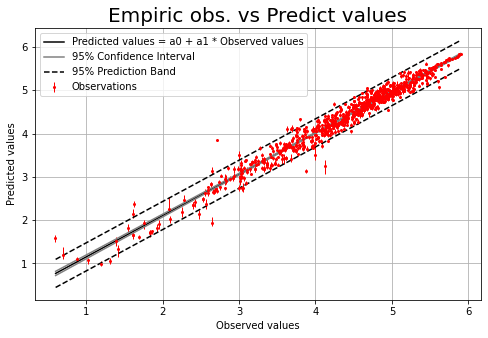

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(0.6, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: BA_sq_m_ha: mean - 0.307, median - 0.307, CI - [0.296-0.316]

SHAP-values for: DBH_cm: mean - 0.063, median - 0.06, CI - [0.044-0.082]

SHAP-values for: H_m: mean - 0.36, median - 0.362, CI - [0.339-0.381]

SHAP-values for: Origin_ID: mean - 0.003, median - 0.003, CI - [0.001-0.005]

SHAP-values for: Species_ID: mean - 0.08, median - 0.08, CI - [0.076-0.084]



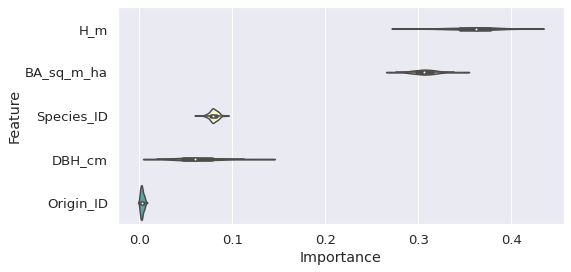

In [26]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['H_m', 'BA_sq_m_ha', 'Species_ID', 'DBH_cm', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [28]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 96.78, median: 104.0,
 pred. interval (P(0.025)-P(0.975)): 62.0-107.0, 
 conf. interval (p-value=0.95): 83.285-106.683 
***
Aggregate bias statistic: 
 mean: -0.0, median: 0.0,
 pred. interval (P(0.025)-P(0.975)): -0.029-0.025, 
 conf. interval (p-value=0.95): -0.012-0.012 
***
Aggregate RMSE statistic: 
 mean: 0.169, median: 0.168, pred. interval (P(0.025)-P(0.975)): 0.142-0.206, 
 conf. interval (p-value=0.95): 0.153-0.184 
***
Aggregate MSE statistic: 
 mean: 0.029, median: 0.028, pred. interval (P(0.025)-P(0.975)): 0.02-0.042, 
 conf. interval (p-value=0.95): 0.023-0.034 
***
Aggregate R^2 statistic: 
 mean: 0.962, median: 0.963, pred. interval (P(0.025)-P(0.975)): 0.943-0.973, 
 conf. interval (p-value=0.95): 0.955-0.968 
***
Aggregate bias(%) statistic: 
 mean: -0.0, median: 0.001, pred. interval (P(0.025)-P(0.975)): -0.658-0.571, 
 conf. interval (p-value=0.95): -0.274-0.283 

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

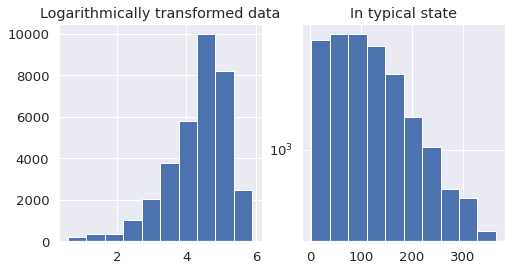

In [31]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [32]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 1, 2, 4, 5, 6])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 50, 100, 200, 300, 400])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

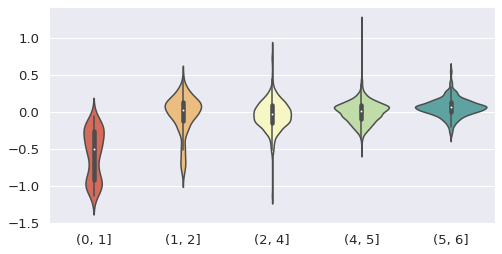

In [33]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

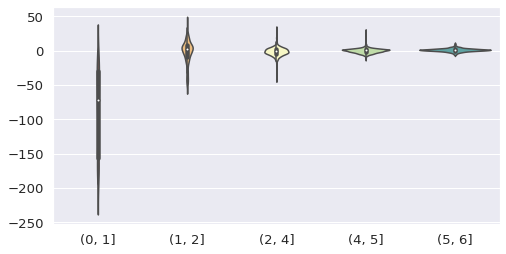

In [34]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

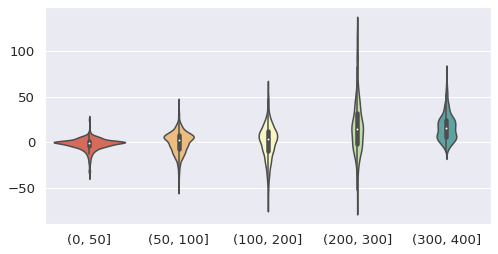

In [35]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

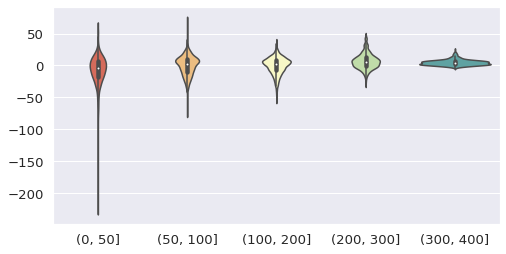

In [36]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [37]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [38]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [39]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:3.54711
[1]	validation_0-rmse:3.19420
[2]	validation_0-rmse:2.87675
[3]	validation_0-rmse:2.59163
[4]	validation_0-rmse:2.33379
[5]	validation_0-rmse:2.10195
[6]	validation_0-rmse:1.89329
[7]	validation_0-rmse:1.70655
[8]	validation_0-rmse:1.53890
[9]	validation_0-rmse:1.38844
[10]	validation_0-rmse:1.25264
[11]	validation_0-rmse:1.13035


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:1.02076
[13]	validation_0-rmse:0.92279
[14]	validation_0-rmse:0.83478
[15]	validation_0-rmse:0.75536
[16]	validation_0-rmse:0.68454
[17]	validation_0-rmse:0.62079
[18]	validation_0-rmse:0.56389
[19]	validation_0-rmse:0.51293
[20]	validation_0-rmse:0.46730
[21]	validation_0-rmse:0.42601
[22]	validation_0-rmse:0.38978
[23]	validation_0-rmse:0.35850
[24]	validation_0-rmse:0.33007
[25]	validation_0-rmse:0.30466
[26]	validation_0-rmse:0.28281
[27]	validation_0-rmse:0.26339
[28]	validation_0-rmse:0.24652
[29]	validation_0-rmse:0.23197
[30]	validation_0-rmse:0.21890
[31]	validation_0-rmse:0.20712
[32]	validation_0-rmse:0.19752
[33]	validation_0-rmse:0.18926
[34]	validation_0-rmse:0.18251
[35]	validation_0-rmse:0.17600
[36]	validation_0-rmse:0.17055
[37]	validation_0-rmse:0.16608
[38]	validation_0-rmse:0.16256
[39]	validation_0-rmse:0.15896
[40]	validation_0-rmse:0.15601
[41]	validation_0-rmse:0.15364
[42]	validation_0-rmse:0.15138
[43]	validation_0-rmse:0.14978
[44]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [40]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 107


In [41]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

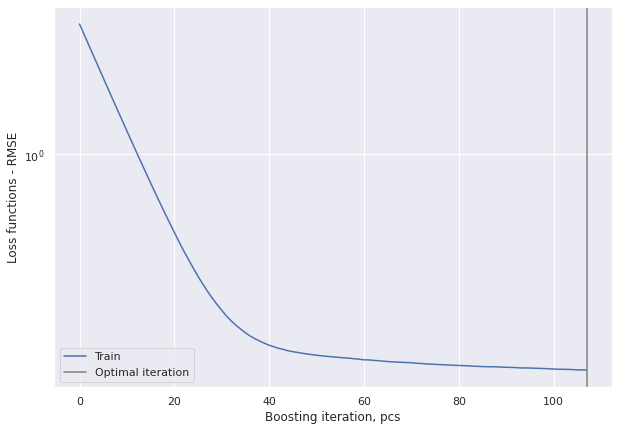

In [42]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [43]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.02
RMSE: 0.1
Relative RMSE(%):  2.822
MSE: 0.0
R square: 98.0%


In [44]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.980
Uncertainty
a0: 0.108+/-0.021
a1: 0.975+/-0.005


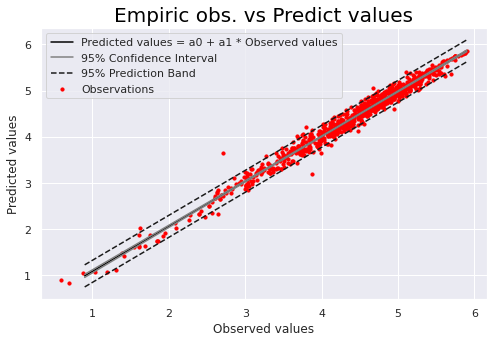

In [45]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0.9, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

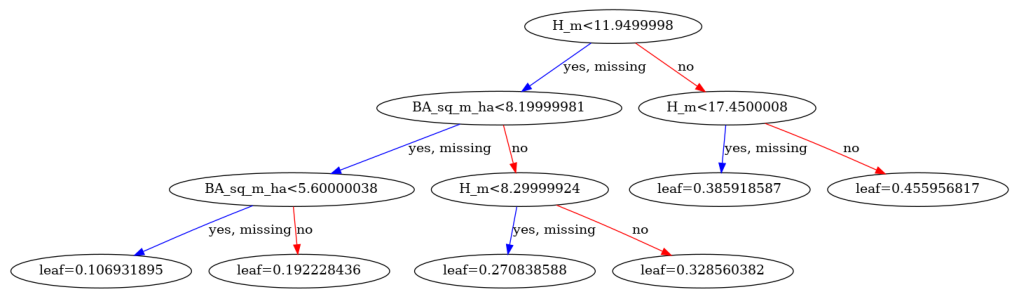

In [47]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=0) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [18, 45]
plt.show()

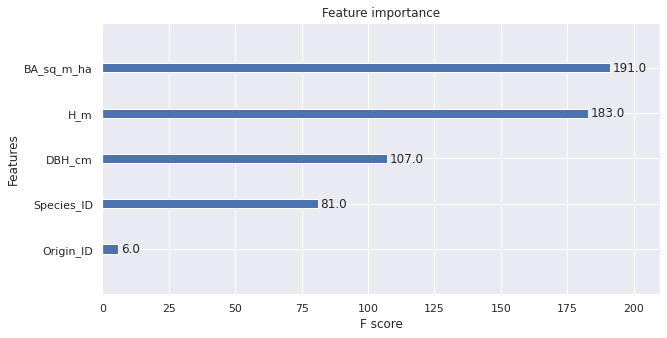

In [49]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

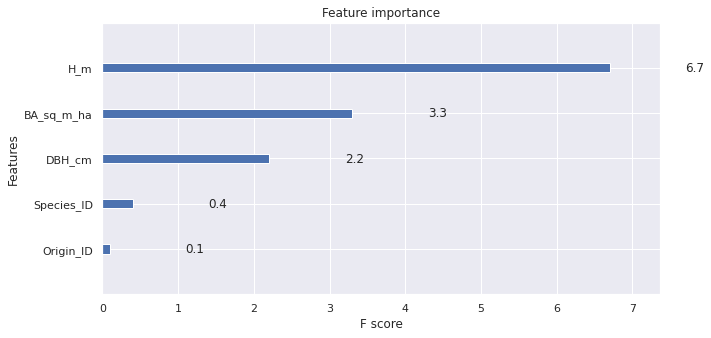

In [50]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

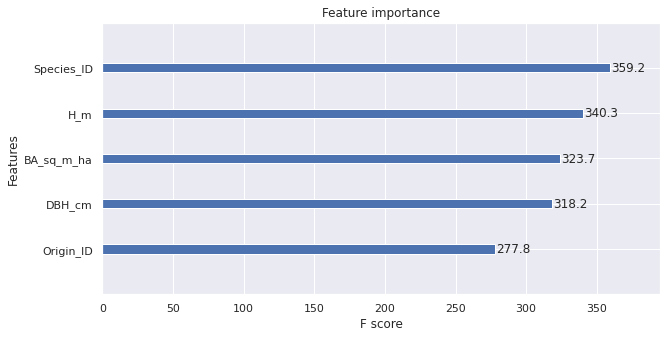

In [51]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [52]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


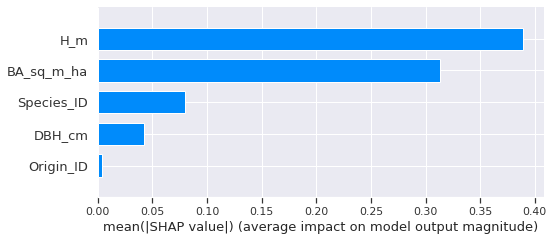

In [53]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

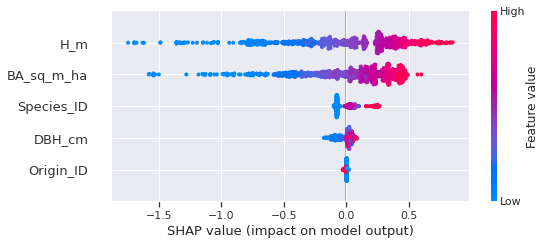

In [54]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

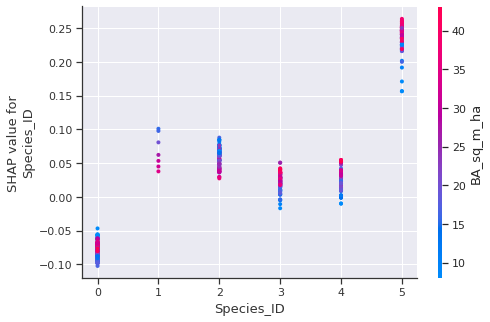

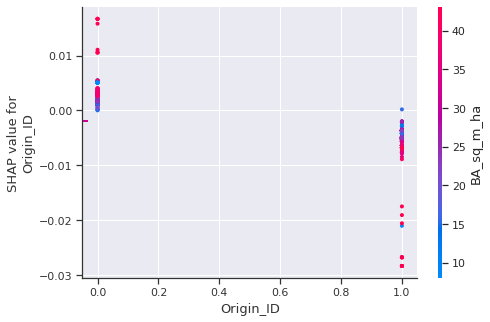

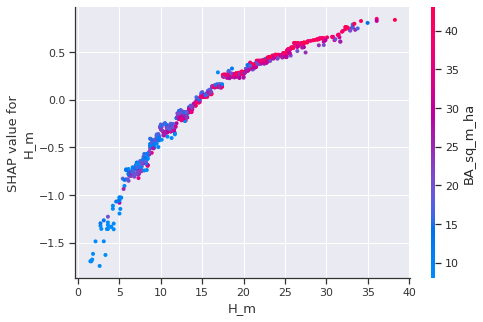

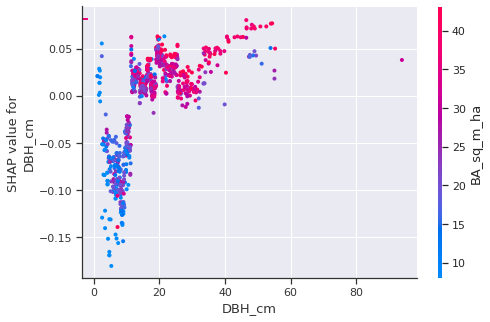

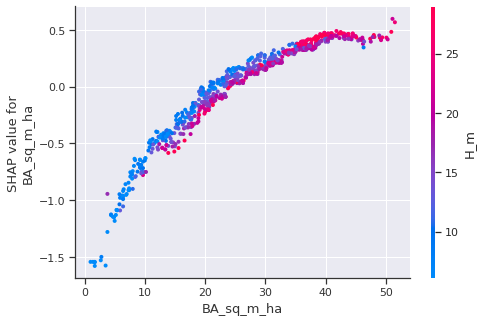

In [55]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [56]:
# Save to JSON
f_xgb_model.save_model("../01_output_data/XGBoost_models/02_LN_M_all_stem_other_authors_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../01_output_data/XGBoost_models/02_LN_M_all_stem_other_authors_XGB_model.txt")